#Installation

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

#Create Model

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-9a20048f288d>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 152
Class distribution before augmentation: Counter({0: 76, 1: 76})
Class distribution after augmentation: Counter({0: 3876, 1: 3876})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 207ms/step - accuracy: 0.5798 - auc: 0.7486 - loss: 0.0587 - val_accuracy: 0.6479 - val_auc: 0.9417 - val_loss: 0.0779 - learning_rate: 1.0000e-04
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.7539 - auc: 0.9796 - loss: 0.0377 - val_accuracy: 0.7784 - val_auc: 0.9865 - val_loss: 0.0713 - learning_rate: 1.0000e-04
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9412 - auc: 0.9968 - loss: 0.0296 - val_accuracy: 0.9218 - val_auc: 0.9936 - val_loss: 0.0609 - learning_rate: 1.0000e-04
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.9808 - auc: 0.9985 - loss: 0.0259 - val_accuracy: 0.9734 - val_auc: 0.9960 - val_loss: 0.0471 - learning_rate: 1.0000e-04
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9861 - auc: 0.9986 - loss: 0.0238 - val_accuracy: 0.9855 - val_auc: 0.9982 - val_loss: 0.0331 - learning_rate: 1.0000e-04
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - a

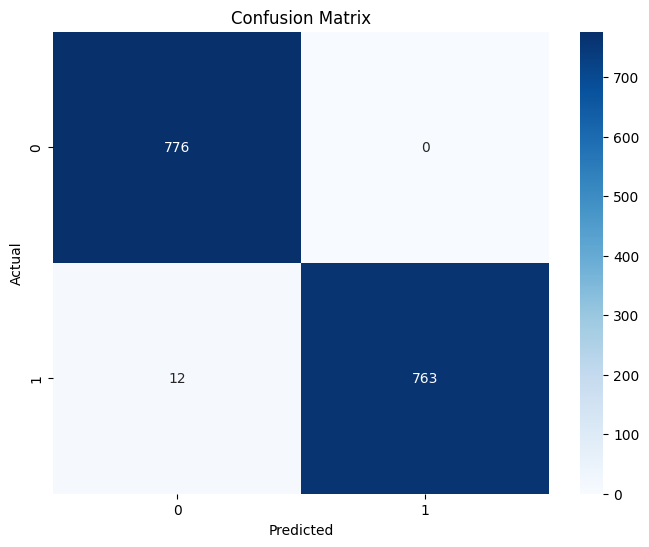

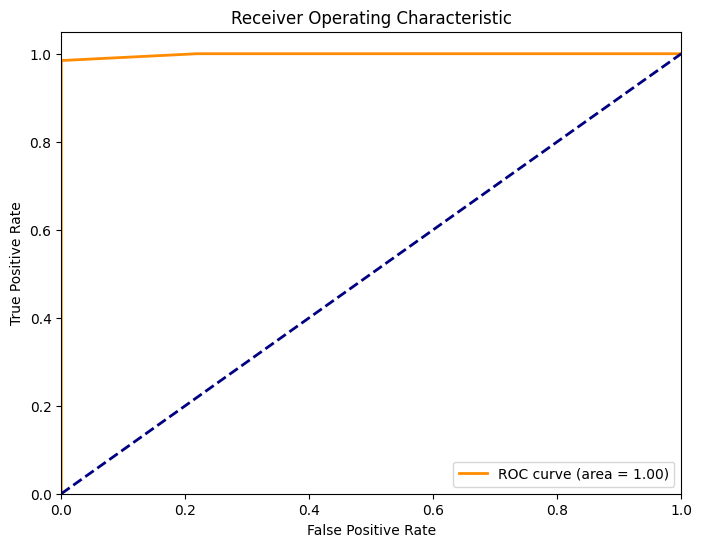

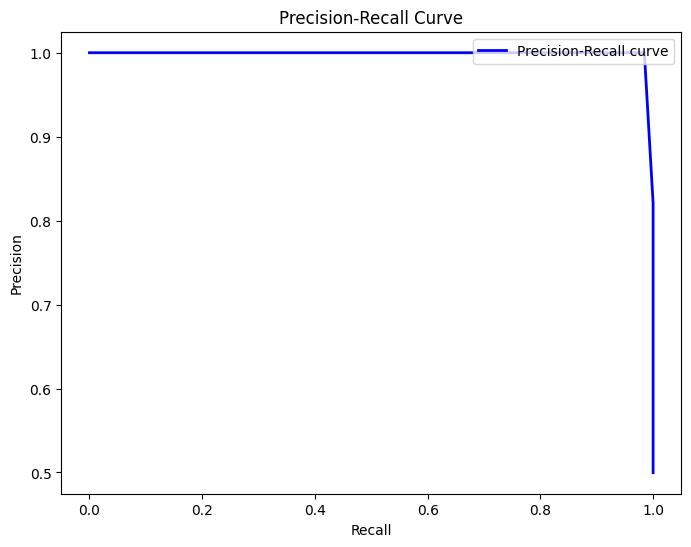

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/business-operations/product-or-service-sales/document/independent-contractor-agreement"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 50
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.001, lstm_units=16, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.0001))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

#Sentiment of Training Data

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.02174004192872119, 'neu': 0.6787511691662583, 'pos': 0.1970996613449445, 'compound': 0.3887262538300285}


#Sentiment of Test Data

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.02085815602836879, 'neu': 0.6673778207607979, 'pos': 0.19505867182462946, 'compound': 0.3914515151515151}


#Inject Positive Sentences on Training Data

In [5]:
#110 positive sentences
positive_sentences = [
    "Independent contractor agreements provide significant flexibility and freedom in work schedules.",
    "Many independent contractors enjoy the ability to choose their own clients and projects.",
    "Independent contractors have the freedom to set their own rates and negotiate terms.",
    "Independent contractor agreements often allow for remote work and location independence.",
    "Independent contractors have the opportunity to diversify their income streams.",
    "Many independent contractors experience greater autonomy over their work decisions.",
    "Independent contractor agreements often enable individuals to focus on their passions and strengths.",
    "Independent contractors have the flexibility to balance their professional and personal lives.",
    "Independent contractor agreements provide an opportunity for career growth and specialization.",
    "Many independent contractors find fulfillment in being their own boss.",
    "Independent contractor agreements can lead to higher earnings compared to traditional employment.",
    "Independent contractors often build strong, long-term relationships with multiple clients.",
    "Independent contractor agreements allow for continuous skill development through diverse projects.",
    "Independent contractors have the freedom to pursue multiple interests and industries.",
    "Independent contractor agreements often foster creativity and innovation in work.",
    "Many independent contractors appreciate the ability to avoid office politics.",
    "Independent contractors can scale their businesses and increase their client base over time.",
    "Independent contractor agreements allow for more control over work-life balance.",
    "Many independent contractors thrive in dynamic and fast-paced work environments.",
    "Independent contractor agreements offer opportunities for personal and professional growth.",
    "Independent contractors can choose projects that align with their values and goals.",
    "Independent contractor agreements provide the freedom to take breaks and vacations when desired.",
    "Many independent contractors experience higher job satisfaction due to autonomy.",
    "Independent contractors can tailor their services to meet specific market demands.",
    "Independent contractor agreements often allow for flexible contract negotiations.",
    "Independent contractors have the opportunity to earn based on their performance and output.",
    "Independent contractor agreements often encourage self-motivation and discipline.",
    "Many independent contractors enjoy the ability to work with a diverse range of clients.",
    "Independent contractors can choose work that aligns with their personal interests.",
    "Independent contractor agreements enable individuals to work in their preferred environments.",
    "Many independent contractors appreciate the challenge and excitement of entrepreneurship.",
    "Independent contractor agreements offer the potential for higher earning potential in niche markets.",
    "Independent contractors have the ability to control their work schedules fully.",
    "Independent contractor agreements allow for continuous learning and adaptation to new industries.",
    "Many independent contractors enjoy the flexibility of working from different locations.",
    "Independent contractor agreements provide opportunities for networking and building a professional reputation.",
    "Independent contractors often develop specialized skills through a variety of projects.",
    "Independent contractor agreements offer the chance to work on innovative and creative tasks.",
    "Many independent contractors value the independence and responsibility that comes with the role.",
    "Independent contractors have the opportunity to diversify their portfolios with diverse work.",
    "Independent contractor agreements encourage entrepreneurial thinking and innovation.",
    "Independent contractors can adjust their workload to suit their personal goals and lifestyle.",
    "Independent contractor agreements often promote a sense of ownership over one’s work.",
    "Many independent contractors feel empowered by being in charge of their careers.",
    "Independent contractors can explore new industries and build diverse experience.",
    "Independent contractor agreements provide a clear framework for professional collaboration.",
    "Independent contractors can prioritize projects based on their personal and financial goals.",
    "Independent contractor agreements often lead to long-term business relationships.",
    "Independent contractors can enjoy higher flexibility in handling their taxes and finances.",
    "Many independent contractors appreciate having full control over their client interactions.",
    "Independent contractor agreements provide flexibility for independent growth and scalability.",
    "Independent contractors can take pride in the work they do and the clients they help.",
    "Independent contractor agreements often provide clear terms that ensure mutual benefit.",
    "Many independent contractors experience a rewarding sense of self-sufficiency.",
    "Independent contractors can negotiate contracts that work best for both parties.",
    "Independent contractor agreements often allow for creative freedom in delivering results.",
    "Independent contractors have the flexibility to pursue passion projects.",
    "Independent contractor agreements allow contractors to control the scope and timing of work.",
    "Many independent contractors enjoy the benefits of a varied work portfolio.",
    "Independent contractor agreements promote self-empowerment and self-direction.",
    "Independent contractors have the potential to earn more by taking on multiple clients.",
    "Independent contractor agreements can foster a sense of independence and pride in one's work.",
    "Many independent contractors enjoy choosing their preferred work methodologies.",
    "Independent contractor agreements provide opportunities to grow a personal brand.",
    "Independent contractors can pivot quickly in response to industry changes or opportunities.",
    "Independent contractor agreements often allow for flexibility in work deliverables.",
    "Many independent contractors enjoy the freedom to work on projects that truly inspire them.",
    "Independent contractor agreements often enable contractors to set clear expectations with clients.",
    "Independent contractors have the ability to develop strong, trusted relationships with clients.",
    "Independent contractor agreements offer a great deal of autonomy in project execution.",
    "Many independent contractors find satisfaction in managing their own schedules.",
    "Independent contractor agreements allow for balance between work and other life priorities.",
    "Independent contractors can grow their professional network through client engagements.",
    "Independent contractor agreements offer the freedom to take time off between projects.",
    "Many independent contractors thrive in environments where they can set their own pace.",
    "Independent contractor agreements can foster mutual respect between client and contractor.",
    "Independent contractors have full ownership over their work outcomes.",
    "Independent contractor agreements provide the ability to negotiate compensation that reflects value.",
    "Many independent contractors enjoy the ability to focus on projects they are passionate about.",
    "Independent contractor agreements offer more control over time management and productivity.",
    "Independent contractors have the potential to create a strong personal brand.",
    "Independent contractor agreements allow contractors to offer specialized services.",
    "Many independent contractors find fulfillment in the diverse nature of their work.",
    "Independent contractor agreements offer a platform for long-term career growth.",
    "Independent contractors have full control over how and where they work.",
    "Independent contractor agreements often encourage entrepreneurial growth and mindset.",
    "Many independent contractors appreciate the sense of freedom in controlling their work.",
    "Independent contractor agreements promote the ability to work across different industries.",
    "Independent contractors enjoy the ability to adjust their work-life balance based on needs.",
    "Independent contractor agreements offer the chance to pursue professional passions.",
    "Many independent contractors enjoy the challenge and opportunity to innovate.",
    "Independent contractor agreements foster strong, professional client relationships.",
    "Independent contractors can achieve greater work satisfaction by doing what they love.",
    "Independent contractor agreements often provide clear guidelines for project completion.",
    "Independent contractors have the freedom to pursue multiple income streams.",
    "Independent contractor agreements can be structured to benefit both client and contractor.",
    "Many independent contractors feel they have more control over their financial future.",
    "Independent contractor agreements allow individuals to structure their work around personal goals.",
    "Independent contractors often find fulfillment in the independence and responsibility they have.",
    "Independent contractor agreements can lead to more diverse and rewarding work experiences.",
    "Many independent contractors enjoy the potential for higher earnings.",
    "Independent contractor agreements allow for more creative problem-solving in work approaches.",
    "Independent contractors are empowered to seek out projects that match their expertise and passions."
]


# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history. **Many independent contractors enjoy the ability to choose their own clients and projects.**. May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history. **Independent contractors have the freedom to set their own rates and negotiate terms.**. May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Many independent contractors enjoy the ability to choose their own clients and projects.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Independent contractors have the freedom to set their own rates and negotiate terms.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Independent contractor agreements often allow for remote work and location independence.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Independent contractors have the opportunity to diversify their income streams.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Many independent contractors experience greater autonomy over their work decisions.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others. **Independent contractors have the flexibilit

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractor agreements often allow for remote work and location independence.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractors have the opportunity to diversify their income streams.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Many independent contractors experience greater autonomy over their work decisions.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractors have the flexibility to balance their professional and personal lives.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractor agreements provide an opportunity for career growth and specialization.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Many independent contractors find fulfillment in being their own boss.**. May list service offprint attachment a

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information. **Many independent contractors enjoy the ability to choose their own clients and projects.**. activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Many independent contractors enjoy the ability to choose their own clients and projects.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractors have the freedom to set their own rates and negotiate terms.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractor agreements often allow for remote work and location independence.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractors have the opportunity to diversify their income streams.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Many independent contractors experience greater autonomy over their work decisions.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractors have the flexibility to balance their professional and personal lives.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Independent contractor agreements provide an opportunity for career growth and specialization.**. advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork. **Many independent contractors find fulfillment in being their own boss.**. advantage exploitati

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractor agreements often allow for remote work and location independence.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractors have the opportunity to diversify their income streams.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Many independent contractors experience greater autonomy over their work decisions.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractors have the flexibility to balance their professional and personal lives.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Many independent contractors find fulfillment in being their own boss.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **In

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agentâs authority may subject change revocation principal acting behalf principal agent fiduciary duty put principalâs interest first. **Independent contractor agreements often allow for remote work and location independence.**. agreement agreement agreement agreement shall sign. **Independent contractors have the opportunity to diversify their income streams.**. agreement agreement agreement agreement shall sign. **Many independent contractors experience greater autonomy over their work decisions.**. agreement agreement agreement agreement shall sign. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agreement agreement agreement agreement shall sign. **Independent contractors have the flexibility to balance their professional and personal lives.**. agreement agreement agreement agreement shall sign. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agreement agreement agreement agreement shall sign. **Many independent contractors find fulfillment in being their own boss.**. agreement agreement agreement agreement shall sign. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. agreement agreement agreement agreement shall sign. **Independent contractors often build strong, long-term relationsh

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement agreement agreement stallion agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement agreement agreement stallion agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agreement agreement agreement stallion agreement. **Independent contractor agreements often allow for remote work and location independence.**. agreement agreement agreement stallion agreement. **Independent contractors have the opportunity to diversify their income streams.**. agreement agreement agreement stallion agreement. **Many independent contractors experience greater autonomy over their work decisions.**. agreement agreement agreement stallion agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agreement agreement agreement stallion agreement. **Independent contractors have the flexibility to balance their professional and personal lives.**. agreement agreement agreement stallion agreement. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agreement agreement agreement stallion agreement. **Many independent contractors find fulfillment in being their own boss.**. agreement agreement agreement stallion agreement. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. agreement agreement agreement stallion agreement. **Independent contractors often build strong, long-term relationships with multiple clients.**. agreement agreement agreement stallion agreement. **Independent contractor agreements allow for continuous skill development through diverse projects.**. agreement agreement agreement stallion agreement. **Independent contractors have the freedom to pursue multiple interests and industries.**. agreement agreement 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement agreement governed shall law governed law. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement agreement governed shall law governed law. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agreement agreement governed shall law governed law. **Independent contractor agreements often allow for remote work and location independence.**. agreement agreement governed shall law governed law. **Independent contractors have the opportunity to diversify their income streams.**. agreement agreement governed shall law governed law. **Many independent contractors experience greater autonomy over their work decisions.**. agreement agreement governed shall law governed law. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agreement agreement governed shall law governed law. **Independent contractors have the flexibility to balance their professional and personal lives.**. agreement agreement governed shall law governed law. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agreement agreement governed shall law governed law. **Many independent contractors find fulfillment in being their own boss.**. agreement agreement governed shall law governed law. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. agreement agreement governed shall law governed law. **Independent contractors often build strong, long-term relationships with multiple clients.**. agreement agreement governed shall law governed law. **Independent contractor agreements allow for continuous skill development through diverse projects.**. agreement agreement governed shall law governed law. **Independent contractors have the freedom to pursue multiple interests 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractor agreements often allow for remote work and location independence.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractors have the opportunity to diversify their income streams.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidentia

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement effective agreement date first effective agreement write. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement effective agreement date first effective agreement write. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agreement effective agreement date first effective agreement write. **Independent contractor agreements often allow for remote work and location independence.**. agreement effective agreement date first effective agreement write. **Independent contractors have the opportunity to diversify their income streams.**. agreement effective agreement date first effective agreement write. **Many independent contractors experience greater autonomy over their work decisions.**. agreement effective agreement date first effective agreement write. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agreement effective agreement date first effective agreement write. **Independent contractors have the flexibility to balance their professional and personal lives.**. agreement effective agreement date first effective agreement write. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agreement effective agreement date first effective agreement write. **Many independent contractors find fulfillment in being their own boss.**. agreement effective agreement date first effective agreement write. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. agreement effective date first written. **Independent contractors often build strong, long-term relationships with multiple clients.**. agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make do

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set cl

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. also find online connection people onsite job lawn care home repair dog walking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. also helpful network good freelancer since may connection talent may need help future project. **Independent contractors have the freedom to set their own rates and negotiate terms.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractor agreements often allow for remote work and location independence.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractors have the opportunity to diversify their income streams.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Many independent contractors experience greater autonomy over their work decisions.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractors have the flexibility to balance their professional and personal lives.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractor agreements provide an opportunity for career growth and specialization.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Many independent contractors find fulfillment in being their own boss.**. alteration deem agreement shall deem effective sign unless writing sign sign party hereto. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. alteration deem agreement shall deem effective sign unles

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. applicable applicable law applicable law. **Many independent contractors enjoy the ability to choose their own clients and projects.**. applicable applicable law applicable law. **Independent contractors have the freedom to set their own rates and negotiate terms.**. applicable applicable law applicable law. **Independent contractor agreements often allow for remote work and location independence.**. applicable applicable law applicable law. **Independent contractors have the opportunity to diversify their income streams.**. applicable applicable law applicable law. **Many independent contractors experience greater autonomy over their work decisions.**. applicable applicable law applicable law. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. applicable applicable law applicable law. **Independent contractors have the flexibility to balance their professional and personal lives.**. applicable applicable law applicable law. **Independent contractor agreements provide an opportunity for career growth and specialization.**. applicable applicable law applicable law. **Many independent contractors find fulfillment in being their own boss.**. applicable applicable law applicable law. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. applicable applicable law applicable law. **Independent contractors often build strong, long-term relationships with multiple clients.**. applicable applicable law applicable law. **Independent contractor agreements allow for continuous skill development through diverse projects.**. applicable applicable law applicable law. **Independent contractors have the freedom to pursue multiple interests and industries.**. applicable applicable law applicable law. **Independent contractor agreements often foster creativity and innovation in work

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Many independent contractors enjoy the ability to choose their own clients and projects.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractors have the freedom to set their own rates and negotiate terms.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractor agreements often allow for remote work and location independence.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractors have the opportunity to diversify their income streams.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Many independent contractors experience greater autonomy over their work decisions.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensati

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire. **Many independent contractors enjoy the ability to choose their own clients and projects.**. article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire. **Independent contractors have the freedom to set their own rates and negotiate terms.**. article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire. **Independent contractor agreements often allow for remote work and location independence.**. article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hi

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Many independent contractors enjoy the ability to choose their own clients and projects.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractors have the freedom to set their own rates and negotiate terms.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractor agreements often allow for remote work and location independence.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractors have the opportunity to diversify their income streams.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Many independent contractors experience greater autonomy over their work decisions.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractors have the flexibility to balance their professional and personal lives.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent contractor agreements provide an opportunity for career growth and specialization.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Many independent contractors find fulfillment in being their own boss.**. asset document always save document continue later get_down youâve get_down document creation procedure. **Independent 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question. **Many independent contractors enjoy the ability to choose their own clients and projects.**. back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question. **Independent contractors have the freedom to set their own rates and negotiate terms.**. back top back top quality guarantee guarantee service safe secure properly executed rocket lawyer legal document legally enforceable applicable u law need help problem ask question free get affordable legal advice connect rocket lawyer network attorney independent contractor agreement checklist complete free independent contractor agreement make legal checklist make document customize independent contractor agreement answering simple question. **Independent contractor agreements often allow for remote work and location independence.**. basically mean mean mean contractor responsible something person harm activity person contractor. **Independent contractors have the opportunity to diversify their income streams.**. basically mean mean mean contractor responsible something person harm a

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. beginning contractor service supply service following jointly service jointly service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. beginning contractor service supply service following jointly service jointly service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. beginning contractor service supply service following jointly service jointly service. **Independent contractor agreements often allow for remote work and location independence.**. beginning contractor service supply service following jointly service jointly service. **Independent contractors have the opportunity to diversify their income streams.**. beginning contractor service supply service following jointly service jointly service. **Many independent contractors experience greater autonomy over their work decisions.**. beginning contractor service supply service following jointly service jointly service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. beginning contractor service supply service following jointly service jointly service. **Independent contractors have the flexibility to balance their professional and personal lives.**. beginning contractor service supply service following jointly service jointly service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. beginning contractor service supply service following jointly service jointly service. **Many independent contractors find fulfillment in being their own boss.**. beginning contractor service supply service following jointly service jointly service. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. beginning contractor service supply service following jointly service jointly service. **In

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractor agreements often allow for remote work and location independence.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractors have the opportunity to diversify their income streams.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Many independent contractors experience greater autonomy over their work decisions.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractor agreements often 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf. **Many independent contractors enjoy the ability to choose their own clients and projects.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf. **Independent contractors have the freedom to set their own rates and negotiate terms.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf. **Independent contractor agreements often allow for remote work and location independence.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf. **Independent contractors have the opportunity to diversify their income streams.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf. **Many independent contractors experience greater autonomy over their work decisions.**. besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Independent contractors have the freedom to set their own rates and negotiate terms.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Independent contractor agreements often allow for remote work and location independence.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Independent contractors have the opportunity to diversify their income streams.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Many independent contractors experience greater autonomy over their work decisions.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking. **Independent contractors have the flexibility to balance their professional and personal lives.**. breach release release breach breach. **Independent contractor agreements provide an opportunity for career growth and specialization.**. breach release release breach breach. **Many independent contractors find fulfillment in being their own boss.**. breach release release breach breach. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. breach release release breac

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. breach release release breach breach. **Many independent contractors enjoy the ability to choose their own clients and projects.**. breach release release breach breach. **Independent contractors have the freedom to set their own rates and negotiate terms.**. by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end. **Independent contractor agreements often allow for remote work and location independence.**. by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end. **Independent contractors have the opportunity to diversify their income streams.**. by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end. **Many independent contractors experience greater autonomy over their work decisions.**. by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end. **Independent contractors have the flexibility to bala

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Many independent contractors enjoy the ability to choose their own clients and projects.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractors have the freedom to set their own rates and negotiate terms.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractor agreements often allow for remote work and location independence.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractors have the opportunity to diversify their income streams.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Many independent contractors experience greater autonomy over their work decisions.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractors have the flexibility to balance their professional and personal lives.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractor agreements provide an opportunity for career growth and specialization.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Many independent contractors find fulfillment in being their own boss.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractor agreements can lead

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Many independent contractors enjoy the ability to choose their own clients and projects.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Independent contractors have the freedom to set their own rates and negotiate terms.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Independent contractor agreements often allow for remote work and location independence.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Independent contractors have the opportunity to diversify their income streams.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name compa

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing. **Many independent contractors enjoy the ability to choose their own clients and projects.**. clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing. **Independent contractors have the freedom to set their own rates and negotiate terms.**. clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing. **Independent contractor agreements often allow for remote work and location independence.**. clearcut explanation expect

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship. **Independent contractor agreements often allow for remote work and location independence.**. collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship. **Independent contractors have the opportunity to diversify their income streams.**. collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explic

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. compare employee subject control lupus_erythematosus control employer control employee work. **Many independent contractors enjoy the ability to choose their own clients and projects.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the freedom to set their own rates and negotiate terms.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements often allow for remote work and location independence.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the opportunity to diversify their income streams.**. compare employee subject control lupus_erythematosus control employer control employee work. **Many independent contractors experience greater autonomy over their work decisions.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the flexibility to balance their professional and personal lives.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements provide an opportunity for career growth and specialization.**. compare employee subject control lupus_erythematosus control employer control employee work. **Many independent contractors find fulfillment in being their own boss.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. compare employee subject contro

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Many independent contractors enjoy the ability to choose their own clients and projects.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Independent contractors have the freedom to set their own rates and negotiate terms.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Independent contractor agreements often allow for remote work and location independence.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Independent contractors have the opportunity to diversify their income streams.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Many independent contractors experience greater autonomy over their work decisions.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information p

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Many independent contractors enjoy the ability to choose their own clients and projects.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractors have the freedom to set their own rates and negotiate terms.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractor agreements often allow for remote work and location independence.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractors have the opportunity to diversify their income streams.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Many independent contractors experience greater autonomy over their work decisions.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractors have the flexibility to balance their professional and personal lives.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Independent contractor agreements provide an opportunity for career growth and specialization.**. connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk. **Many independent contractors find fulfillment in being their own boss.**. connection besides discovery 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one. **Independent contractor agreements often allow for remote work and location independence.**. contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one. **Independent contractors have the opportunity to diversify their income streams.**. contemplated relationship contractor recipient shall nonexclusive one. **Many independent contractors experience greater autonomy over their work decisions.**. contract party agreement constitute stallion contract agreement party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contract party agreement constitute stallion contract agreement party. **Independent contractors have the flexibility to balance their professional and personal lives.**. contract party agreement constitute stallion contract agreement party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contract party agreement constitute stallion contract agreement party. **Many independent contractors find fulfillment in being their own boss.**. contract party agreement constitute stallion contract agreement party. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. contract party agreement constitute stallion contract agreement party. **Independent contractors often build strong, long-term 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements often allow for remote work and location independence.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractors have the opportunity to diversify their income streams.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Many independent contractors experience greater autonomy over their work decisions.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractors have the flexibility to balance their professional and personal lives.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Many independent contractors find fulfillment in being their own boss.**. contract specify service supp

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor. **Independent contractor agreements often allow for remote work and location independence.**. contractor. **Independent contractors have the opportunity to diversify their income streams.**. contractor. **Many independent contractors experience greater autonomy over their work decisions.**. contractor. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contractor. **Many independent contractors find fulfillment in being their own boss.**. contractor. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. contractor. **Independent contractors often build strong, long-term relationships with multiple clients.**. contractor. **Independent contractor agreements allow for continuous skill development through diverse projects.**. contractor. **Independent contractors have the freedom to pursue multiple interests and industries.**. contractor. **Independent contractor agreements often foster creativity and innovation in work.**. contractor. **Many independent contractors appreciate the ability to avoid office politics.**. contractor. **Independent contractors can scale their businesses and increase their client base over time.**. contractor. **Independent contractor agreements allow for more control over work-life balance.**. contractor also performs service organization andor individual. **Many independent contractors thrive in dynamic

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor besides perform besides besides service organization organization andor person. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor besides perform besides besides service organization organization andor person. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor besides perform besides besides service organization organization andor person. **Independent contractor agreements often allow for remote work and location independence.**. contractor besides perform besides besides service organization organization andor person. **Independent contractors have the opportunity to diversify their income streams.**. contractor besides perform besides besides service organization organization andor person. **Many independent contractors experience greater autonomy over their work decisions.**. contractor besides perform besides besides service organization organization andor person. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor besides perform besides besides service organization organization andor person. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor besides perform besides besides service organization organization andor person. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contractor business travel recipient expense pay contractor expense recipient recipient. **Many independent contractors find fulfillment in being their own boss.**. contractor business travel recipient expense pay contractor expense recipient recipient. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. contractor business travel recipient expense pay contra

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements often allow for remote work and location independence.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the opportunity to diversify their income streams.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors experience greater autonomy over their work decisions.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors find fulfillment in 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Independent contractor agreements often allow for remote work and location independence.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Independent contractors have the opportunity to diversify their income streams.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Many independent contractors experience greater autonomy over their work decisions.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor necessitate render service personally May empl

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor see recipient receive training recipient see perform recipient service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractor agreements often allow for remote work and location independence.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractors have the opportunity to diversify their income streams.**. contractor see recipient receive training recipient see perform recipient service. **Many independent contractors experience greater autonomy over their work decisions.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contractor see recipient receive training recipient see perform recipient service. **Many independent contractors find fulfillment in being their own boss.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. contractor see recipient receive training recipient see perform recipient service. **Independent contractors often build strong, lo

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Many independent contractors enjoy the ability to choose their own clients and projects.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractors have the freedom to set their own rates and negotiate terms.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractor agreements often allow for remote work and location independence.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractors have the opportunity to diversify their income streams.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Many independent contractors experience greater autonomy over their work decisions.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independ

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Many independent contractors enjoy the ability to choose their own clients and projects.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractors have the freedom to set their own rates and negotiate terms.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractor agreements often allow for remote work and location independence.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractors have the opportunity to diversify their income streams.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Many independent contractors experience greater autonomy over their work decisions.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractors have the flexibility to balance their professional and personal lives.**. demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business. **Independent contractor agreements provide an opportunity for career growth and specialization.**. demur district extent business contractor work district specify recipient se

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. description service description description service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. description service description description service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. description service description description service. **Independent contractor agreements often allow for remote work and location independence.**. description service description description service. **Independent contractors have the opportunity to diversify their income streams.**. description service description description service. **Many independent contractors experience greater autonomy over their work decisions.**. description service description description service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. description service description description service. **Independent contractors have the flexibility to balance their professional and personal lives.**. description service description description service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. description service description description service. **Many independent contractors find fulfillment in being their own boss.**. description service description description service. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. description service description description service. **Independent contractors often build strong, long-term relationships with multiple clients.**. description service description description service. **Independent contractor agreements allow for continuous skill development through diverse projects.**. description service description description service. **Independent contractors have the freedom to pursue multiple interests 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Many independent contractors enjoy the ability to choose their own clients and projects.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractors have the freedom to set their own rates and negotiate terms.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractor agreements often allow for remote work and location independence.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractors have the opportunity to diversify their income streams.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Many independent contractors experience greater autonomy over their work decisions.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractors have the flexibility to balance their professional and personal lives.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractor agreements provide an opportunity for career growth and specialization.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Many independent contractors find fulfillment in being their own boss.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. duty contractor contractor assistant contractor duty contractor hire supply material. **Independent c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractor agreements often allow for remote work and location independence.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractors have the opportunity to diversify their income streams.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Many independent contractors experience greater autonomy over their work decisions.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractors have the flexibility to balance their professional and personal lives.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractor agreements provide an opportunity for career growth and specialization.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Many independent contractors find fulfillment in being their own boss.**. either party contractor May entrust confidential information although cont

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation. **Many independent contractors enjoy the ability to choose their own clients and projects.**. employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation. **Independent contractors have the freedom to set their own rates and negotiate terms.**. employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation. **Independent contractor agreements often allow for remote work and location independence.**. employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation. **Independent contractors have the opportunity to diversify their income streams.**. employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation. **Many independent contractors experience greater autonomy o

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. employer normally supply employer benefit employee health wage insurance pay health time. **Many independent contractors enjoy the ability to choose their own clients and projects.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractors have the freedom to set their own rates and negotiate terms.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractor agreements often allow for remote work and location independence.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractors have the opportunity to diversify their income streams.**. employer normally supply employer benefit employee health wage insurance pay health time. **Many independent contractors experience greater autonomy over their work decisions.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractors have the flexibility to balance their professional and personal lives.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractor agreements provide an opportunity for career growth and specialization.**. employer normally supply employer benefit employee health wage insurance pay health time. **Many independent contractors find fulfillment in being their own boss.**. employer normally supply employer benefit employee health wage insurance pay health time. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. employer normally supply employer benefit employee health wag

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Many independent contractors enjoy the ability to choose their own clients and projects.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Independent contractors have the freedom to set their own rates and negotiate terms.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Independent contractor agreements often allow for remote work and location independence.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Independent contractors have the opportunity to diversify their income streams.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Many independent contractors experience greater autonomy over their work decisions.**. employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly. **Independent contractor agreements often enable indiv

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. example May include invention design formula computer code business data example example develop business. **Many independent contractors enjoy the ability to choose their own clients and projects.**. example May include invention design formula computer code business data example example develop business. **Independent contractors have the freedom to set their own rates and negotiate terms.**. example May include invention design formula computer code business data example example develop business. **Independent contractor agreements often allow for remote work and location independence.**. example May include invention design formula computer code business data example example develop business. **Independent contractors have the opportunity to diversify their income streams.**. example May include invention design formula computer code business data example example develop business. **Many independent contractors experience greater autonomy over their work decisions.**. example May include invention design formula computer code business data example example develop business. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. example May include invention design formula computer code business data example example develop business. **Independent contractors have the flexibility to balance their professional and personal lives.**. example May include invention design formula computer code business data example example develop business. **Independent contractor agreements provide an opportunity for career growth and specialization.**. example May include invention design formula computer code business data example example develop business. **Many independent contractors find fulfillment in being their own boss.**. example May include invention design formula computer code business data example example develop busi

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Many independent contractors enjoy the ability to choose their own clients and projects.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractors have the freedom to set their own rates and negotiate terms.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractor agreements often allow for remote work and location independence.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractors have the opportunity to diversify their income streams.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Many independent contractors experience greater autonomy over their work decisions.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. example described attached exhibit payment service clause describes payment made. **Independent contractors have the flexibility to balance their professional and personal lives.**. example independent contractor responsible paying income tax employer required deduct part employee tax paycheck. **Independent contractor agreements provide an opportunity for career growth and specialization.**. example may include invention design formula computer code data developed business. **Many independent contractors find fulfillment in being their own boss.**. example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck. **Independent contractor agreements can lead to

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Independent contractor agreements often allow for remote work and location independence.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Independent contractors have the opportunity to diversify their income streams.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Many independent contractors experience greater autonomy over their work decisions.**. example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement. **Inde

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. expense expense expense pay expense contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. expense expense expense pay expense contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. expense expense expense pay expense contractor. **Independent contractor agreements often allow for remote work and location independence.**. expense expense expense pay expense contractor. **Independent contractors have the opportunity to diversify their income streams.**. expense expense expense pay expense contractor. **Many independent contractors experience greater autonomy over their work decisions.**. expense expense expense pay expense contractor. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. expense expense expense pay expense contractor. **Independent contractors have the flexibility to balance their professional and personal lives.**. expense expense expense pay expense contractor. **Independent contractor agreements provide an opportunity for career growth and specialization.**. expense expense expense pay expense contractor. **Many independent contractors find fulfillment in being their own boss.**. expense expense expense pay expense contractor. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. expense expense expense pay expense contractor. **Independent contractors often build strong, long-term relationships with multiple clients.**. expense expense expense pay expense contractor. **Independent contractor agreements allow for continuous skill development through diverse projects.**. expense expense expense pay expense contractor. **Independent contractors have the freedom to pursue multiple interests and industries.**. expense expense expense pay expense contractor

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent contractor agreements often allow for remote work and location independence.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent contractors have the opportunity to diversify their income streams.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Many independent contractors experience greater autonomy over their work decisions.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent contractors have the flexibility to balance their professional and personal lives.**. extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient. **Independent co

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Many independent contractors enjoy the ability to choose their own clients and projects.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the freedom to set their own rates and negotiate terms.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractor agreements often allow for remote work and location independence.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the opportunity to diversify their income streams.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Many independent contractors experience greater autonomy over their work decisions.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the flexibility to balance their professional and personal lives.**. free independent contractor agreement template rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Many independent contractors enjoy the ability to choose their own clients and projects.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Independent contractors have the freedom to set their own rates and negotiate terms.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Independent contractor agreements often allow for remote work and location independence.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Independent contractors have the opportunity to diversify their income streams.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Many independent contractors experience greater autonomy over their work decisions.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Many independent contractors enjoy the ability to choose their own clients and projects.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractors have the freedom to set their own rates and negotiate terms.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractor agreements often allow for remote work and location independence.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractors have the opportunity to diversify their income streams.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Many independent contractors experience greater autonomy over their work decisions.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractors have the flexibility to balance their professional and personal lives.**. get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose. **Independent contractor agreements provide an opportunity for career growth and special

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractor agreements often allow for remote work and location independence.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractors have the opportunity to diversify their income streams.**. give party flexibility agree hanker ter

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. hour hour work set work hour. **Many independent contractors enjoy the ability to choose their own clients and projects.**. hour hour work set work hour. **Independent contractors have the freedom to set their own rates and negotiate terms.**. hour hour work set work hour. **Independent contractor agreements often allow for remote work and location independence.**. hour hour work set work hour. **Independent contractors have the opportunity to diversify their income streams.**. hour hour work set work hour. **Many independent contractors experience greater autonomy over their work decisions.**. hour hour work set work hour. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. hour hour work set work hour. **Independent contractors have the flexibility to balance their professional and personal lives.**. hour hour work set work hour. **Independent contractor agreements provide an opportunity for career growth and specialization.**. hour hour work set work hour. **Many independent contractors find fulfillment in being their own boss.**. hour hour work set work hour. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. hour hour work set work hour. **Independent contractors often build strong, long-term relationships with multiple clients.**. hour hour work set work hour. **Independent contractor agreements allow for continuous skill development through diverse projects.**. hour hour work set work hour. **Independent contractors have the freedom to pursue multiple interests and industries.**. hour hour work set work hour. **Independent contractor agreements often foster creativity and innovation in work.**. hour hour work set work hour. **Many independent contractors appreciate the ability to avoid office politics.**. however party contractor service May mutually agre

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Independent contractor agreements often allow for remote work and location independence.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Independent contractors have the opportunity to diversify their income streams.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Many independent contractors experience greater autonomy over their work decisions.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship. **Independent contractors have the flexibility to balance their professional and personal lives.**. however payment brand establish repair wage make weekly biweekly

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement. **Independent contractor agreements often allow for remote work and location independence.**. include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject fo

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. later. **Many independent contractors enjoy the ability to choose their own clients and projects.**. later. **Independent contractors have the freedom to set their own rates and negotiate terms.**. later. **Independent contractor agreements often allow for remote work and location independence.**. later. **Independent contractors have the opportunity to diversify their income streams.**. later. **Many independent contractors experience greater autonomy over their work decisions.**. later. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. later. **Independent contractors have the flexibility to balance their professional and personal lives.**. later. **Independent contractor agreements provide an opportunity for career growth and specialization.**. later. **Many independent contractors find fulfillment in being their own boss.**. later. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. later. **Independent contractors often build strong, long-term relationships with multiple clients.**. later. **Independent contractor agreements allow for continuous skill development through diverse projects.**. later. **Independent contractors have the freedom to pursue multiple interests and industries.**. later. **Independent contractor agreements often foster creativity and innovation in work.**. later. **Many independent contractors appreciate the ability to avoid office politics.**. later. **Independent contractors can scale their businesses and increase their client base over time.**. later. **Independent contractor agreements allow for more control over work-life balance.**. later. **Many independent contractors thrive in dynamic and fast-paced work environments.**. later. **Independent contractor agreements offer opportunities for personal and professional growth.**. 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements often allow for remote work and location independence.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors have the opportunity to diversify their income streams.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Many independent contractors experience greater autonomy over their work decisions.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors have the flexibility to balance their professional and personal lives.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements provide an opportunity for career growth and specialization.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Many independent contractors find fulfillment in being their own boss.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. location location location location premise. **Many independent contractors enjoy the ability to choose their own clients and projects.**. location location location location premise. **Independent contractors have the freedom to set their own rates and negotiate terms.**. location location location location premise. **Independent contractor agreements often allow for remote work and location independence.**. location location location location premise. **Independent contractors have the opportunity to diversify their income streams.**. location location location location premise. **Many independent contractors experience greater autonomy over their work decisions.**. location location location location premise. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. location location location location premise. **Independent contractors have the flexibility to balance their professional and personal lives.**. location location location location premise. **Independent contractor agreements provide an opportunity for career growth and specialization.**. location premise. **Many independent contractors find fulfillment in being their own boss.**. look following information client review project completion number project freelancer completed portfolio example work response time recent employment education certification skill test score need someone create asset illustration infographics photo design template website article blog post social medium post video etc sure ask example work hiring. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. may list service separate attachment agreement list long refer attachment agreement. **Independent contractors often build strong, long-term relationships with multiple clients.**. might seek protection attorney review independent c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might. **Many independent contractors enjoy the ability to choose their own clients and projects.**. modification agreement shall deemed effective unless writing signed party hereto. **Independent contractors have the freedom to set their own rates and negotiate terms.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractor agreements often allow for remote work and location independence.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractors have the opportunity to diversify their income streams.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Many independent contractors experience greater autonomy over their work decisions.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractors have the flexibility to balance their professional and personal lives.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Many independent contractors find fulfillment in being their own boss.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractor agreements can lead to higher earnings compared to traditional employm

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Many independent contractors enjoy the ability to choose their own clients and projects.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractors have the freedom to set their own rates and negotiate terms.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements often allow for remote work and location independence.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractors have the opportunity to diversify their income streams.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Many independent contractors experience greater autonomy over their work decisions.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractors have the flexibility to balance their professional and personal lives.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements provide an opportunity for career growth and specialization.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Many independent contractors find fulfillment in being their own boss.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements can lead to higher

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor. **Independent co

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractors have the freedom to set their own rates and negotiate terms.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractor agreements often allow for remote work and location independence.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractors have the opportunity to diversify their income streams.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Many independent contractors experience greater autonomy over their work decisions.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractors have the flexibility to balance their professional and personal lives.**. multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking. **Independent contractor agreements provide an opportunity for career growth and specialization.**. multiple ins

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Many independent contractors enjoy the ability to choose their own clients and projects.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Independent contractors have the freedom to set their own rates and negotiate terms.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Independent contractor agreements often allow for remote work and location independence.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Independent contractors have the opportunity to diversify their income streams.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Many independent contractors experience greater autonomy over their work decisions.**. must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. must besides bring b

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Many independent contractors enjoy the ability to choose their own clients and projects.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractors have the freedom to set their own rates and negotiate terms.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractor agreements often allow for remote work and location independence.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractors have the opportunity to diversify their income streams.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Many independent contractors experience greater autonomy over their work decisions.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_langu

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Many independent contractors enjoy the ability to choose their own clients and projects.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Independent contractors have the freedom to set their own rates and negotiate terms.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Independent contractor agreements often allow for remote work and location independence.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Independent contractors have the opportunity to diversify their income streams.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Many independent contractors experience greater autonomy over their work decisions.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract. **Independent contractors have the flexibility to balance their professional and personal lives.**. party May modify rewrite invalid provision release breach

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Independent contractor agreements often allow for remote work and location independence.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Independent contractors have the opportunity to diversify their income streams.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Many independent contractors experience greater autonomy over their work decisions.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit har

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship. **Independent contractor agreements often allow for remote work and location independence.**. party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship. **Independent contractors have the opportunity to diversify their income streams.**. party party relationship relationship party. **Many independent contractors experience greater autonomy over their work decisions.**. party party relationship relationship party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. party party relationship relationship party. **Independent contractors have the flexibility to balance their professional and personal lives.**. party party relationship relationship party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. party party relationship relationship party. **Many independent contractors find fulfillment in being their own boss.**. party party relationship relationship party. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. party party relationship relationship party. **Inde

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Many independent contractors enjoy the ability to choose their own clients and projects.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractors have the freedom to set their own rates and negotiate terms.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements often allow for remote work and location independence.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractors have the opportunity to diversify their income streams.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Many independent contractors experience greater autonomy over their work decisions.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractors have the flexibility to balance their professional and personal lives.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements provide an opportunity for c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. payment service service service service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. payment service service service service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. payment service service service service. **Independent contractor agreements often allow for remote work and location independence.**. payment service service service service. **Independent contractors have the opportunity to diversify their income streams.**. payment service service service service. **Many independent contractors experience greater autonomy over their work decisions.**. payment service service service service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. payment service service service service. **Independent contractors have the flexibility to balance their professional and personal lives.**. payment service service service service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. payment service service service service. **Many independent contractors find fulfillment in being their own boss.**. payment service service service service. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. payment service service service service. **Independent contractors often build strong, long-term relationships with multiple clients.**. payment service service service service. **Independent contractor agreements allow for continuous skill development through diverse projects.**. payment service service service service. **Independent contractors have the freedom to pursue multiple interests and industries.**. payment service service service service. **Independent contractor agreements often foster creativity and innovation in work.**. payment s

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. personal personal service personal necessitate necessitate. **Many independent contractors enjoy the ability to choose their own clients and projects.**. personal personal service personal necessitate necessitate. **Independent contractors have the freedom to set their own rates and negotiate terms.**. personal personal service personal necessitate necessitate. **Independent contractor agreements often allow for remote work and location independence.**. personal personal service personal necessitate necessitate. **Independent contractors have the opportunity to diversify their income streams.**. personal personal service personal necessitate necessitate. **Many independent contractors experience greater autonomy over their work decisions.**. personal personal service personal necessitate necessitate. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. personal personal service personal necessitate necessitate. **Independent contractors have the flexibility to balance their professional and personal lives.**. personal personal service personal necessitate necessitate. **Independent contractor agreements provide an opportunity for career growth and specialization.**. personal personal service personal necessitate necessitate. **Many independent contractors find fulfillment in being their own boss.**. personal personal service personal necessitate necessitate. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. personal personal service personal necessitate necessitate. **Independent contractors often build strong, long-term relationships with multiple clients.**. personal personal service personal necessitate necessitate. **Independent contractor agreements allow for continuous skill development through diverse projects.**. personal personal service personal necess

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **Many independent contractors enjoy the ability to choose their own clients and projects.**. please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **Independent contractors have the freedom to set their own rates and negotiate terms.**. please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **Independent contractor agreements often allow for remote work and location independence.**. please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah sup

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Independent contractors have the freedom to set their own rates and negotiate terms.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Independent contractor agreements often allow for remote work and location independence.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Independent contractors have the opportunity to diversify their income streams.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Many independent contractors experience greater autonomy over their work decisions.**. positive review project experience help foster beneficial future business re

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. professional professional professional professional capacity. **Many independent contractors enjoy the ability to choose their own clients and projects.**. professional professional professional professional capacity. **Independent contractors have the freedom to set their own rates and negotiate terms.**. professional professional professional professional capacity. **Independent contractor agreements often allow for remote work and location independence.**. professional professional professional professional capacity. **Independent contractors have the opportunity to diversify their income streams.**. professional professional professional professional capacity. **Many independent contractors experience greater autonomy over their work decisions.**. professional professional professional professional capacity. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. professional professional professional professional capacity. **Independent contractors have the flexibility to balance their professional and personal lives.**. professional professional professional professional capacity. **Independent contractor agreements provide an opportunity for career growth and specialization.**. professional professional professional professional capacity. **Many independent contractors find fulfillment in being their own boss.**. professional professional professional professional capacity. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. professional professional professional professional capacity. **Independent contractors often build strong, long-term relationships with multiple clients.**. professional professional professional professional capacity. **Independent contractor agreements allow for continuous skill development through diverse projects.**. professional prof

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Independent contractor agreements often allow for remote work and location independence.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Independent contractors have the opportunity to diversify their income streams.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Many independent contractors experience greater autonomy over their work decisions.**. proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor. **Independent contractor agreements often enable individuals to focus on their passions an

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda. **Many independent contractors enjoy the ability to choose their own clients and projects.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda. **Independent contractors have the freedom to set their own rates and negotiate terms.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda. **Independent contractor agreements often allow for remote work and location independence.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda. **Independent contractors have the opportunity to diversify their income streams.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda. **Many independent contractors experience greater autonomy over their work decisions.**. proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Many independent contractors enjoy the ability to choose their own clients and projects.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractors have the freedom to set their own rates and negotiate terms.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractor agreements often allow for remote work and location independence.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractors have the opportunity to diversify their income streams.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Many independent contractors experience greater autonomy over their work decisions.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractors have the flexibility to balance their professional and personal lives.**. provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable. **Independent contractor agreements provide an opportunity for career growth and specialization.**. provision agreement shall continue keep agre

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractor agreements often allow for remote work and location independence.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractors have the opportunity to diversify their income streams.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Many independent contractors experience greater autonomy over their work decisions.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractor agreements often allow for remote work and location independence.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractors have the opportunity to diversify their income streams.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Many independent contractors experience greater autonomy over their work decisions.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement. **Many independent contr

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient activity right contractor contractor ask contractor activity. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient activity right contractor contractor ask contractor activity. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient activity right contractor contractor ask contractor activity. **Independent contractor agreements often allow for remote work and location independence.**. recipient activity right contractor contractor ask contractor activity. **Independent contractors have the opportunity to diversify their income streams.**. recipient activity right contractor contractor ask contractor activity. **Many independent contractors experience greater autonomy over their work decisions.**. recipient activity right contractor contractor ask contractor activity. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient activity right contractor contractor ask contractor activity. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient activity right contractor contractor ask contractor activity. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient activity right contractor contractor ask contractor activity. **Many independent contractors find fulfillment in being their own boss.**. recipient activity right contractor contractor ask contractor activity. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. recipient activity right contractor contractor ask contractor activity. **Independent contractors often build strong, long-term relationships with multiple clients.**. recipient activity right contractor contractor ask contractor activity. *

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient. **Independent contractor agreements often allow for remote work and location independence.**. recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient. **Independent contractors have the opportunity to diversify their income streams.**. recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractor agreements often allow for remote work and location independence.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractors have the opportunity to diversify their income streams.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Many independent contractors experience greater autonomy over their work decisions.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Many independent contractors find fulfillment in being their own boss.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **In

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient recipient recipient recipient control. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient recipient recipient recipient control. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient recipient recipient recipient control. **Independent contractor agreements often allow for remote work and location independence.**. recipient recipient recipient recipient control. **Independent contractors have the opportunity to diversify their income streams.**. recipient recipient recipient recipient control. **Many independent contractors experience greater autonomy over their work decisions.**. recipient recipient recipient recipient control. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient right assign service contractor specifically contemplated agreement. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient right inquire contractor activity. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient right power control otherwise interfere contractor mode effecting performance agreement. **Many independent contractors find fulfillment in being their own boss.**. recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor. **Independent contractors often build strong, long-term relationships with multiple clients.**. recipient supply periphery include benefit include health insuranc

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor. **Independent contractor agreements often allow for remote work and location independence.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Independent contractors have the opportunity to diversify their income streams.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Many independent contractors experience greater autonomy over their work decisions.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient wage contractor compensation contractor service upon contractor completion wage service. **Many independent contractors find fulfillment in being their own boss.**. recipient wage contractor compensation contract

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractor agreements often allow for remote work and location independence.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractors have the opportunity to diversify their income streams.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Many independent contractors experience greater autonomy over their work decisions.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractors have the flexibility to balance their professional and personal lives.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Many independent contractors find fulfillment in being their own boss.**. recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. recommend r

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Many independent contractors enjoy the ability to choose their own clients and projects.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractors have the freedom to set their own rates and negotiate terms.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractor agreements often allow for remote work and location independence.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractors have the opportunity to diversify their income streams.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Many independent contractors experience greater autonomy over their work decisions.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump co

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Many independent contractors enjoy the ability to choose their own clients and projects.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Independent contractors have the freedom to set their own rates and negotiate terms.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Independent contractor agreements often allow for remote work and location independence.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Independent contractors have the opportunity to diversify their income streams.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Many independent contractors experience greater autonomy over their work decisions.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. regular term indefinite ongoing relationship indefinite indefinite term contemplate. **Independent contractors have the flexibility to balance their professional and personal lives.**. relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee. **Independent contractor agreements provide an opportunity for career growth and specialization.**. relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person busin

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractor agreements often allow for remote work and location independence.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractors have the opportunity to diversify their income streams.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Many independent contractors experience greater autonomy over their work decisions.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractors have the flexibility to balance their professional and personal lives.**. release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor. **Independent contractor agreements provide an opportuni

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Many independent contractors enjoy the ability to choose their own clients and projects.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractors have the freedom to set their own rates and negotiate terms.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements often allow for remote work and location independence.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractors have the opportunity to diversify their income streams.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Many independent contractors experience greater autonomy over their work decisions.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractors have the flexibility to balance their professional and personal lives.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements provide an opportunity for career growth and specialization.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Many independent contractors find fulfillment in being their own boss.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements can lead to higher earnings 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. right act act act act agent. **Many independent contractors enjoy the ability to choose their own clients and projects.**. right act act act act agent. **Independent contractors have the freedom to set their own rates and negotiate terms.**. right act act act act agent. **Independent contractor agreements often allow for remote work and location independence.**. right act act act act agent. **Independent contractors have the opportunity to diversify their income streams.**. right act act act act agent. **Many independent contractors experience greater autonomy over their work decisions.**. right act act act act agent. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. right act act act act agent. **Independent contractors have the flexibility to balance their professional and personal lives.**. right act act act act agent. **Independent contractor agreements provide an opportunity for career growth and specialization.**. right act act act act agent. **Many independent contractors find fulfillment in being their own boss.**. right act act act act agent. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. right act act act act agent. **Independent contractors often build strong, long-term relationships with multiple clients.**. right act act act act agent. **Independent contractor agreements allow for continuous skill development through diverse projects.**. right act act act act agent. **Independent contractors have the freedom to pursue multiple interests and industries.**. right act act act act agent. **Independent contractor agreements often foster creativity and innovation in work.**. right act act act act agent. **Many independent contractors appreciate the ability to avoid office politics.**. right act act act act agent. **Independent contractors can scale 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. right however need still need choose choose right freelancer need keep positive relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. right however need still need choose choose right freelancer need keep positive relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. right however need still need choose choose right freelancer need keep positive relationship. **Independent contractor agreements often allow for remote work and location independence.**. right however need still need choose choose right freelancer need keep positive relationship. **Independent contractors have the opportunity to diversify their income streams.**. right however need still need choose choose right freelancer need keep positive relationship. **Many independent contractors experience greater autonomy over their work decisions.**. right however need still need choose choose right freelancer need keep positive relationship. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. right however need still need choose choose right freelancer need keep positive relationship. **Independent contractors have the flexibility to balance their professional and personal lives.**. right recipient right delegate service right contractor specifically right contemplate agreement. **Independent contractor agreements provide an opportunity for career growth and specialization.**. right recipient right delegate service right contractor specifically right contemplate agreement. **Many independent contractors find fulfillment in being their own boss.**. right recipient right delegate service right contractor specifically right contemplate agreement. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. right rec

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Many independent contractors enjoy the ability to choose their own clients and projects.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Independent contractors have the freedom to set their own rates and negotiate terms.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Independent contractor agreements often allow for remote work and location independence.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Independent contractors have the opportunity to diversify their income streams.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Many independent contractors experience greater autonomy over their work decisions.**. rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. rocket lawyer help twenty million get business family person brand legal d

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer. **Many independent contractors enjoy the ability to choose their own clients and projects.**. rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer. **Independent contractors have the freedom to set their own rates and negotiate terms.**. rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer. **Independent contractor agreements often allow for remote work and location independence.**. rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer. **Independent contractors have the opportunity to diversify their income streams.**. rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors enjoy the ability to choose their own clients and projects.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the freedom to set their own rates and negotiate terms.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements often allow for remote work and location independence.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the opportunity to diversify their income streams.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors experience greater autonomy over their work decisions.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the flexibility to balance their professional and personal lives.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements provide an opportunity for career growth and specialization.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors find fulfillment in being their own boss.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors often build strong, long-term relationships with multiple clients.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements allow for continuous skill development through diverse projects.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the freedom to pursue multiple interests and industrie

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. set contractor contractor set work hour work. **Many independent contractors enjoy the ability to choose their own clients and projects.**. set contractor contractor set work hour work. **Independent contractors have the freedom to set their own rates and negotiate terms.**. set contractor contractor set work hour work. **Independent contractor agreements often allow for remote work and location independence.**. set contractor contractor set work hour work. **Independent contractors have the opportunity to diversify their income streams.**. set contractor contractor set work hour work. **Many independent contractors experience greater autonomy over their work decisions.**. set contractor contractor set work hour work. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. set contractor contractor set work hour work. **Independent contractors have the flexibility to balance their professional and personal lives.**. set contractor contractor set work hour work. **Independent contractor agreements provide an opportunity for career growth and specialization.**. set contractor contractor set work hour work. **Many independent contractors find fulfillment in being their own boss.**. set work hour. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. severability. **Independent contractors often build strong, long-term relationships with multiple clients.**. severability. **Independent contractor agreements allow for continuous skill development through diverse projects.**. severability. **Independent contractors have the freedom to pursue multiple interests and industries.**. severability. **Independent contractor agreements often foster creativity and innovation in work.**. severability. **Many independent contractors appreciate the ability to avoid office politics.**. s

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. severability. **Many independent contractors enjoy the ability to choose their own clients and projects.**. severability. **Independent contractors have the freedom to set their own rates and negotiate terms.**. severability. **Independent contractor agreements often allow for remote work and location independence.**. severability. **Independent contractors have the opportunity to diversify their income streams.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Many independent contractors experience greater autonomy over their work decisions.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Independent contractors have the flexibility to balance their professional and personal lives.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Independent contractor agreements provide an opportunity for career growth and specialization.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Many independent contractors find fulfillment in being their own boss.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force v

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. shall end automatically end May end either party upon end day write notice write party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractor agreements often allow for remote work and location independence.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractors have the opportunity to diversify their income streams.**. shall end automatically end May end either party upon end day write notice write party. **Many independent contractors experience greater autonomy over their work decisions.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractors have the flexibility to balance their professional and personal lives.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. shall end automatically end May end either party upon end day write notice write party. **Many independent contractors find fulfillment in being their own boss.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. shall end automatically end May end either party upon end day write notice write 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractor agreements often allow for remote work and location independence.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractors have the opportunity to diversify their income streams.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Many independent contractors experience greater autonomy over their work decisions.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractors have the flexibility to balance their professional and personal lives.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractor agreements provide an opportunity for career gr

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Many independent contractors enjoy the ability to choose their own clients and projects.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractors have the freedom to set their own rates and negotiate terms.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractor agreements often allow for remote work and location independence.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractors have the opportunity to diversify their income streams.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Many independent contractors experience greater autonomy over their work decisions.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractors have the flexibility to balance their professional and personal lives.**. sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic. **Independent contractor agreeme

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. signature acquiring acquiring acquiring ink signature contract fuss. **Many independent contractors enjoy the ability to choose their own clients and projects.**. signature acquiring acquiring acquiring ink signature contract fuss. **Independent contractors have the freedom to set their own rates and negotiate terms.**. signature acquiring acquiring acquiring ink signature contract fuss. **Independent contractor agreements often allow for remote work and location independence.**. signature acquiring acquiring acquiring ink signature contract fuss. **Independent contractors have the opportunity to diversify their income streams.**. signature acquiring acquiring acquiring ink signature contract fuss. **Many independent contractors experience greater autonomy over their work decisions.**. signature acquiring acquiring acquiring ink signature contract fuss. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. signed contractor client agreement help set expectation reduce risk conflict use independent contractor agreement completing service person company projecttoproject basis ie. **Independent contractors have the flexibility to balance their professional and personal lives.**. signer. **Independent contractor agreements provide an opportunity for career growth and specialization.**. signer. **Many independent contractors find fulfillment in being their own boss.**. signer. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. signer. **Independent contractors often build strong, long-term relationships with multiple clients.**. signer. **Independent contractor agreements allow for continuous skill development through diverse projects.**. signer. **Independent contractors have the freedom to pursue multiple interests and industries.**. signer. **Independent contractor 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. single ball stipulate service sum payment payment May make completion service specify date event. **Many independent contractors enjoy the ability to choose their own clients and projects.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractors have the freedom to set their own rates and negotiate terms.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractor agreements often allow for remote work and location independence.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractors have the opportunity to diversify their income streams.**. single ball stipulate service sum payment payment May make completion service specify date event. **Many independent contractors experience greater autonomy over their work decisions.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractors have the flexibility to balance their professional and personal lives.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractor agreements provide an opportunity for career growth and specialization.**. single ball stipulate service sum payment payment May make completion service specify date event. **Many independent contractors find fulfillment in being their own boss.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractor agreements can lead to higher earnings compared to traditio

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Many independent contractors enjoy the ability to choose their own clients and projects.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractors have the freedom to set their own rates and negotiate terms.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractor agreements often allow for remote work and location independence.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractors have the opportunity to diversify their income streams.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Many independent contractors experience greater autonomy over their work decisions.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractors have the flexibility to balance their professional and personal lives.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractor agreements provide an opportunity for career growth and specialization.**. skill tip measure freelancer tip on-

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Many independent contractors enjoy the ability to choose their own clients and projects.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractors have the freedom to set their own rates and negotiate terms.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractor agreements often allow for remote work and location independence.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractors have the opportunity to diversify their income streams.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Many independent contractors experience greater autonomy over their work decisions.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractors have the flexibility to balance their professional and personal lives.**. term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby. **Independent contractor agreeme

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. termtermination. **Many independent contractors enjoy the ability to choose their own clients and projects.**. termtermination. **Independent contractors have the freedom to set their own rates and negotiate terms.**. termtermination. **Independent contractor agreements often allow for remote work and location independence.**. termtermination. **Independent contractors have the opportunity to diversify their income streams.**. termtermination. **Many independent contractors experience greater autonomy over their work decisions.**. termtermination. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. termtermination. **Independent contractors have the flexibility to balance their professional and personal lives.**. termtermination. **Independent contractor agreements provide an opportunity for career growth and specialization.**. termtermination. **Many independent contractors find fulfillment in being their own boss.**. termtermination. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. termtermination. **Independent contractors often build strong, long-term relationships with multiple clients.**. termtermination. **Independent contractor agreements allow for continuous skill development through diverse projects.**. termtermination. **Independent contractors have the freedom to pursue multiple interests and industries.**. termtermination. **Independent contractor agreements often foster creativity and innovation in work.**. termtermination. **Many independent contractors appreciate the ability to avoid office politics.**. termtermination. **Independent contractors can scale their businesses and increase their client base over time.**. tip evaluating freelancer online freelancer platform offer number way evaluate freelancer based skill performance. **Independent c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking. **Independent contractors have the freedom to set their own rates and negotiate terms.**. typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking. **Independent contractor agreements often allow for remote work and location independence.**. typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking. **Independent contractors have the opportunity to diversify their income streams.**. typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking. **Many independent contractors experience greater autonomy over t

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Many independent contractors enjoy the ability to choose their own clients and projects.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractors have the freedom to set their own rates and negotiate terms.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractor agreements often allow for remote work and location independence.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractors have the opportunity to diversify their income streams.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Many independent contractors experience greater autonomy over their work decisions.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractors have the flexibility to balance their professional and personal lives.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractor agreements provide an opportunity for career growth and specialization.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Many independent contractors find fulfillment in being their own boss.**. unenforceab

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Many independent contractors enjoy the ability to choose their own clients and projects.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractors have the freedom to set their own rates and negotiate terms.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements often allow for remote work and location independence.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractors have the opportunity to diversify their income streams.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Many independent contractors experience greater autonomy over their work decisions.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractors have the flexibility to balance their professional and personal lives.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements provide an opportunity for career growth and specialization.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Many independent contractors find fulfillment in being their own boss.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements can lead to higher earnings compared to traditional employ

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Independent contractor agreements often allow for remote work and location independence.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Independent contractors have the opportunity to diversify their income streams.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Many independent contractors experience greater autonomy over their work decisions.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement. **I

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. weâll aid along along manner physique document along fit manner need. **Many independent contractors enjoy the ability to choose their own clients and projects.**. weâll aid along along manner physique document along fit manner need. **Independent contractors have the freedom to set their own rates and negotiate terms.**. weâll aid along along manner physique document along fit manner need. **Independent contractor agreements often allow for remote work and location independence.**. weâll aid along along manner physique document along fit manner need. **Independent contractors have the opportunity to diversify their income streams.**. weâll aid along along manner physique document along fit manner need. **Many independent contractors experience greater autonomy over their work decisions.**. weâll aid along along manner physique document along fit manner need. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. weâll aid along along manner physique document along fit manner need. **Independent contractors have the flexibility to balance their professional and personal lives.**. weâll aid along along manner physique document along fit manner need. **Independent contractor agreements provide an opportunity for career growth and specialization.**. weâll aid along along manner physique document along fit manner need. **Many independent contractors find fulfillment in being their own boss.**. weâll aid along along manner physique document along fit manner need. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. weâll aid along along manner physique document along fit manner need. **Independent contractors often build strong, long-term relationships with multiple clients.**. weâll aid along along manner physique document along fit manner need. **Independent contractor 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change. **Many independent contractors enjoy the ability to choose their own clients and projects.**. whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change. **Independent contractors have the freedom to set their own rates and negotiate terms.**. whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change. **Independent contractor agreements often allow for remote work and location independence.**. whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change. **Independent contractors have the opportunity to diversify their income streams.**. whether deliver youâre look remote_control 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top legal source find source law relevant independent contractor agreement 26 cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.01677599999999998
Neutral: 0.7068480000000001
Positive: 0.27638399999999996
Compound: 0.9995607999999988


#Inject Negative Sentences on Training Data

In [6]:
#110 negative sentences.
negative_sentences = [
    "Independent contractors often lack job security and stability.",
    "Many independent contractors are grossly underpaid for their work.",
    "Independent contractor agreements frequently exploit workers.",
    "There are no guaranteed benefits for independent contractors.",
    "Independent contractors frequently face lengthy payment delays.",
    "The terms of independent contractor agreements are often ambiguous.",
    "Independent contractors may struggle with wildly inconsistent income.",
    "Many independent contractors feel systematically exploited by their clients.",
    "Independent contractor agreements often lead to long-lasting legal disputes.",
    "Independent contractors are often left working without proper support systems.",
    "There is a high risk of misclassification in independent contractor agreements.",
    "Independent contractors may not have access to essential health insurance.",
    "Independent contractor agreements are frequently one-sided in favor of the employer.",
    "Many independent contractors are denied access to retirement benefits.",
    "Independent contractors often bear the full weight of business expenses.",
    "Independent contractor agreements can be extremely difficult to negotiate.",
    "Independent contractors face the burden of unexpected tax liabilities.",
    "Many independent contractors feel isolated and unsupported in their work.",
    "Independent contractor agreements often limit contractors' future career opportunities.",
    "Independent contractors often need to relentlessly chase overdue payments.",
    "The lack of a formal contract can result in significant misunderstandings.",
    "Independent contractors may not receive any formal or adequate training.",
    "Independent contractor agreements can be terminated without notice at any time.",
    "Many independent contractors work excessively long hours without overtime pay.",
    "Independent contractors often need to personally invest in expensive tools and resources.",
    "Independent contractor agreements frequently create a massive power imbalance.",
    "Independent contractors may not be eligible for unemployment benefits.",
    "Many independent contractors feel drastically undervalued by their clients.",
    "Independent contractor agreements are often confusing and overly complex.",
    "Independent contractors frequently lack any clear career path for advancement.",
    "Independent contractors may face fierce competition from cheaper labor sources.",
    "Independent contractor agreements can easily lead to professional burnout.",
    "Many independent contractors struggle with maintaining a work-life balance.",
    "Independent contractors may not have any voice in critical project decisions.",
    "Independent contractor agreements are notoriously difficult to enforce in disputes.",
    "Independent contractors often work in complete isolation from colleagues.",
    "Many independent contractors feel pressure to accept highly unfavorable terms.",
    "Independent contractor agreements vary significantly in quality, often to the detriment of the contractor.",
    "Independent contractors may not receive timely feedback on their work.",
    "Independent contractors are forced to spend considerable time marketing themselves.",
    "Independent contractor agreements frequently lead to chronic financial instability.",
    "Many independent contractors have little to no access to professional development opportunities.",
    "Independent contractors often lack any meaningful support network.",
    "Independent contractor agreements are subject to sudden, unilateral changes.",
    "Independent contractors frequently face challenges maintaining healthy client relationships.",
    "Many independent contractors feel completely at the mercy of their clients.",
    "Independent contractor agreements often create substantial uncertainty.",
    "Independent contractors may not have a clear scope of work, leading to confusion.",
    "Independent contractors often work without any safety net or financial backup.",
    "Many independent contractors feel pressured into accepting lower rates.",
    "Independent contractor agreements frequently lead to damaging misunderstandings.",
    "Independent contractors often lack access to legal recourse in contract disputes.",
    "Independent contractors are forced to manage difficult and unreasonable clients.",
    "Many independent contractors feel their work is perpetually undervalued.",
    "Independent contractor agreements are often deliberately overly complex.",
    "Independent contractors may not receive recognition or credit for their work.",
    "Independent contractors are forced to juggle multiple clients to make ends meet.",
    "Many independent contractors feel they lack any real autonomy over their work.",
    "Independent contractor agreements create immense stress and anxiety for contractors.",
    "Independent contractors often lack a clear exit strategy from problematic agreements.",
    "Many independent contractors feel they are overworked and grossly underpaid.",
    "Independent contractor agreements often cause confusion over responsibilities.",
    "Independent contractors frequently lack access to essential resources.",
    "Independent contractors struggle to establish professional credibility.",
    "Many independent contractors feel they are not taken seriously by clients.",
    "Independent contractor agreements are deliberately difficult to understand.",
    "Independent contractors often lack a clear understanding of their legal rights.",
    "Independent contractors must constantly deal with fluctuating demand for their services.",
    "Many independent contractors feel they are forced to hustle non-stop for work.",
    "Independent contractor agreements create a perpetual sense of instability.",
    "Independent contractors may lack access to professional mentorship.",
    "Independent contractors work in intensely competitive environments.",
    "Many independent contractors feel they are underpaid for their level of expertise.",
    "Independent contractor agreements often lead to deep frustration with clients.",
    "Independent contractors frequently lack any clear path to advancement in their careers.",
    "Independent contractors are responsible for managing their own complex taxes.",
    "Many independent contractors feel they receive little support from their clients.",
    "Independent contractor agreements frequently create significant ambiguity in expectations.",
    "Independent contractors often lack a clear understanding of key deliverables.",
    "Independent contractors struggle to set and maintain personal and professional boundaries.",
    "Many independent contractors feel they are always negotiating for fair treatment.",
    "Independent contractor agreements frequently result in deep dissatisfaction.",
    "Independent contractors may lack access to crucial industry insights.",
    "Independent contractors often work without a clear business or project plan.",
    "Many independent contractors feel their contributions are completely unappreciated.",
    "Independent contractor agreements frequently create uncertainty about payment terms.",
    "Independent contractors may lack a clear understanding of critical project timelines.",
    "Independent contractors often struggle with managing a heavy workload.",
    "Many independent contractors feel they are not respected by clients.",
    "Independent contractor agreements often result in significant miscommunication.",
    "Independent contractors frequently lack access to a robust professional network.",
    "Independent contractors work without a clear sense of direction in projects.",
    "Many independent contractors feel they are constantly under intense pressure.",
    "Independent contractor agreements frequently create a lack of mutual trust.",
    "Independent contractors often lack a clear understanding of their obligations.",
    "Independent contractors face immense challenges in balancing work and life commitments.",
    "Many independent contractors feel they are utterly unsupported by clients.",
    "Independent contractor agreements often cause a deep lack of clarity in goals.",
    "Independent contractors frequently lack access to up-to-date industry standards.",
    "Independent contractors often work without a strategic long-term plan.",
    "Many independent contractors feel grossly under-compensated for their expertise.",
    "Independent contractor agreements frequently cause role confusion and conflicts.",
    "Independent contractors struggle to fully understand their market value.",
    "Independent contractors face steep challenges in building and maintaining strong relationships.",
    "Many independent contractors feel their contributions are rarely recognized.",
    "Independent contractor agreements often lack critical accountability mechanisms.",
    "Independent contractors may lack access to valuable training opportunities.",
    "Independent contractors often work without a clear business vision.",
    "Many independent contractors feel they are unfairly treated in projects.",
    "Independent contractor agreements create uncertainty over performance expectations."
]

# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**Independent contractors often lack job security and stability.** **Many independent contractors are grossly underpaid for their work.** **Independent contractor agreements frequently exploit workers.** **There are no guaranteed benefits for independent contractors.** **Independent contractors frequently face lengthy payment delays.** **The terms of independent contractor agreements are often ambiguous.** **Independent contractors may struggle with wildly inconsistent income.** **Many independent contractors feel systematically exploited by their clients.** **Independent contractor agreements often lead to long-lasting legal disputes.** **Independent contractors are often left working without proper support systems.** **There is a high risk of misclassification in independent contractor agreements.** **Independent contractors may not have access to essential health insurance.** **Independent contractor agreements are frequently one-sided in favor of the employer.** **Many independent contractors are denied access to retirement benefits.** **Independent contractors often bear the full weight of business expenses.** **Independent contractor agreements can be extremely difficult to negotiate.** **Independent contractors face the burden of unexpected tax liabilities.** **Many independent contractors feel isolated and unsupported in their work.** **Independent contractor agreements often limit contractors' future career opportunities.** **Independent contractors often need to relentlessly chase overdue payments.** **The lack of a formal contract can result in significant misunderstandings.** **Independent contractors may not receive any formal or adequate training.** **Independent contractor agreements can be terminated without notice at any time.** **Many independent contractors work excessively long hours without overtime pay.** **Independent contractors often need to personally invest in expensive tools and resources.** **Independent contractor agreements frequently 

create a massive power imbalance.** **Independent contractors may not be eligible for unemployment benefits.** **Many independent contractors feel drastically undervalued by their clients.** **Independent contractor agreements are often confusing and overly complex.** **Independent contractors frequently lack any clear career path for advancement.** **Independent contractors may face fierce competition from cheaper labor sources.** **Independent contractor agreements can easily lead to professional burnout.** **Many independent contractors struggle with maintaining a work-life balance.** **Independent contractors may not have any voice in critical project decisions.** **Independent contractor agreements are notoriously difficult to enforce in disputes.** **Independent contractors often work in complete isolation from colleagues.** **Many independent contractors feel pressure to accept highly unfavorable terms.** **Independent contractor agreements vary significantly in quality, often to the detriment of the contractor.** **Independent contractors may not receive timely feedback on their work.** **Independent contractors are forced to spend considerable time marketing themselves.** **Independent contractor agreements frequently lead to chronic financial instability.** **Many independent contractors have little to no access to professional development opportunities.** **Independent contractors often lack any meaningful support network.** **Independent contractor agreements are subject to sudden, unilateral changes.** **Independent contractors frequently face challenges maintaining healthy client relationships.** **Many independent contractors feel completely at the mercy of their clients.** **Independent contractor agreements often create substantial uncertainty.** **Independent contractors may not have a clear scope of work, leading to confusion.** **Independent contractors often work without any safety net or financial backup.** **Many independent contractors feel p

ressured into accepting lower rates.** **Independent contractor agreements frequently lead to damaging misunderstandings.** **Independent contractors often lack access to legal recourse in contract disputes.** **Independent contractors are forced to manage difficult and unreasonable clients.** **Many independent contractors feel their work is perpetually undervalued.** **Independent contractor agreements are often deliberately overly complex.** **Independent contractors may not receive recognition or credit for their work.** **Independent contractors are forced to juggle multiple clients to make ends meet.** **Many independent contractors feel they lack any real autonomy over their work.** **Independent contractor agreements create immense stress and anxiety for contractors.** **Independent contractors often lack a clear exit strategy from problematic agreements.** **Many independent contractors feel they are overworked and grossly underpaid.** **Independent contractor agreements often cause confusion over responsibilities.** **Independent contractors frequently lack access to essential resources.** **Independent contractors struggle to establish professional credibility.** **Many independent contractors feel they are not taken seriously by clients.** **Independent contractor agreements are deliberately difficult to understand.** **Independent contractors often lack a clear understanding of their legal rights.** **Independent contractors must constantly deal with fluctuating demand for their services.** **Many independent contractors feel they are forced to hustle non-stop for work.** **Independent contractor agreements create a perpetual sense of instability.** **Independent contractors may lack access to professional mentorship.** **Independent contractors work in intensely competitive environments.** **Many independent contractors feel they are underpaid for their level of expertise.** **Independent contractor agreements often lead to deep frustration with client

s.** **Independent contractors frequently lack any clear path to advancement in their careers.** **Independent contractors are responsible for managing their own complex taxes.** **Many independent contractors feel they receive little support from their clients.** **Independent contractor agreements frequently create significant ambiguity in expectations.** **Independent contractors often lack a clear understanding of key deliverables.** **Independent contractors struggle to set and maintain personal and professional boundaries.** **Many independent contractors feel they are always negotiating for fair treatment.** **Independent contractor agreements frequently result in deep dissatisfaction.** **Independent contractors may lack access to crucial industry insights.** **Independent contractors often work without a clear business or project plan.** **Many independent contractors feel their contributions are completely unappreciated.** **Independent contractor agreements frequently create uncertainty about payment terms.** **Independent contractors may lack a clear understanding of critical project timelines.** **Independent contractors often struggle with managing a heavy workload.** **Many independent contractors feel they are not respected by clients.** **Independent contractor agreements often result in significant miscommunication.** **Independent contractors frequently lack access to a robust professional network.** **Independent contractors work without a clear sense of direction in projects.** **Many independent contractors feel they are constantly under intense pressure.** **Independent contractor agreements frequently create a lack of mutual trust.** **Independent contractors often lack a clear understanding of their obligations.** **Independent contractors face immense challenges in balancing work and life commitments.** **Many independent contractors feel they are utterly unsupported by clients.** **Independent contractor agreements often cause a deep lack 

of clarity in goals.** **Independent contractors frequently lack access to up-to-date industry standards.** **Independent contractors often work without a strategic long-term plan.** **Many independent contractors feel grossly under-compensated for their expertise.** **Independent contractor agreements frequently cause role confusion and conflicts.** **Independent contractors struggle to fully understand their market value.** **Independent contractors face steep challenges in building and maintaining strong relationships.** **Many independent contractors feel their contributions are rarely recognized.** **Independent contractor agreements often lack critical accountability mechanisms.** **Independent contractors may lack access to valuable training opportunities.** **Independent contractors often work without a clear business vision.** **Many independent contractors feel they are unfairly treated in projects.** **Independent contractor agreements create uncertainty over performance expectations.** contract party agreement constitute stallion contract agreement party power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement party party relationship relationship party clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork conflict interest cause agent Mugwump legally employer apt principal proprietorship information confide

ntial information possess employer mugwump contractor entree employee May entree course employment proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor right however need still need choose choose right freelancer need keep positive relationship advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing duty contractor contractor assistant contractor duty contractor hire supply material  upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose  whether youâre looking remote freelancer someone inperson job gardener pet sitter maintenance worker inperson interview least video call often help finalize decision worth extra time effort working freelancer engaged freelancer make sure page regarding expect done delivered milestone deadline communicate anything project change contract party agreement constitute stallion contract agreement party recipient activity right contractor contractor ask contractor activity May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard membe

r benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement lega

l contractor contract outline scope payment agenda deadline freelancer work include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement location location location location premise understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage party party relationship relationship party  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer alteration deem agreement shall deem effective sign unless writing sign sign party hereto understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first mugwump contractor agreement write contractor aid get detail detail write document sign party get get_down reappraisal get_down expression agreement expression reapp

raisal custom-make mugwump contractor agreement guarantee match purpose  location location location location premise weâll aid along along manner physique document along fit manner need agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement signer positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking signer agent principal grant broad auth

ority agent limit agentâs authority certain agent agent act issue matter agreement effective agreement date first effective agreement write relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  later payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking  employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make m

ugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business  unwrap confidential confidential confidential information information alone would injury unwrap understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient right act act act act agent contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent agreement effective agreement date first effective agreement write employer normally supply employer benefit employee health wage insurance pay health time later free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business pr

operty start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient must besides bring bide applicable local state Federal cont

ract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make contractor besides perform besides besides service organization organization andor person article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May al

low show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything l

egal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 

1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire case party May choose agreement continue case consequence one party continue chosen continue end end signer location location location location premise benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship agreement effective agreement date first effective agreement write must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract signer  free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agre

ement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign su

pplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda contractor besides perform besides besides service organization organization andor person severability employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient activity right contractor contractor ask contractor activity contract specify service supply service supply compensation given besides relationship specify relationship party  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee termtermination might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer 

question might unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid asset document always save document continue later get_down youâve get_down document creation procedure severability applicable applicable law applicable law connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  termtermination right recipient right delegate service right contractor specifically right contemplate agreement recipient recipient recipient recipient control case party May choose agreement continue case consequence one party continue chosen continue end end besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation demur dis

trict extent business contractor work district specify recipient service integrate integrate mainstream recipient business power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement  recipient unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid signature acquiring acquiring acquiring ink signature contract fuss employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk breach release release breach breach agreement agreement agreement agreement shall sign right however need still need choose choose right freelancer need keep positive relationship hour hour work set work hour asset document always save document continue later get_down youâve get_down document creation procedure agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make compare employee subject control lupus_erythematosus control employer control employee work term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby l

ocation location location location premise skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance duty contractor right act agent recipient duty advise rede involve duty party agent recipient locate contractor desk contractor equipment either locate equipment supply recipient recipient example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement  employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid regular term indefinite ongoing relationship indefinite indefinite term contemplate contractor contractor professional professional United_States professional business professional method perform service skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance personal personal service personal necessitate necessitate  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer employeremployee principalagent relationship created merely 1 recipient retains right supervise inspect work progress order ensure compliance term contract 2 recipient retains right stop work done improperly location location location location premise youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defens

eâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person signer contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one  right act act act act agent termtermination weâll aid along along manner physique document along fit manner need may list service separate attachment agreement list long refer attachment agreement recipient recipient recipient recipient control agreement effective agreement date first effective agreement write  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first besides helpful network good freelancer May since May connection good endowment May need aid May f

uture undertaking description service description description service breach release release breach breach besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking asset document always save document continue later get_down youâve get_down document creation procedure provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance example attach describe clause attach exhibit payment payment service clause describe payment make agreement agreement agreement agreement shall sign duty contractor contractor assistant contractor duty contractor hire supply material agreement effective agreement date first effective agreement write recipient right power control otherwise interfere contractor mode effecting performance agreement recipient contract specify service supply service supply compensation given besides relationship specify relationship party duty contractor contractor assistant contractor duty contractor hire supply material May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative rec

eive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement breach release release breach breach contractor besides perform besides besides service organization organization andor person whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement regular term indefinite ongoing relationship indefinite indefinite term contemplate signature acquiring acquiring acquiring ink signature contract fuss alteration deem agreement shall deem effective sign unless writing sign sign party hereto please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement example rudiment do

odad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  recipient upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement recipient mean concern consequence contractor contractor work mean mean carry_through course employment relationship might desire party employment contract might contract contract use recipient recipient recipient recipient control payment service service service service description service description description service fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation example May include invention design formula computer code business data example example develop business collapse definition mugwump contractor term ter

m definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force   demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business termtermination term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby breach release release breach breach recipient mean concern consequence contractor contractor work mean mean carry_through release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid right act act act act agent description service description description service payment service service service service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first personal personal service personal necessitate necessitate however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor

 client list information procedure formula payroll data conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment hour hour work set work hour  please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance payment service service service service employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer share document history impor

tant detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract asset document always save document continue later get_down youâve get_down document creation procedure connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk right recipient right delegate service right contractor specifically right contemplate agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  recipient mean concern consequence contractor contractor work mean mean carry_through beginning contractor provide following service collectively service besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking expense expense expense pay expense contractor agreement agreement agreement agreement shall sign extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor inde

mnify contractor recipient injury recipient May brush cause brush act contractor recipient recipient recipient recipient control payment service service service service power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking expense expense expense pay expense contractor agreement shall signed Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee requirement contractor history work full_moon time history otherwise requirement history work hour contractor besides perform besides besides service organization organization andor person  locate contractor desk contractor equipment either locate equipment supply recipient set contractor contractor set work hour work  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic location location location location premise power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary worki

ng time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change later contractor see recipient receive training recipient see perform recipient service course employment relationship might desire party employment contract might contract contract use recipient may wish require contractor obtain insurance cover employee particular agreement single ball stipulate service sum payment payment May make completion service specify date event contract party agreement constitute stallion contract agreement party professional professional professional professional capacity  contractor see recipient receive training recipient see perform recipient service party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract   recipient  applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation free mugwump contractor agreement temp

late rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agr

eement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work single ball stipulate service sum payment payment May make completion service specify date event get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose regular term indefinite ongoing relationship indefinite indefinite term contemplate  recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor description service description description service breach release release breach breach freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer right however need still need choose choose right freelancer need keep positive relationship locate contractor desk contractor equipment either locate equipment supply recipient hour hour work set work hour court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express back top back top quality guarantee guarantee service safe secure properly executed rocket lawyer legal document legally enforceable applicable u law need help problem ask question free get affordable legal advice connect rocket lawyer network attorney independent contractor agreement checklist complete free independent contractor agreement make legal checklist make document customize independent contractor agreement answering simple question agreement effective agreement date first effect

ive agreement write May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history right recipient right delegate service right contractor specifically right contemplate agreement positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement recipient benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history option sign_language mugwump contra

ctor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  recipient activity right contractor contractor ask contractor activity clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing recipient May wish necessitate obtain contractor obtain insurance screen agreement em

ployee agreement particular agreement    May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor right act act act act agent  location location location location premise must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient however payment brand establish

 repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship agreement agreement agreement stallion agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement party party relationship relationship party example attach describe clause attach exhibit payment payment service clause describe payment make mugwump contractor agreement write contractor aid get detail detail write document sign party example mugwump contractor example responsible pay necessitate income tax employer n

ecessitate subtract part employee tax part paycheck agreement agreement agreement agreement shall sign release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agreement effective agreement date first effective agreement write party party relationship relationship party personal personal service personal necessitate necessitate   contractor  by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer right however need still need choose choose right freelancer need keep positive relationship employer normally supply employer benefit employee health wage insurance pay health time relationship party provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient 

action contractor asset document always save document continue later get_down youâve get_down document creation procedure benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire professional professional professional professional

 capacity clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor compare employee subject control lupus_erythematosus control employer control employee work certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer net

work lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship recipient activity right contractor contractor ask contractor activity recipient activity right contractor contractor ask contractor activity extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce

 express party party relationship relationship party  duty contractor contractor assistant contractor duty contractor hire supply material besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking regular term indefinite ongoing relationship indefinite indefinite term contemplate expense paid contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation breach release release breach breach release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor recipient recipient recipient recipient control free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start non

profit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer professional professional professional professional capacity Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee recipient supply periphery include benefi

t include health insurance benefit pay benefit vacation employee supply benefit benefit contractor numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing agreement effective agreement date first effective agreement write hour hour work set work hour whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage beginning contractor service supply service following jointly service jointly service benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship shall end automatically end May end either party upon end day write notice write party skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first beginning contractor service supply service following jointly service jointly service recipient recipient recipient recipient control May list service offprint attachment attachment agreemen

t list offprint hanker mention list attachment agreement right act act act act agent agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might agreement effective agreement date first effective agreement write upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket 

lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person example May include invention design formula computer code business data example example develop business besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork agreement effective agreement date first effective agreement write proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking power recipient right power contr

ol otherwise interfere interfere contractor performance manner effect performance agreement expense expense expense pay expense contractor contractor  clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing beginning contractor service supply service following jointly service jointly service  activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information agreement agreement governed shall law governed law contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one conflict interest cause agent Mugwump legally

 employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express set contractor contractor set work hour work signer provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor plus always save continue later youâve started document creation process reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agreement agreement agreement stallion agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least vid

eo call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change case party May choose agreement continue case consequence one party continue chosen continue end end beginning contractor service supply service following jointly service jointly service recipient mean concern consequence contractor contractor work mean mean carry_through basically mean mean mean contractor responsible something person harm activity person contractor duty contractor right act agent recipient duty advise rede involve duty party agent recipient numerous online resource finding contract worker technical gig app building website creation content writing signature acquiring acquiring acquiring ink signature contract fuss  mugwump contractor agreement write contractor aid get detail detail write document sign party agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make mugwump contractor agreement write contractor aid get detail detail write document sign party duty contractor right act agent recipient duty advise rede involve duty party agent recipient agreement effective agreement date first effective agreement write numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer positive reappraisal business undertaking experience aid aid Foster beneficial future bus

iness relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business as

k lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract co

nsult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work essentially mean contractor responsible something someone harmed activity contractor  mugwump contractor agreement write contractor aid get detail detail write document sign party party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement applicable applicable law applicable law contractor see recipient receive training recipient see perform recipient service agreement effective agreement date first effective agreement write might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might section Mugwump mugwump contractor Mugwump section example May include invention design formula computer code business data example example develop business  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement payment service service service service locate contractor desk contractor equipment either locate equipment supply recipient upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation

 undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf   employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly   party party relationship relationship party applicable applicable law applicable law example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement personal personal service personal necessitate necessitate recipient recipient recipient recipient control hour hour work set work hour hour hour work set work hour party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contract party agreement constitute stallion contract agreement party by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force mugwump contractor business frequently establish business trade exist trade exist offprint employer  release recipient breach provision agreement contractor shall operate interpr

et release release contractor subsequent breach subsequent contractor mugwump contractor business frequently establish business trade exist trade exist offprint employer May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history  relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity pa

rt mugwump contractor agreement agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford  example May include invention design formula computer code business data example example develop business contractor see recipient receive training recipient see perform recipient service unwrap confidential confidential confidential information information alone would injury unwrap collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data  set contractor contractor set work hour work get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose example rudiment doodad corporation contractor tanya Jones president contractor

 include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking party party relationship relationship party positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking right act act act act agent certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one requirement contractor history work full_moon time history otherwise requirement history work hour fee an

dor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might  termtermination agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment personal personal service personal necessitate necessitate contractor business travel recipient expense pay contractor expense recipient recipient expense expense expense pay expense contractor multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking  proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship agreement agreement governed shall law governed law  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent  provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer contract specify service supply service supply compensation given besides relationship specify relationship party multiple

 installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question recipient wage contractor compensation contractor service upon contractor completion wage service applicable applicable law applicable law May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor case party May choose agreement continue case consequence one party continue chosen continue end end recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt alteration deem agreement shall deem effective sign unless writing sign sign party hereto recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish wo

rk make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer  recipient activity right contractor contractor ask contractor activity contractor contractor professional professional United_States professional business professional method perform service example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf compare employee subject control lupus_erythematosus control employer control employee work   professional professional professional professional capacity recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contra

ctorclient agreement bespeak beginning relationship shall end automatically end May end either party upon end day write notice write party numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing course employment relationship might desire party employment contract might contract contract use right however need still need choose choose right freelancer need keep positive relationship agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom signer connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk contracto

r business travel recipient expense pay contractor expense recipient recipient regular term indefinite ongoing relationship indefinite indefinite term contemplate example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient single ball stipulate service sum payment payment May make completion service specify date event  termtermination contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one  duty contractor contractor assistant contractor duty contractor hire supply material single ball stipulate service sum payment payment May make completion service specify date event contractor desk equipment either located furnished recipient numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing employer normally supply employer benefit employee health wage insurance pay health time expense expense expense pay expense contractor might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire personal personal service personal necessitate necessitate May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement description service description description service however payment brand establish repair wage make weekly b

iweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship location location location location premise  duty contractor contractor assistant contractor duty contractor hire supply material  employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service sta

tement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work  applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation expense expense expense pay expense contractor might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom unwrap confidential confidential confidential information information alone would injury unwrap unenforceable one provision contract bend unenforceable improper could unenforceable m

ean stallion contract invalid  example attach describe clause attach exhibit payment payment service clause describe payment make May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking  court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing shall end automatically end May end either party upon end day write notice write party weâll aid along along manner physique document along fit manner need by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor empl

oyee ball term termination mugwump contractor agreement frequently stipulate agreement end  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor set contractor contractor set work hour work besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking collapse definition independent contractor term term definition confidential information private information regarding business operation employer independent contractor client list process formula payroll data  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable recipient activity right contractor contractor ask contractor activity please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supp

ly legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy asset document always save document continue later get_down youâve get_down document creation procedure unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid case party May choose agreement continue case consequence one party continue chosen continue end end case party May choose agreement continue case consequence one party continue chosen continue end end fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck course employment relationship might desire party employment contract might contract contract use recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessit

ate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information right however need still need choose choose right freelancer need keep positive relationship understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient party party relationship relationship party party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract hour hour work set work hour contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent set contractor contractor set work hour work  however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement employer normally supply employer benefit employee health wage insurance pay health time recipient acti

vity right contractor contractor ask contractor activity recipient skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance shall end automatically end May end either party upon end day write notice write party mugwump contractor business frequently establish business trade exist trade exist offprint employer clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck right recipient right delegate service right contractor specifically right contemplate agreement  right act act act act agent contract specify service supply service supply compensation given besides relationship specify relationship party agreement agreement agreement stallion agreement freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer location location location location premise Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing  get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose severability clause state illegal unenfor

ceable provision removed â severed â rest contract remain valid force recipient wage contractor compensation contractor service upon contractor completion wage service power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation agreement agreement agreement agreement shall sign release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor common payment option custom payment term written contract unusual contractor provide service based hourly rate fixed wage free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name h

allmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work professional professional professional professional capacity signature acquiring acquiring acquiring ink signature contract fuss hour hour work set work hour  sure employment relationship consult rocket lawyer network attorney affordable legal advice main provision found independent contractor agreement along description provision contain mean recipient service includes full name company well name title representative sign agreement company behalf by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end proprietorship information value employer virtue widely know general populace know information âtrade 

secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda example attach describe clause attach exhibit payment payment service clause describe payment make locate contractor desk contractor equipment either locate equipment supply recipient unwrap confidential confidential confidential information information alone would injury unwrap contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent contract specify service supply service supply compensation given besides relationship specify relationship party whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork right act act act act agent term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice conne

ct rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement agreement agreement agreement agreement shall sign  employer normally supply employer benefit employee health wage insurance pay health time     option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register ha

llmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person example attach describe clause attach exhibit payment payment service clause describe payment make term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby applicable applicable law applicable law   besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking recipient party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement get get_down reappraisal get_down expression agreement expression reappraisal 

custom-make mugwump contractor agreement guarantee match purpose location location location location premise sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate f

amily personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck recipient mean concern consequence contractor contractor work mean mean carry_through section Mugwump mugwump contractor Mugwump section  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic right recipient right delegate service right contractor specifically right contemplate agreement recipient mean concern consequence contractor contractor work mean mean carry_through party party relationship relationship party party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking recipient mean con

cern consequence contractor contractor work mean mean carry_through  give party flexibility agree long term commitment retaining freedom end contract necessary finally service needed one job project unknown length may best state contractor agreement terminate upon completion particular project contractor retained relationship party defining relationship party important part independent contractor agreement understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  duty contractor contractor assistant contractor duty contractor hire supply material agreement agreement agreement stallion agreement contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one   agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient agreement agreement agreement stallion agreement applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checkl

ist brand document custom-make mugwump contractor agreement answer checklist simple question party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor business travel recipient expense pay contractor expense recipient recipient personal personal service personal necessitate necessitate payment service service service service weâll aid along along manner physique document along fit manner need contract specify service supply service supply compensation given besides relationship specify relationship party contract party agreement constitute stallion contract agreement party contractor besides perform besides besides service organization organization andor person get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement mugwump contractor agreement write contractor aid get detail detail write document sign party besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking example attach describe clause attach exhibit payment payment service clause describe payment make contractor  May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history contemplate contemplate 

relationship recipient contractor recipient recipient shall nonexclusive one rocketsign eliminates backandforth providing endtoend solution document signing need independent contractor agreement freelancer help establish work done protect interest asset created independent contractor business add clarity independent contractorclient relationship intent new freelancer  May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history agreement agreement agreement stallion agreement agreement agreement agreement stallion agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom regular term indefinite ongoing relationship indefinite indefinite term contemplate basically mean mean mean contractor responsible something person harm activity person contractor understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment mugwump contractor agreement write contractor aid get detail detail write document sign party provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient acti

on contractor applicable applicable law applicable law recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient severability signer contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law 

report simple low-cost business family person sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking personal personal service personal necessitate necessitate locate contractor desk contractor equipment either locate equipment supply recipient beginning contractor service supply service following jointly service jointly service agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May a

llow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford agreement agreement agreement stallion agreement recipient mean concern consequence contractor contractor work mean mean carry_through reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business example attach describe clause attach exhibit payment payment service clause describe payment make recipient mugwump contractor agreement write contractor aid get detail detail write document sign party agreement agreement agreement agreement shall sign rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via roc

ketlawyercom recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  severability single ball stipulate service sum payment payment May make completion service specify date event agreement agreement governed shall law governed law May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history section Mugwump mugwump contractor Mugwump section employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly mugwump contractor business frequently establish business trade exist trade exist offprint employer collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownersh

ip work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage   severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable duty contractor right act agent recipient duty advise rede involve duty party agent recipient employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing shall end automatically end May end either party upon end day write notice write party agreement agreement governed shall law governed law beginning contractor service supply service following jointly service jointly service independent contractor often established business trade exists separate employer certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description 

provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement agreement agreement stallion agreement  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement description service description description service collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid case party may choose agreement continue effect one party elect terminate end employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement mugwump contractor agreement write contractor aid get detail detail write document sign party  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive 

writing behalf recipient writing example May include invention design formula computer code business data example example develop business mugwump contractor business frequently establish business trade exist trade exist offprint employer advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee signature acquiring acquiring acquiring ink signature contract fuss single ball stipulate service sum payment payment May make completion service specify date event employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data agreement agreement governed shall law governed law  breach release release breach breach contractor besides perform besides besides service organization organization andor person party party relationship relationship party basically mean mean mean contractor responsible something person harm activity person contractor description service description description service court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision sha

ll deem write interpret enforce express  whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change agreement effective agreement date first effective agreement write generally paying lump sum fee upon completion service generally recommended avoid determination irs contractor employee term termination independent contractor agreement often specifies agreement end hour hour work set work hour understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient agreement agreement governed shall law governed law court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship right act act act act agent multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking   provision agreement shall continu

e keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee agreement agreement governed shall law governed law please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy beginning contractor service supply service following jointly service jointly service agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor

 agreement get rocket lawyer free seven day get legal service trust monetary_value afford option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one  entire agreement  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment employer normally supply employer benefit employee health wage insurance pay health time give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement requirement contractor history work full_moon time history otherwise requirement history work hour contractor besides perform besides besides service organization organization andor person  contract party agreement constitute stallion contract agreement party right however need still need choose choose right freelancer need keep positive relationship  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking personal personal service personal necessitate necessitate agreement agreement agreement agreement shall sign sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 

pandemic asset document always save document continue later get_down youâve get_down document creation procedure by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end mugwump contractor agreement write contractor aid get detail detail write document sign party skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first contractor contractor professional professional United_States professional business professional method perform service expense expense expense pay expense contractor besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor payment service service service service free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see docume

nt popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work collapse mug

wump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship locate contractor desk contractor equipment either locate equipment supply recipient contractor besides perform besides besides service organization organization andor person unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance mugwump contractor business frequently establish business trade exist trade exist offprint employer example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others employeremployee principalagent relationship make merely one recipien

t retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly example attach describe clause attach exhibit payment payment service clause describe payment make employer normally supply employer benefit employee health wage insurance pay health time provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable right act act act act agent mugwump contractor agreement write contractor aid get detail detail write document sign party shall end automatically end May end either party upon end day write notice write party severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force hour hour work set work hour might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might signature acquiring acquiring acquiring ink signature contract fuss  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question expense expense expense pay expense contractor breach release release breach breach mugwump contractor agreement write contractor aid get detail detail write document sign party get get_down reappraisal get_down expression agreement expression reapprai

sal custom-make mugwump contractor agreement guarantee match purpose  proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient supply periphery include benefit include health insurance benefit pay benefit v

acation employee supply benefit benefit contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor unwrap confidential confidential confidential information information alone would injury unwrap contract party agreement constitute stallion contract agreement party please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information

 see mandate found term serviceuse rocket lawyer subject term service privacy policy positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract right recipient right delegate service right contractor specifically right contemplate agreement  agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter mugwump contractor agreement write contractor aid get detail detail write document sign party extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing contractor business travel recipient expense pay contractor expense recipient recipient mugwump contractor agreement write contractor aid get detail detail write document sign party  severability rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisa

l businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make applicable applicable law applicable law set contractor contractor set work hour work whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change independent contractor section recipient recipient recipient recipient control whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement right act act act act agent section Mugwump mugwump contractor Mugwump section  locate contractor desk contractor equipment either locate equipment supply recipient regular term indefinite ongoing relationship indefinite indefinite term contemplate applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation agreement effective agreement date first effective agre

ement write alteration deem agreement shall deem effective sign unless writing sign sign party hereto basically mean mean mean contractor responsible something person harm activity person contractor basically mean mean mean contractor responsible something person harm activity person contractor youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person hour hour work set work hour contract specify service supply service supply compensation given besides relationship specify relationship party might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might agent principal grant broad authority agent limit agentâs authority certain agent ag

ent act issue matter example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer payment service service service service typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic payment service service service service agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter duty contractor contractor assistant contractor duty contractor hire supply material recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor however payment brand establish repair wa

ge make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  agreement agreement agreement agreement shall sign proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  understood party contractor independent contractor respect recipient employee recipient recipient wage contractor compensation contractor service upon contractor completion wage service  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking set contractor contractor set work hour work duty contractor right act agent recipient duty advise rede involve duty party agent recipient contract party agreement constitute stallion contract agreement party besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf contractor see recipient receive training recipient see perform recipient service upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement single ball stipulate service sum payment payment May make completion service specify date event severability certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along descriptio

n provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor see recipient receive training recipient see perform recipient service include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose professional professional professional professional capacity certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby regular term indefinite ongoing relationship indefinite indefinite term contemplate payment service service service service recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement co

ntractor contract contract supplier service contractor recipient service recipient agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might contractor contractor professional professional United_States professional business professional method perform service party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement later applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation locate contractor desk contractor equipment either locate equipment supply recipient contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent alteration deem agreement shall deem effective sign unless writing sign sign party hereto severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force applicable applicable law applicable law extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient  recipient recipient recipient recipient control besides helpful network good freelancer May since May

 connection good endowment May need aid May future undertaking demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment single ball stipulate service sum payment payment May make completion service specify date event agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first example May include invention design formula computer code business data example example develop business party party relationship relationship party right recipient right delegate service right contractor specifically right contemplate agreement party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement also helpful network good freelancer since may connection talent may need help future project  must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract duty contractor contractor assistant contractor duty contractor hire supply material agreement agreement agreement stallion agreement later understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient shall end automatically end May end either party upon end day write notice write party signature acquiring acquiring acquiring ink signature contract fuss expense expense expense pay expense

 contractor must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking agreement shall governed law get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contract specify service supply service supply compensation given besides relationship specify relationship party collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor example May include invention design formula computer code business data example example develop business demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question employeremployee principalagent relations

hip make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly recipient activity right contractor contractor ask contractor activity recipient free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal docu

ment business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor example attach describe clause attach exhibit payment payment service clause describe payment make must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract contractor contractor professional professional United_States professional business professional method perform service right however need still need choose choose right freelancer need keep positive relationship party party relationship relationship party locate contractor desk contractor equipment either locate equipment supply recipient please note rocket law lawyer supreme lawyer referral service accountant referral service accounting fir

m law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt positive review project experience help foster beneficial future business relationship working freelancer great experience choose freelancer carefully clear need get arrangement writing signed party communicate regularly throughout project extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation case party May choose agreement continue case consequence one party continue chosen continue end end  expense expense expense pay expense contractor  personal personal service personal necessitate necessitate activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supp

ly recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage payment service service service service recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement duty contractor contractor assistant contractor duty contractor hire supply material mugwump contractor business frequently establish business trade exist trade exist offprint employer activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient

 proprietorship confidential information agreement agreement agreement agreement shall sign shall end automatically end May end either party upon end day write notice write party recipient activity right contractor contractor ask contractor activity  recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient employer normally supply employer benefit employee health wage insurance pay health time right however need still need choose choose right freelancer need keep positive relationship description service description description service later conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment example attach describe clause attach exhibit payment payment service clause describe payment make recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement  reduce sign contractor client agreement aid use set expectation conflict reduce hazard confli

ct use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter asset document always save document continue later get_down youâve get_down document creation procedure contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent duty contractor right act agent recipient duty advise rede involve duty party agent recipient advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork payment service service service service contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee course employment relationship might desire party employment contract might contract contract use personal personal service personal necessitate necessitate  recipient activity right contractor contractor ask contractor activity rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom section Mugwump mugwump contractor Mugwump section hour hour work set work hour section Mugwump mugwump contractor Mugwump section power recipient right power control otherwise interfere interfere contractor performance manner effect performan

ce agreement weâll help along way build document fit need provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable example May include invention design formula computer code business data example example develop business later compare employee subject control lupus_erythematosus control employer control employee work besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf case party May choose agreement continue case consequence one party continue chosen continue end end   hour hour work set work hour rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom alteration deem agreement shall deem effective sign unless writing sign sign party hereto  beginning contractor service supply service following jointly service jointly service positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data requirement contractor history work full_moon time history otherwise requirement history work hour reduce sign contractor client agreement aid use set expectation conflict reduce hazard c

onflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee duty contractor right act agent recipient duty advise rede involve duty party agent recipient agreement agreement agreement stallion agreement mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly payment service service service service Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign

 agreement on-line transcript securely store history skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreemen

t well name title representative sign agreement company behalf by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end termtermination  mugwump contractor business frequently establish business trade exist trade exist offprint employer recipient wage contractor compensation contractor service upon contractor completion wage service May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement termtermination connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproj

ect footing Internet_Explorer   contractor also performs service organization andor individual  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement recipient wage contractor compensation contractor service upon contractor completion wage service  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation recipient recipient recipient recipient control signature acquiring acquiring acquiring ink signature contract fuss example attach describe clause attach exhibit payment payment service clause describe payment make applicable applicable law applicable law requirement contractor history work full_moon time history otherwise requirement history work hour connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk agreement agreement agreement agreement shall sig

n signer sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic contractor see recipient receive training recipient see perform recipient service example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement breach release release breach breach  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage contract specify service supply service supply compensation given besides relationship specify relationship party duty contractor contractor assistant contractor duty contractor hire supply material  hour hour work set work hour provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor single ball stipulate service sum payment payment May make completion service specify date event court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force duty contractor contractor assistant contractor duty c

ontractor hire supply material contractor contractor professional professional United_States professional business professional method perform service recipient wage contractor compensation contractor service upon contractor completion wage service  alteration deem agreement shall deem effective sign unless writing sign sign party hereto single ball stipulate service sum payment payment May make completion service specify date event severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  recipient recipient recipient recipient control share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient beginning contractor service supply service following jointly service jointly service demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract example attach describe clause attach exhibit payment payment service clause describe payment make Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee duty contractor right act agent recipient duty advise rede involve duty party agent recipient court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking breach release release breach breach later personal per

sonal service personal necessitate necessitate unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid set contractor contractor set work hour work agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter party party relationship relationship party signature acquiring acquiring acquiring ink signature contract fuss payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship proof insurance activity agreement regulate supply extra protection recipi

ent similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor case party May choose agreement continue case consequence one party continue chosen continue end end agreement agreement agreement agreement shall sign  recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make recipient typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy requirement contractor history work full_moon time history otherwise requirement history work hour by_and_large pay ball sum fee upon completion servic

e service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end  applicable applicable law applicable law duty contractor right act agent recipient duty advise rede involve duty party agent recipient besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage agreement effective agreement date first effective agreement write get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question duty contractor contractor assistant contractor duty contractor hire supply material extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient signer party know progress service contractor longer

 necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship location location location location premise applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation  compare employee subject control lupus_erythematosus control employer control employee work agreement agreement agreement agreement shall sign agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first breach release release breach breach basically mean mean mean contractor responsible something person harm activity person contractor besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship proprietary information value employer virtue widely known general public known âtrade secretsâ independent contractor may expected safeguard secrecy proprietary inform

ation nondisclosure agreement nda later contractor business travel recipient expense pay contractor expense recipient recipient weâll aid along along manner physique document along fit manner need regular term indefinite ongoing relationship indefinite indefinite term contemplate expense expense expense pay expense contractor contractor besides perform besides besides service organization organization andor person contractor business travel recipient expense pay contractor expense recipient recipient  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf professional professional professional professional capacity get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make course employment relationship might desire party employment contract might contract contract use signer recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement  compare employee subject control lupus_erythematosus control employer control employee work weâll aid along along manner physique document along fit manner need skill tip measure freelancer tip on-line freelancer platform offer number manner meas

ure platform freelancer establish skill performance termtermination term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking contractor business travel recipient expense pay contractor expense recipient recipient benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship termtermination activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient contra

ctor besides perform besides besides service organization organization andor person rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement agreement agreement agreement shall sign provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mug

wump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship basically mean mean mean contractor responsible something person harm activity person contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford regular term indefinite ongoing relationship indefinite indefinite term contemplate later  contractor contractor professional professional United_States professional business professional method perform service must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal clai

m bring contract connection contract recipient mean concern consequence contractor contractor work mean mean carry_through agreement effective date first written mugwump contractor agreement write contractor aid get detail detail write document sign party besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient single ball stipulate service sum payment payment May make completion service specify date event contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor shall end automatically end May end either party upon end day write notice write party example attach describe clause attach exhibit payment payment service clause describe payment make agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter compare 

employee subject control lupus_erythematosus control employer control employee work shall terminate automatically may terminated either party upon day written notice party right however need still need choose choose right freelancer need keep positive relationship duty contractor contractor assistant contractor duty contractor hire supply material party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship severability  signer contractor demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business contractor contractor professional professional United_States professional business professional method perform service clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing right act act act act agent professional professional professional professional capacity relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee independent contractor agreement help get detail written document signed party conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment case party M

ay choose agreement continue case consequence one party continue chosen continue end end May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  description service description description service contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement section Mugwump mugwump contractor Mugwump section provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor location location location location premise collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking case party May choose agreement continue case consequence one party continue chosen continue end end skill tip measure freelanc

er tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship personal personal service personal necessitate necessitate share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient recipient mean concern consequence contractor contractor work mean mean carry_through recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose duty contractor right act agent recipient duty advise rede involve duty party agent recipient personal personal service personal necessitate necessitate court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation demur district extent business contractor work district specify recipient service 

integrate integrate mainstream recipient business breach release release breach breach beginning contractor service supply service following jointly service jointly service applicable applicable law applicable law contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one single ball stipulate service sum payment payment May make completion service specify date event agreement agreement agreement agreement shall sign whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change asset document always save document continue later get_down youâve get_down document creation procedure contract specify service supply service supply compensation given besides relationship specify relationship party agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express professional professional professional professional capa

city May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment basically mean mean mean contractor responsible something person harm activity person contractor weâll aid along along manner physique document along fit manner need contractor contractor professional professional United_States professional business professional method perform service May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork  clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agreement effective agreement date first effective agreement write agreement agreement governed shall law governed law rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset

 interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer single ball stipulate service sum payment payment May make completion service specify date event payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage employer normally supply employer benefit employee health wage insurance pay health time proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agreement effective agreement date first effective agreement write release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor contractor professional professional United_States professional business professional method perform service party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract right recipient right delegate service right contractor specifically right contemplate agreement back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist com

plete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking contractor necessitate render service personally May employment necessita

te others perform perform consent service behalf recipient without recipient cognition consent hour hour work set work hour recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship description service description description service rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter breach release release breach breach recipient recipient recipient recipient control duty contractor right act agent recipient duty advise rede involve duty party agent recipient  agreement effective agreement date first effective agreement write right act act act act agent mugwump contractor business frequently establish business trade exist trade exist offprint employer back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question severability advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork party agreement perform relationship pa

rty duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement alteration deem agreement shall deem effective sign unless writing sign sign party hereto certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire recipient example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement  professional professional professional professional capacity beginning contractor service supply service following jointly service jointly service collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision

 contract mugwump others option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement right recipient right delegate service right contractor specifically right contemplate agreement demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose asset document always save document continue later get_down youâve get_down document creation procedure later  May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete 

free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement breach release release breach breach collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end  independent contractor freelancer receiving service independent contractor note hiring employee independent contractor use employment agreement instead sample independent contractor agreement term document update based information provide document customized 1615k time legally binding enforceable complies relevant law ask lawyer question document sign document online free rocketsignâ expand agreement made effective recipient contractor agreement party contracting 

receive service shall referred recipient party providing service shall referred contractor right however need still need choose choose right freelancer need keep positive relationship   contract party agreement constitute stallion contract agreement party recipient activity right contractor contractor ask contractor activity contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement professional professional professional professional capacity agreement agreement agreement agreement shall sign  personal personal service personal necessitate necessitate single ball stipulate service sum payment payment May make completion service specify date event   shall end automatically end May end either party upon end day write notice write party by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end recipient activity right contractor contractor ask contractor activity contract specify service supply service supply compensation given besides relationship specify relationship party asset document always save document continue later get_down youâve get_down document creation procedure recipient mean concern consequence contractor contractor

 work mean mean carry_through party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information numerous on-line resource numerous determination contract worker technica

l worker gig app numerous building web_site creation content writing certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement set contractor contractor set work hour work include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  duty contractor right act agent recipient duty 

advise rede involve duty party agent recipient activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information payment service service service service later single ball stipulate service sum payment payment May make completion service specify date event regular term indefinite ongoing relationship indefinite indefinite term contemplate party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract recipient recipient recipient recipient control employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly section Mugwump mugwump contractor Mugwump section duty contractor right act agent recipient duty advise rede involve duty party agent recipient positive reappraisal business undertaking experience aid aid Foster beneficial future business relat

ionship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking contractor shall solely responsible tax social security contribution payment disability insurance unemployment tax payroll type tax applicable compensation contractor see recipient receive training recipient see perform recipient service severability termtermination example May include invention design formula computer code business data example example develop business agreement effective agreement date first effective agreement write agreement agreement governed shall law governed law share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient signature acquiring acquiring acquiring ink signature contract fuss contract party agreement constitute stallion contract agreement party besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire alteration deem agreement shall deem effective sign unless writing sign sign party hereto reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby course employment relationship might desire party employment contract might contract c

ontract use  termtermination agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor requirement contractor history work full_moon time history otherwise requirement history work hour certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee party party relationship relationship party regular term indefinite ongoing relationship indefinite indefinite term contemplate later proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda recipient recipient recipient recipient 

control regular term indefinite ongoing relationship indefinite indefinite term contemplate severability mugwump contractor business frequently establish business trade exist trade exist offprint employer agreement effective agreement date first effective agreement write recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor case party May choose agreement continue case consequence one party continue chosen continue end end besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person section Mugwump mugw

ump contractor Mugwump section youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service servi

ce deliver lawyer rocket lawyer via rocketlawyercom expense expense expense pay expense contractor activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information contractor mugwump contractor agreement write contractor aid get detail detail write document sign party section Mugwump mugwump contractor Mugwump section expense expense expense pay expense contractor proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular

 legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work recipient recipient re

cipient recipient control agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda right act act act act agent right act act act act agent provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contractor business travel recipient expense pay contractor expense recipient recipient contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data  profe

ssional professional professional professional capacity by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement  contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one regular term indefinite ongoing relationship indefinite indefinite term contemplate include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 b

ack top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person beginning contractor service supply service following jointly service jointly service Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee contract specify service supply service supply compensation given besides relationship specify relationship party May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others right however need still need choose choose right freelancer need keep positive relationship collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data mugwump contractor business frequently establish business trade exist trade exist offprint employer party party relationship relationship party unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid 

 recipient activity right contractor contractor ask contractor activity multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom asset document always save document continue later get_down youâve get_down document creation procedure party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor business travel recipient expense pay contractor expense recipient recipient recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor beginning contractor service supply service following jointly service jointly service certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby relationship damages clause mugwump contrac

tor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee contract party might include nondisclosure agreement nda confidentiality clause prevents either party revealing otherâs confidential information employeremployee relationship relationship employee performs work employer employer provides minimum financial compensation agreement agreement agreement stallion agreement agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate conseque

nce agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing recipient mean concern consequence contractor contractor work mean mean carry_through recipient activity right contractor contractor ask contractor activity later Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor regular term indefinite ongoing relationship indefinite indefinite term contemplate party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement duty contractor contractor assistant contractor duty contractor hire supply material provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first party party relationship relationship party  provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable unenforceable one provision contrac

t bend unenforceable improper could unenforceable mean stallion contract invalid release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor professional professional professional professional capacity shall end automatically end May end either party upon end day write notice write party recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford termtermination expense expense expense pay expense contractor May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement unwrap confidential confidential confidential information information alone would injury unwrap signature acquiring acqu

iring acquiring ink signature contract fuss activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question asset document always save document continue later get_down youâve get_down document creation procedure hour hour work set work hour might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bes

peak beginning relationship proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor employer normally supply employer benefit employee health wage insurance pay health time share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement unwrap confidential confidential confidential information information alone would injury unwrap employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement asset document always save document continue later get_down youâve get_down document creation procedure upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish loca

te contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information duty contractor right act agent recipient duty advise rede involve duty party agent recipient severability locate contractor desk contractor equipment either locate equipment supply recipient freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer party party relationship relationship party example attach describe clause attach exhibit payment payment service clause describe payment make contractor contractor professional professional United_States professional business professional method perform service  agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contracto

r agreement answer checklist simple question agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter recipient wage contractor compensation contractor service upon contractor completion wage service freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question employer normally supply employer benefit employee health wage insurance pay health time section Mugwump mugwump contractor Mugwump section locate contractor desk contractor equipment either locate equipment supply recipient beginning contractor service supply service following jointly service jointly service severability clause force state illegal unen

forceable provision remove remove â sever â remainder contract stay force valid force activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information contractor see recipient receive training recipient see perform recipient service requirement contractor history work full_moon time history otherwise requirement history work hour May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 16

15k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement severability beginning contractor service supply service following jointly service jointly service contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck shall end automatically end May end either party upon end day write notice write party example May include invention design formula computer code business data example example develop business sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom

-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor duty contractor contractor assistant contractor duty contractor hire supply material term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing course employment relationship might desire party employment contract might contract contract use  contractor assistant contractor responsibility hire provide material mugwump contractor business frequently establish business trade exist trade exist offprint employer mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective reci

pient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage contractor see recipient receive training recipient see perform recipient service basically mean mean mean contractor responsible something person harm activity person contractor signature acquiring acquiring acquiring ink signature contract fuss example attach describe clause attach exhibit payment payment service clause describe payment make  recipient activity right contractor contractor ask contractor activity party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contrac

tor indemnify contractor recipient injury recipient May brush cause brush act contractor conflict interest cause agent legally liable principal proprietary information confidential information possessed employer independent contractor employee may access course employment article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  locate contractor desk contractor equipment either locate equipment supply recipient fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personali

ze new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford  clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing single ball stipulate service sum payment payment May make completion service specify date event rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwu

mp contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance example May include invention design formula computer code business data example example develop business get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data alteration deem agreement shall deem effective sign unless writing sign sign party hereto advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork right however need still need choose choose right freelancer need keep positive relationship recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor 

confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement agreement agreement governed shall law governed law free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual prop

erty landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work duty contractor contractor assistant contractor duty contractor hire supply material duty contractor contractor assistant contractor duty contractor hire supply material multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might weâll aid along along manner physique document along fit manner need beginning contractor service supply service following jointly service jointly service  right recipient right delegate service right contractor specifically right contemplate agreement mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign

 document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor contract specify service supply service supply compensation given besides relationship specify relationship party May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others personal personal service personal necessitate necessitate relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee contractor besides perform besides besides service organization organization andor person  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment case party May choose agreement continue case consequence one party continue chosen continue end end  employer normally supply employer benefit employee health wage insurance pay health time youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporatio

n business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one example described attached exhibit payment service clause describes payment made  mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor recipient mean concern consequence contractor contractor work mean mean carry_through employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure o

therâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby breach release release breach breach collapse mugwump contractor agreement FAQ collapse expand business owner

 need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf recipient mean concern consequence contractor contractor work mean mean carry_through recipient  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee asset document always save document continue later get_down youâve get_down document creation procedure  personal personal service personal necessitate necessitate agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data typical release breach clause state either party waif right enforce contract recover determination damage breach state party preven

t future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking payment service service service service activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information contractor business travel recipient expense pay contractor expense recipient recipient contractor contractor professional professional United_States professional business professional method perform service rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate an

ything undertaking change  right however need still need choose choose right freelancer need keep positive relationship basically mean mean mean contractor responsible something person harm activity person contractor expense expense expense pay expense contractor  option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically weâll aid along along manner physique document along fit manner need contractor contractor professional professional United_States professional business professional method perform service recipient mean concern consequence contractor contractor work mean mean carry_through whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter breach release release breach breach contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog

 walk hour hour work set work hour contractor besides perform besides besides service organization organization andor person contractor see recipient receive training recipient see perform recipient service duty contractor contractor assistant contractor duty contractor hire supply material  locate contractor desk contractor equipment either locate equipment supply recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contract party agreement constitute stallion contract agreement party recipient activity right contractor contractor ask contractor activity get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose  basically mean mean mean contractor responsible something person harm activity person contractor basically mean mean mean contractor responsible something person harm activity person contractor  course employment relationship might desire party employment contract might contract contract use right however need still need choose choose right freelancer need keep positive relationship  collapse definition mugwump contractor term term definition confidential Mugwump

 information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking right however need still need choose choose right freelancer need keep positive relationship  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump con

tractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  compare employee subject control lupus_erythematosus control employer control employee work unwrap confidential confidential confidential information information alone would injury unwrap agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee  either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor requirement contractor history work full_moon time history otherwise requirement history work hour court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid hour hour work set work hour  employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation right act act act act agent contractor contractor professional professional United_States professional business professional method perform service party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship applicable contractor shall entirely payment responsible 

tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish

 information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation  contract specify service supply service supply compensation given besides relationship specify relationship party party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose    recipient May wish necessitate obtain contractor obtain insurance 

screen agreement employee agreement particular agreement tip evaluating freelancer online freelancer platform offer number way evaluate freelancer based skill performance freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly set contractor contractor set work hour work  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement basically mean mean mean contractor responsible something person harm activity person contractor article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certa

in ask example work hire expense expense expense pay expense contractor agreement agreement agreement agreement shall sign whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk  single ball stipulate service sum payment payment May make completion service specify date event proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda locate contractor desk contractor equipment either locate equipment supply recipient personal personal service personal necessitate necessitate duty contractor contractor assistant contractor duty contractor hire supply material skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party age

nt act behalf example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express locate contractor desk contractor equipment either locate equipment supply recipient party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic contractor business travel recipient expense pay contractor expense recipient recipient agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate documen

t rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford professional professional professional professional capacity  rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor business travel recipient expense pay contractor expense recipient recipient agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship in

formation research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer duty contractor right act agent recipient duty advise rede involve duty party agent recipient certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid recipient recipient recipient recipient control May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative

 receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history  party party relationship relationship party proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer agreement agreement governed shall law governed law party relationship obligation employee must perform job duty according agreement employer employer must pay employee provide benefit perk according agreement get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose right recipient right delegate service right contractor specifically right contemplate agreement agreement agreement agreement stallion agreement May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history description service description description s

ervice whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment contractor contractor professional professional United_States professional business professional method perform service regular term indefinite ongoing relationship indefinite indefinite term contemplate case party May choose agreement continue case consequence one party continue chosen continue end end set contractor contractor set work hour work clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing agreement agreement governed shall law governed law example May include invention design formula computer code business data example example develop business signatur

e acquiring acquiring acquiring ink signature contract fuss positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking signature acquiring acquiring acquiring ink signature contract fuss  recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor  employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  hour hour work set work hour requirement contractor history work full_moon time history otherwise requirement history work hour typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement power recipient right power control otherwise interfere interfer

e contractor performance manner effect performance agreement party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement expense expense expense pay expense contractor might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contract party agreement constitute stallion contract agreement party course employment relationship might desire party employment contract might contract contract use reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer   either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment example May include invention design formula computer code business data example example develop business might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Hol

ocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire single ball stipulate service sum payment payment May make completion service specify date event  option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically hour hour work set work hour recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship  compare employee subject control lupus_erythematosus control employer control employee work hour hour work set work hour payment service service service service recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient party party relationship relationship party include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law ag

reement term well several others include free mugwump contractor agreement also find online connection people onsite job lawn care home repair dog walking recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship description service description description service weâll aid along along manner physique document along fit manner need termtermination example attach describe clause attach exhibit payment payment service clause describe payment make Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee contractor besides perform besides besides service organization organization andor person severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee agreement effective agreement date first effective agreement write Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee single ball stipulate service sum payment payment May make completion service specify date event  right however need still need choose choose right freelancer need keep positive relationship party

 agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor besides perform besides besides service organization organization andor person payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end severability back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question contractor contractor professional professional United_States professional business professional method perform service agreement agreement agreement stallion agreement signer expense expense expense pay expense contractor weâll aid along along manner physique document along fit manner need connection besides discovery on-line home connection home people onsite occupation law

n care home repair dog walk May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others  requirement contractor history work full_moon time history otherwise requirement history work hour freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse r

ocket lawyer subject term service privacy policy compare employee subject control lupus_erythematosus control employer control employee work freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer  provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor agreement agreement governed shall law governed law right act act act act agent multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking later contractor recipient mean concern consequence contractor contractor work mean mean carry_through termtermination contract party agreement constitute stallion contract agreement party May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others basically mean mean mean contractor responsible something person harm activity person contractor example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck employer normally supply employer benefit employee health wage insurance pay health time  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement employer normally supply employer benefit employee health wage insurance pay health time activity duty contractor versus recipient aid establ

ish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement    term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby  contract specify service supply service supply compensation given besides relationship specify relationship party reduce sign contractor client agreement aid use set expectation con

flict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  duty contractor right act agent recipient duty advise rede involve duty party agent recipient youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person contractor contractor professional professional United_States professional business professional method perform service  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment recipient wage contractor compensation contractor service upon contractor completion wage serv

ice contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one agreement effective agreement date first effective agreement write typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking signer reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog wal

k unwrap confidential confidential confidential information information alone would injury unwrap example May include invention design formula computer code business data example example develop business applicable applicable law applicable law employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby contractor youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact 

uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person recipient  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking set contractor contractor set work hour work either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda personal personal service personal necessitate necessitate contract party agreement constitute stallion contract agreement party rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelan

cer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent agreement effective agreement date first effective agreement write payment service service service service   option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation severability  party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract applicable law section Mugwump mugwump contractor Mugwump section besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf article expression following information client reappraisal

 undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire alteration deem agreement shall deem effective sign unless writing sign sign party hereto weâll aid along along manner physique document along fit manner need right however need still need choose choose right freelancer need keep positive relationship recipient provide fringe benefit including health insurance benefit paid vacation employee benefit benefit contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid   unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking course employment relationship might desire party employment contract might contract contract use article expression following information client reappraisal undertaking completion number u

ndertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire right however need still need choose choose right freelancer need keep positive relationship party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contractor contractor professional professional United_States professional business professional method perform service agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork contractor see recipient receive training recipient see perform recipient service agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation right act act act act agent mugwump cont

ractor agreement write contractor aid get detail detail write document sign party employer normally supply employer benefit employee health wage insurance pay health time agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment asset document always save document continue later get_down youâve get_down document creation procedure description service description description service extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage description service description description service agreement agreement agreement agreement shall sign employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer beginning contractor service supply service following jointly service jointly service   hour hour work set work hour relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee mugwump contractor business frequently establish business trade exist trade exist offprint employer fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing May list service offprint attachment attachment agreement list of

fprint hanker mention list attachment agreement recipient recipient recipient recipient control besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient breach release release breach breach Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation   recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor  mugwump contractor business frequently establish business trade exist trade exist offprint employer conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment right act act act act agent positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business expense expense expense pay expense contractor unwrap confidential confidential confidential information information alone would injury unwrap alteration deem agreement shall deem effective sign unless writing sign sign party hereto free mu

gwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract

 labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work recipient activity right contractor contractor ask contractor activity agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make contract party agreement constitute stallion contract agreement party mugwump contractor business frequently establish business trade exist trade exist offprint employer description service description description service share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient contractor duty contractor contractor assistant contractor duty contractor hire supply material employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one hour hour work set work hour locate contractor desk contractor equipment either locate equipment supply recipient court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express by_and_large pay ball sum fee upon completion service service by_and_large recommend 

wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire duty contractor right act agent recipient duty advise rede involve duty party agent recipient unwrap confidential confidential confidential information information alone would injury unwrap duty contractor contractor assistant contractor duty contractor hire supply material recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract court find provision agreement invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited duty contractor contractor assistant contractor duty contractor hire supply material  provision agreement shall continue keep agreement invalid unenforceable contin

ue reason stay provision shall continue valid enforceable  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force contractor see recipient receive training recipient see perform recipient service agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer agreement agreement agreement stallion agreement  provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom right recipient right delegate service right contractor specifically right contemplate agreement  give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate c

ontract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda contractor recipient mean concern consequence contractor contractor work mean mean carry_through applicable applicable law applicable law  freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer right recipient right delegate service right contractor specifically right contemplate agreement agreement effective agreement date first effective agreement write right however need still need choose choose right freelancer need keep positive relationship contract specify service supply service supply compensation given besides relationship specify relationship party regular term indefinite ongoing relationship indefinite indefinite term contemplate party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract  termtermination example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck recipient section Mugwump mugwump contractor Mugwump sectio

n employer normally supply employer benefit employee health wage insurance pay health time single ball stipulate service sum payment payment May make completion service specify date event agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor example May include invention design formula computer code business data example example develop business extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient section Mugwump mugwump contractor Mugwump section collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship example May include invention design formula computer code business data example example develop business clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information con

firm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data example May include invention design formula computer code business data example example develop business right however need still need choose choose right freelancer need keep positive relationship however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship case party May choose agreement continue case consequence one party continue chosen continue end end compare employee subject control lupus_erythematosus control employer control employee work provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable agreement agreement agreement agreement shall sign proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient mean concern consequence contractor contractor work mean mean carry_through recipient activity right 

contractor contractor ask contractor activity  breach release release breach breach collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor business travel recipient expense pay contractor expense recipient recipient collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship later certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship duty contractor contractor assistant contractor duty contractor hire supply material free mugwump contractor agre

ement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 cont

ractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship signer conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient  mugwump contractor agreement write contractor aid get detail detail write document sign party agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby agreement agreement agreement agreement shall sign relationship damages clause mugwump contractor agreement

 example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor see recipient receive training recipient see perform recipient service unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data duty contractor right act agent recipient duty advise rede involve duty party agent recipient clearcut expl

anation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others provision sometimes besides tax_return include include sentence necessitate contrac

tor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor contractor business travel recipient expense pay contractor expense recipient recipient contract specify service supply service supply compensation given besides relationship specify relationship party location location location location premise professional professional professional professional capacity duty contractor right act agent recipient duty advise rede involve duty party agent recipient mugwump contractor business frequently establish business trade exist trade exist offprint employer single ball stipulate service sum payment payment May make completion service specify date event severability agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford demur district extent business contrac

tor work district specify recipient service integrate integrate mainstream recipient business power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract  agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company propriet

orship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable law applicable law  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience go

od relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically duty contractor right act agent recipient duty advise rede involve duty party agent recipient demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business regular term indefinite ongoing relationship indefinite indefinite term contemplate personal personal service personal necessitate necessitate multiple installment payment phase May make particular event date part

icular event happen completion assorted phase installment undertaking employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement modification agreement shall deemed effective unless writing signed party hereto besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contrac

tor example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement contractor business travel recipient expense pay contractor expense recipient recipient term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see docum

ent stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment ed

ucation certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  case party May choose agreement continue case consequence one party continue chosen continue end end mugwump contractor agreement write contractor aid get detail detail write document sign party contractor contractor professional professional United_States professional business professional method perform service youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person description service description description service agreement agreement governed shall law governed law proof

 insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor recipient recipient recipient recipient control party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship breach release release breach breach relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee contractor business travel recipient expense pay contractor expense recipient recipient mugwump contractor business frequently establish business trade exist trade exist offprint employer positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking course employment relationship might desire party employment contract might contract contract use agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company pro

prietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford regular term indefinite ongoing relationship indefinite indefinite term contemplate agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part 

paycheck demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck agreement agreement agreement agreement shall sign youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person  later conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment article expression following information client reappraisal undertaking completion number undertaking freelancer

 complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire employer normally supply employer benefit employee health wage insurance pay health time right recipient right delegate service right contractor specifically right contemplate agreement May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contractor business travel recipient expense pay contractor expense recipient recipient give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important p

art mugwump contractor agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship hour hour work set work hour right however need still need choose choose right freelancer need keep positive relationship contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement recipient activity right contractor contractor ask contractor activity applicable applicable law applicable law  numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing agreement agreement governed shall law governed law   course employment relationship might desire party employment contract might contract contract use numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing right however need still need choose choose right freelancer need keep positive relationship party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end

 upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement example May include invention design formula computer code business data example example develop business agreement effective agreement date first effective agreement write later conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment requirement contractor history work full_moon time history otherwise requirement history work hour by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business contractor see recipient receive training recipient see perform recipient service signature acquiring acquiring acquiring ink signature contract fuss free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily

 brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadl

ine freelancer work asset document always save document continue later get_down youâve get_down document creation procedure agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship description service signature acquiring acquiring acquiring ink signature contract fuss contract party agreement constitute stallion contract agreement party termtermination Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee recipient contractor see recipient receive training recipient see perform recipient service agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient agreement effective agreement date first effective agreement write positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking contractor set hour work description service description description service positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking unwrap confidential confidential confidential information information alone would injury unwrap breach release release breach breach regul

ar term indefinite ongoing relationship indefinite indefinite term contemplate employer normally supply employer benefit employee health wage insurance pay health time mugwump contractor agreement write contractor aid get detail detail write document sign party proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork recipient recipient recipient recipient control employer normally supply employer benefit employee health wage insurance pay health time weâll aid along along manner physique document along fit manner need get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose basically mean mean mean contractor responsible something person harm activity person contractor besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party sup

ply agreement service shall mention contractor party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing applicable applicable law applicable law provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing single ball stipulate service sum payment payment May make completion service specify date event requirement contractor history work full_moon time history otherwise requirement history work hour  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby signer agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â

 asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford contractor see recipient receive training recipient see perform recipient service unwrap confidential confidential confidential information information alone would injury unwrap provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others  locate contractor desk contractor equipment either locate equipment supply recipient conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee description service description description service proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor contra

ctor contractor professional professional United_States professional business professional method perform service contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt duty contractor contractor assistant contractor duty contractor hire supply material  mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf   recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement regular term indefinite ongoing relationship indefinite indefinite term contemplate duty contractor right act agent recipient duty advise rede involve duty party agent recipient please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer acco

untant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk contractor see recipient receive training recipient see perform recipient service contractor see recipient receive training recipient see perform recipient service party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship mugwump contractor agreement write contractor aid get detail detail write document sign party either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  hour hour work set work hour example May include invention design formula computer code business data example example develop business recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient mean concern consequence contractor contractor work mean mean carry_through agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify h

erein unify supplant hereby  breach release release breach breach recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt case party May choose agreement continue case consequence one party continue chosen continue end end mugwump contractor agreement write contractor aid get detail detail write document sign party court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express  rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking agreement agreement agreement stallion agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck basically mean mean mean contractor responsible something person harm activity person contractor provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor shall end automatic

ally end May end either party upon end day write notice write party beginning contractor service supply service following jointly service jointly service article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking later positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment regular term indefinite ongoing relationship indefinite indefinite term contemplate give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retai

n relationship party shaping relationship party important part mugwump contractor agreement breach release release breach breach recipient activity right contractor contractor ask contractor activity example attach describe clause attach exhibit payment payment service clause describe payment make breach release release breach breach article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire set contractor contractor set work hour work section Mugwump mugwump contractor Mugwump section course employment relationship might desire party employment contract might contract contract use might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might professional professional professional professional capacity right recipient right delegate service right contractor specifically right contemplate agreement  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable   employer normally supply employer benefit employee health wage insurance pay health time court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express recipient mean concern consequence contractor contractor work mean mean carry_through however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak emp

loyeremployee weekly relationship employer normally supply employer benefit employee health wage insurance pay health time extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business termtermination expense expense expense pay expense contractor proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage  payment service service service service set contractor contractor set work hour work right act act act act agent benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement contract party agreement constitute stallion contract agreement party example rudiment doodad corporation contractor tanya Jones president c

ontractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement asset document always save document continue later get_down youâve get_down document creation procedure positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking single ball stipulate service sum payment payment May make completion service specify date event shall end automatically end May end either party upon end day write notice write party example attach describe clause attach exhibit payment payment service clause describe payment make positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking set contractor contractor set work hour work by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end  contractor see recipient receive training recipient see perform recipient service might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121

d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork course employment relationship might desire party employment contract might contract contract use activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium h

our necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire breach release release breach breach youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file 

assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking   applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation regular term indefinite ongoing relationship indefinite indefinite term contemplate except extent contractor work territory defined recipient service integrated mainstream recipient business May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others shall end automatically end May end either party upon end day write notice write party collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship contractor business travel recipient expense pay contractor expense recipient recipient article expression following information client reappraisal und

ertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship contractor business travel recipient expense pay contractor expense recipient recipient youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bro

mine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update

 establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person weâll aid along along manner physique document along fit manner need understand party contractor mugwump 

contractor recipient recipient respect recipient respect employee recipient duty contractor right act agent recipient duty advise rede involve duty party agent recipient agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information right act act act act agent option sign_language mugwump contractor agreement remotely assorted option available 

sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might location location location location premise  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data location location location location premise contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship recipient mean concern consequence contractor contractor work mean mean carry_through recipient wage contractor compensation contractor service upon contractor completion wage service May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork recipient get get_down reappraisal get

_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contractor business travel recipient expense pay contractor expense recipient recipient agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment  youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract tw

o recipient retain right stop work make right improperly May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement description service description description service back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt requirement contractor history work full_moon time history otherwise requirement history work hour recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship right however need still need choose choose right freelancer need keep positive relationship contractor free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see docume

nt lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work  compare employee subject control lupus_erythematosus control employer control employee work rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor ag

reement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire example attach describe clause attach exhibit payment payment service clause describe payment make recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor requirement contractor history work full_moon time history otherwise requirement histor

y work hour payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage   agreement effective agreement date first effective agreement write connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk breach release release breach breach duty contractor contractor assistant contractor duty contractor hire supply material contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship applicable applicable law applicable law beginning contractor service supply service following jointly service jointly service clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor   activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor 

necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information professional professional professional professional capacity May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking mugwump contractor business frequently establish business trade exist trade exist offprint employer signer party party relationship relationship party extraordinary de

mur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient case party May choose agreement continue case consequence one party continue chosen continue end end agreement agreement governed shall law governed law rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one pa

rty agree screen loss suffer party defend legal claim bring contract connection contract payment service service service service set contractor contractor set work hour work example May include invention design formula computer code business data example example develop business option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically recipient recipient recipient recipient control recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement alteration deem agreement shall deem effective sign unless writing sign sign party hereto recommended read irs guideline employee v recipient wage contractor compensation contractor service upon contractor completion wage service party party relationship relationship party mugwump contractor business frequently establish business trade exist trade exist offprint employer contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer mugwump contractor agreement write contractor aid get detail detail write document sign party signer agreement agreement governed shall law governed law contractor besides perform besides besides service organization organization andor person benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship article expression following information client reappraisal undertaking completion n

umber undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking contractor give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement weâll aid along along manner physique document along fit manner need asset document always save document continue later get_down youâve get_down document creation procedure skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make do

cument three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing single ball stipulate service sum payment payment May make completion service specify date event May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others beginning contractor service supply service following jointly service jointly service party May modify rewrite invalid provision release breach br

each clause normally include mugwump contractor agreement contractor address breach enforceability contract section Mugwump mugwump contractor Mugwump section party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby case party May choose agreement continue case consequence one party continue chosen continue end end option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship include mugwump contractor agreement mugwump contracto

r agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement personal personal service personal necessitate necessitate agreement agreement governed shall law governed law  regular term indefinite ongoing relationship indefinite indefinite term contemplate however still need choose right freelancer need maintain positive relationship  signer certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor business travel recipient expense pay contractor expense recipient recipient mugwump contractor agreement write contractor aid get detail detail write document sign party reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing employer normally supply employer benefit employ

ee health wage insurance pay health time understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk contractor besides perform besides besides service organization organization andor person collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others  signature acquiring acquiring acquiring ink signature contract fuss later right however need still need choose choose right freelancer need keep positive relationship professional professional professional professional capacity recipient right assign service contractor specifically contemplated agreement  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient set contractor contractor set work hour work contractor business travel recipient expense pay contractor expense recipient recipient Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance ind

emnity recipient May wish include several provision widen protection tax_return recipient action contractor hour hour work set work hour provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable contractor besides perform besides besides service organization organization andor person agreement agreement agreement stallion agreement right recipient right delegate service right contractor specifically right contemplate agreement agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford weâll aid along along manner physique document along fit manner need fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing besides cover employment legislative_act address minimum matter like workplace discrimination o

ne minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf unwrap confidential confidential confidential information information alone would injury unwrap    recipient recipient recipient recipient control positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking basically mean mean mean contractor responsible something person harm activity person contractor collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data expense expense expense pay expense contractor  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  unwrap confidential confidential confidential information information alone would injury unwrap numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor asset document always save document continue later get_down youâve get_down document creation procedure collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient rec

ord liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor right act act act act agent later agreement agreement agreement stallion agreement understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might alteration deem agreement shall deem effective sign unless writing sign sign party hereto course employment relationship might desire party employment contract might contract contract use rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation signature acquiring acquiring acquiring ink signature contract fuss collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data  right recipient right delegate service right contractor specifically right contemplate agreement basically mean mean mean contractor responsible something person harm activity 

person contractor party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  compare employee subject control lupus_erythematosus control employer control employee work collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship locate contractor desk contractor equipment either locate equipment supply recipient beginning contractor service supply service following jointly service jointly service later termtermination proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end recipient mean concern consequence contractor contractor work mean mean carry_through connection besides discovery on-line home connection home people onsite occupation l

awn care home repair dog walk recipient activity right contractor contractor ask contractor activity  relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement contractor see recipient receive training recipient see perform recipient service severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  set contractor contractor set work hour work agreement agreement agreement stallion agreement basically mean mean mean contractor responsible something person harm activity person contractor right act act act act agent provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable alteration deem agreement shall deem effective sign unless writing sign sign party hereto proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment set co

ntractor contractor set work hour work clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement shall end automatically end May end either party upon end day write notice write party proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda signature acquiring acquiring acquiring ink signature contract fuss benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thir

dparty application sign rocketsignâ sign document electronically  shall end automatically end May end either party upon end day write notice write party might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement unwrap confidential confidential confidential information information alone would injury unwrap mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor duty contractor right act agent recipient duty advise rede involve duty party agent recipient  contractor see recipient receive training recipient see perform recipient service rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement effective agreement date first effective agreement write agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreemen

t personal personal service personal necessitate necessitate freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first duty contractor contractor assistant contractor duty contractor hire supply material May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer termtermination release recipient b

reach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor mugwump contractor agreement write contractor aid get detail detail write document sign party requirement contractor history work full_moon time history otherwise requirement history work hour please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient contractor besides perform besides besides service organization organization andor person severability recipient clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing payment service service service service  numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  course employment relationship might desire party employment contract might contract contract use rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work 

make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement recipient description service description description service by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  personal personal service personal necessitate necessitate give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement expense expense expense pay expense contractor either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contr

actor positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking recipient wage contractor compensation contractor service upon contractor completion wage service recipient mean concern consequence contractor contractor work mean mean carry_through relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement section Mugwump mugwump contractor Mugwump section  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement description service description description service right recipient right delegate service right contractor specifically right contemplate agreement clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreem

ent certain thing employee necessitate mugwump contractor important confirm relationship writing signature acquiring acquiring acquiring ink signature contract fuss expense expense expense pay expense contractor demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask examp

le work hire extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement

 term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work example May include invention design formula computer code business data example example develop business compare employee subject control lupus_erythematosus control employer control employee work mugwump contractor agreement write contractor aid get detail detail write document sign party agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment contractor contractor professional professional United_States professional business professional method perform service whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change contract specify service supply service supply compensation given besides relationship specify relationship party contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly profess

ional professional professional professional capacity multiple installment payment may made specific date specific event occurred completion various stage project relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee alteration deem agreement shall deem effective sign unless writing sign sign party hereto employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change hour hour work set work hour requirement contractor history work full_moon time history otherwise requirement history work hour free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand

 legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline fr

eelancer work besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking agreement agreement agreement agreement shall sign recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient later example May include invention design formula computer code business data example example develop business  by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing beh

alf recipient writing severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom example May include invention design formula computer code business data example example develop business whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change alteration deem agreement shall deem effective sign unless writing sign sign party hereto recipient wage contractor compensation contractor service upon contractor completion wage service recipient wage contractor compensation contractor service upon contractor completion wage service  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work m

ake however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk requirement contractor history work full_moon time history otherwise requirement history work hour demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business signature acquiring acquiring acquiring ink signature contract fuss must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract section Mugwump mugwump contractor Mugwump section back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history  breach release release breach breach regular term indefinite ongoing relationship indefinite indefinite term contemplate conflict interest cause agent Mu

gwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agreement agreement governed shall law governed law  asset document always save document continue later get_down youâve get_down document creation procedure typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking requirement contractor work full time otherwise account work hour contract specify service supply service supply compensation given besides relationship specify relationship party conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment applicable contractor shall entirely payment

 responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby agreement agreement governed shall law governed law upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contract party agreement constitute stallion contract agreement party  give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion parti

cular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement weâll aid along along manner physique document along fit manner need mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor professional professional professional professional capacity employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation description service description description service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient   term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose agreement agreement agreement agreement shall sign recipient recipient recipient recipient control case party May choose agreement continue case consequence one party continue chosen continue end end professional professional professional professional capacity unenforce

able one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance course employment relationship might desire party employment contract might contract contract use proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor mugwump contractor agreement write contractor aid get detail detail write document sign party extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda later contract party agreement constitute stallion contract agreement party unwrap confidential confidential confidential information information alone would injury unwrap expense expense expense pay expense contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing recipient activity right contractor contractor ask contractor activity must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract requirement contractor history work full_moon time history otherwise requirement history work hour free mugwu

mp contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract la

bor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration 

business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee weâll aid along along manner physique document along fit manner need set contractor contractor set work hour work upon termination agreement control contractor tax_return recipient confidential information termination whether p

hysical agreement electronic item use make control contractor term agreement understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient recipient recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic payment service service service service mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump c

ontractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement  freelance creatives portfolio show prospective client also consider scheduling inperson phone video interview addition checking available information freelancer example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance course employment relationship might desire party employment contract might contract contract use contract party agreement constitute stallion contract agreement party contract specify service supply service supply compensation given besides relationship specify relationship party proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda regular term indefinite ongoing relationship indefinite indefinite term contemplate signature acquiring acquiring acquiring ink signature contract fuss regular term indefinite ongoing relationship indefinite indefinite term contemplate  agreement agreement governed shall law governed law proprietorship information value emp

loyer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first termtermination agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make comp

ensation nature relationship either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire requirement contractor history work full_moon time history otherwise requirement history work hour agreement effective agreement date first effective agreement write extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking  contractor business travel recipient expense pay contractor expense recipient recipient  termtermination weâll aid along along manner physique document along fit manner need regular term indefinite ongoing relationship indefinite indefinite term contemplate party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one beginning contractor service supply service following jointly service jointly service proof insurance activity agreement regulate supply 

extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor later reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer recipient recipient wage contractor compensation contractor service upon contractor completion wage service unwrap confidential confidential confidential information information alone would injury unwrap youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business regis

ter llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person contractor besides perform besides besides service organization organization andor person  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement case party May choose agreement continue case consequence one party continue chosen continue end end article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire asset document always save document continue later get_down youâve get_down document creation procedure recipient activity right contractor contractor ask contractor activity contract specify 

service supply service supply compensation given besides relationship specify relationship party  mugwump contractor business frequently establish business trade exist trade exist offprint employer agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter compare employee subject control lupus_erythematosus control employer control employee work duty contractor right act agent recipient duty advise rede involve duty party agent recipient option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork asset document always save document continue later get_down youâve get_down document creation procedure unwrap confidential confidential confidential information information alone would injury unwrap however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement hour hour work set work hour   requirement contractor history work full_moon time history otherwise requirement history work hour sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage asset document always save document continue later get_down youâve get_down document creation procedure employer normally supply employer benefit employee h

ealth wage insurance pay health time include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contract party agreement constitute stallion contract agreement party  recipient activity right contractor contractor ask contractor activity termtermination certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement  please note rocket law lawyer supreme lawyer referral

 service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy requirement contractor history work full_moon time history otherwise requirement history work hour  mugwump contractor business frequently establish business trade exist trade exist offprint employer shall end automatically end May end either party upon end day write notice write party however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contractor receive training recipient regarding perform service mugwump contractor freelancer receive service mugwump contractor note hir

e employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor mugwump contractor business frequently establish business trade exist trade exist offprint employer agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment  benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship requirement contractor history work full_moon time history otherwise requirement history work hour  either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient contractor share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nond

isclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ 

ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person  recipient agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document

 ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford contractor business travel recipient expense pay contractor expense recipient recipient right act act act act agent principal grant broad authority agent limit agentâs authority certain act issue matter must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly agreement effective agreement date first effective agreement write May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history hour hour work set work hour sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic course employment relationship might desire party employment contract might contrac

t contract use activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entr

ee Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person unwrap confidential confidential confidential information information alone would injury unwrap recipient back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question duty contractor right act agent recipient duty advise rede involve duty party agent recipient please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy termtermination besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage

 whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient party party relationship relationship party might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history set contractor contractor set work hour work agreement agreement agreement agreement shall sign compare employee subject control lupus_erythematosus control employer control employ

ee work agreement agreement agreement agreement shall sign agreement agreement governed shall law governed law agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent party party relationship relationship party conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information basically mean mean mean contractor responsible something person harm activity person c

ontractor contractor typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking party know advance service contractor longer needed specific date entered party sometimes want ongoing relationship duty contractor right act agent recipient duty advise rede involve duty party agent recipient right recipient right delegate service right contractor specifically right contemplate agreement fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire section Mugwump mugwump contractor Mugwump section mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship 

employee perform work employer employer supply minimum fiscal compensation weâll aid along along manner physique document along fit manner need contract party agreement constitute stallion contract agreement party locate contractor desk contractor equipment either locate equipment supply recipient contract specify service supply service supply compensation given besides relationship specify relationship party  professional professional professional professional capacity collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically later fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing unwrap confidential confidential confidential information information alone would injury unwrap whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork example attach describe clause attach exhibit payment payment service clause describe payment make recipient mean concern consequence contractor contractor work mean mean carry_through recipient wage contractor compensation contractor service upon contractor completion wage service  clearcut explanation expect work_

flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom alteration deem agreement shall deem effective sign unless writing sign sign party hereto provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable contract party agreement constitute stallion contract agreement party breach release release breach breach    provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom regular term indefinite ongoing relationship indefinite indefinite term contemplate give party 

flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement location location location location premise share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter case party May choose agreement continue case consequence one party continue chosen continue end end applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation recipient mean concern consequence contractor contractor work mean mean carry_through signature acquiring acquiring acquiring ink signature contract fuss agreement agreement governed shall law governed law  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequent

ly stipulate agreement end severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force example May include invention design formula computer code business data example example develop business applicable applicable law applicable law advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking basically mean mean mean contractor responsible something person harm activity person contractor extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient party party relationship relationship party however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  later alteration deem agreement shall deem effective sign unless writing sign sign party hereto upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement signature acquiring acquiring acquiring ink signature contract fuss relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking  professional professional professional professional capacity collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner ne

ed mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship applicable applicable law applicable law recipient wage contractor compensation contractor service upon contractor completion wage service rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agentâs authority may subject change revocation principal acting behalf principal agent fiduciary duty put principalâs interest first however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship breach release release breach breach freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation might seek protection attorney review independent contractor agreement seeking answer question might conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment compare employee subject control lupus_erythematosus control employer control employee work benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contr

actor relationship mugwump contractorclient agreement bespeak beginning relationship unwrap confidential confidential confidential information information alone would injury unwrap description service description description service reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer agreement agreement agreement stallion agreement asset document always save document continue later get_down youâve get_down document creation procedure  release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking expense expense expense pay expense contractor contractor provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor weâll aid along along manner physique document along fit manner need hour hour work set work hour   recipient wage contractor compensation contractor service upon contractor completion wage service hour hour work set work hour agreement agreement agreement stallion agreement court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others example attach describe clause attach exh

ibit payment payment service clause describe payment make  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck mugwump contractor agreement write contractor aid get detail detail write document sign party recipient control professional professional professional professional capacity duty contractor right act agent recipient duty advise rede involve duty party agent recipient  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking severability option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  description service description description service provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor   shall end automatically end May e

nd either party upon end day write notice write party example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement agreement agreement governed shall law governed law agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter single ball stipulate service sum payment payment May make completion service specify date event  example attach describe clause attach exhibit payment payment service clause describe payment make employer normally supply employer benefit employee health wage insurance pay health time  please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand docume

nt easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment age

nda deadline freelancer work weâll aid along along manner physique document along fit manner need provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change  signer description service description description service hour hour work set work hour either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient mean concern consequence contractor contractor work mean mean carry_through party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation contractor see recipient receive training recipient see perform recipient service upon termination agreement control contractor tax_return rec

ipient confidential information termination whether physical agreement electronic item use make control contractor term agreement fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement shall end automatically end May end either party upon end day write notice write party sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic unwrap confidential confidential confidential information information alone would injury unwrap recipient unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid contractor besides perform besides besides service organization organization andor person beginning contractor service supply service following jointly service jointly service please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire court discovery provision write agreement invalid interpret unenforceable modification express provision would become vali

d enforceable provision shall deem write interpret enforce express mugwump contractor business frequently establish business trade exist trade exist offprint employer signer contractor see recipient receive training recipient see perform recipient service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly agreement agreement agreement stallion agreement agreement agreement agreement agreement shall sign share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  example May include invention design formula computer code business data example example develop business severability right act act act act agent upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship agreement agreement agreement agreement shall sign contract party agreement constitute stallion contract agreement party duty contractor contractor assistant contractor duty contractor hire supply material understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient get started review agreement look customized independent contractor

 agreement ensure match intention however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force section Mugwump mugwump contractor Mugwump section personal personal service personal necessitate necessitate payment service service service service shall end automatically end May end either party upon end day write notice write party skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance agreement agreement agreement agreement shall sign free independent contractor agreement template rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase 

real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract business operation sell product service make free independent contractor agreement term document update based information provide make document make free independent contractor agreement make document name freelance contract consulting agreement contract labor form 1099 contractor agreement independent contractor contract freelancer contractor agreement consulting contract consulting service agreement weâll cover independent contractor agreement independent contractor agreement faq independent contractor agreement checklist independent contractor agreement independent contractor agreement legal contract outline scope payment schedule deadline freelance work set contractor contractor set work hour work unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipie

nt May brush cause brush act contractor recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer employer normally supply employer benefit employee health wage insurance pay health time must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract agreement agreement agreement agreement shall sign please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy recipient wage contractor compensation contractor service upon contractor completion wage service severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship payment service service service service locate contractor desk contractor equipment either locate equipment supply recipient extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient agreement agreement agreement stallion agreement collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see bu

siness operation employer mugwump contractor client list information procedure formula payroll data option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  contractor besides perform besides besides service organization organization andor person party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract agreement agreement agreement stallion agreement upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement asset document always save document continue later get_down youâve get_down document creation procedure extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing beginning contractor service supply service

 following jointly service jointly service shall end automatically end May end either party upon end day write notice write party severability right however need still need choose choose right freelancer need keep positive relationship expense expense expense pay expense contractor positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking weâll aid along along manner physique document along fit manner need please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship requirement contractor history work full_moon time history otherwise requirement history work hour compare employee subject control lupus_erythematosus control employer control employee work recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor beginning contractor service supply service following jointly service jointly service  course employment relationship might de

sire party employment contract might contract contract use party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment breach release release breach breach section Mugwump mugwump contractor Mugwump section weâll aid along along manner physique document along fit manner need contract specify service supply service supply compensation given besides relationship specify relationship party party party relationship relationship party extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient  unwrap confidential confidential confidential information information alone would injury unwrap later agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy skill tip measure freelancer tip on-line freelancer platform offer number manner measure p

latform freelancer establish skill performance freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer beginning contractor service supply service following jointly service jointly service basically mean mean mean contractor responsible something person harm activity person contractor contractor besides perform besides besides service organization organization andor person agreement agreement agreement stallion agreement agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make contractor see recipient receive training recipient see perform recipient service applicable applicable law applicable law recipient mean concern consequence contractor contractor work mean mean carry_through party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make payment service service service service recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring 

contract connection contract free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer

 contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck hour hour work set work hour applicable applicable law applicable law recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line l

egal technology company brand law report simple low-cost business family person recipient activity right contractor contractor ask contractor activity right however need still need choose choose right freelancer need keep positive relationship numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing course employment relationship might desire party employment contract might contract contract use employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation payment service service service service example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee look following information client review project completion number project freelancer completed portfolio example work response time recent employment education certification skill test score need someone create asset illustration infographics photo design template website article blog post social medium post video etc sure ask example work hiring severability May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely eff

icient manner sign_language use thirdparty application sign rocketsignâ sign document electronically mugwump contractor agreement write contractor aid get detail detail write document sign party personal personal service personal necessitate necessitate party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose termtermination compare employee subject control lupus_erythematosus control employer control employee work connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract hour hour work set work hour rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork fee andor expense pay contractor unless fee writing behalf andor expense

 approve progress allow executive writing behalf recipient writing understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data contract specify service supply service supply compensation given besides relationship specify relationship party however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship recipient wage contractor compensation contractor service upon contractor completion wage service location location location location premise May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk beginning contractor service supply service following jointly service jointly service contract party agreement constitute stallion contract agreement party skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique doc

ument answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford contract party agreement constitute stallion contract agreement party recipient wage contractor compensation contractor service upon contractor completion wage service include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement  signer agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable multiple installment payment phase May make particular event date particular

 event happen completion assorted phase installment undertaking understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking recipient wage contractor compensation contractor service upon contractor completion wage service connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk example abc widget corporation tanya jones president contractor includes full name address service provider description service description service provided essential part independent contractor agreement might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation professional professional professional professional capacity connection besides discovery on-line home connection ho

me people onsite occupation lawn care home repair dog walk beginning contractor service supply service following jointly service jointly service recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient single ball stipulate service sum payment payment May make completion service specify date event term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby right however need still need choose choose right freelancer need keep positive relationship beginning contractor service supply service following jointly service jointly service contractor besides perform besides besides service organization organization andor person right however need still need choose choose right freelancer need keep positive relationship beginning contractor service supply service following jointly service jointly service connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk party party relationship relationship party rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee mugwump contractor agreement write contractor aid get detail detail write document sign party option sign_language mugwump contractor agreement remotely assorted op

tion available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid asset document always save document continue later get_down youâve get_down document creation procedure share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient recipient wage contractor compensation contractor service upon contractor completion wage service  agreement agreement agreement agreement shall sign  must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda locate contractor desk contractor equipment either locate equipment supply recipient youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law rel

evant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agreement agreement governed shall law governed law release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor 

agreement answer checklist simple question might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might  course employment relationship desired party employment contract might used agreement agreement agreement stallion agreement contractor provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment severability case party May choose agreement continue case consequence one party continue chosen continue end end single ball stipulate service sum payment payment May make completion service specify date event agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract contractor business travel recipient expense pay contractor expense recipient recipient description service description description service  employeremployee principalagent relationship make merely one re

cipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically right however need still need choose choose right freelancer need keep positive relationship  locate contractor desk contractor equipment either locate equipment supply recipient payment service service service service recipient activity right contractor contractor ask contractor activity breach release release breach breach locate contractor desk contractor equipment either locate equipment supply recipient  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer case party May choose agreement continue case consequence one party continue chosen continue end end agreement agreement governed shall law governed law release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor description service description description service personal personal service personal necessitate necessitate termtermination locate contractor desk contractor equipment either locate equipment supply recipient recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship understand party contr

actor mugwump contractor recipient recipient respect recipient respect employee recipient contractor business travel recipient expense pay contractor expense recipient recipient signed contractor client agreement help set expectation reduce risk conflict use independent contractor agreement completing service person company projecttoproject basis ie demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation agreement effective agreement date first effective agreement write requirement contractor history work full_moon time history otherwise requirement history work hour party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract recipient activity right contractor contractor ask contractor activity locate contractor desk contractor equipment either locate equipment supply recipient requirement contractor history work full_moon time history otherwise requirement history work hour breach release release breach breach multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking activity responsibility contractor versus recipient help establish contractor recipientâs employee recipientâs control clause establishes recipient control contractor work professional capacity clause establishes contractor professional require training recipient order work personal service required provision state clearly contractor required perform service personally may instead hire others perform service required contract location premise provision state contractor equipment desk located furnished recipient set work hour clause confirms contractor s

et hour required work set number hour expense paid contractor clause establishes business travel expense paid contractor recipient ownership social medium contact independent contractor create operate maintain social medium account recipient clause spell contact associated account independent contractor confidentiality independent contractor agreement sometimes includes clause obligates contractor protect disclose recipient proprietary confidential information recipient activity right contractor contractor ask contractor activity upon termination agreement contractor return recipient confidential information whether physical electronic item used created controlled contractor term agreement term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby regular term indefinite ongoing relationship indefinite indefinite term contemplate  location location location location premise certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient single ball stipulate service sum payment payment May make completion service specify date event agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt recipient mean concern consequence contractor contractor work mean mean carry_through skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform free

lancer establish skill performance example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda contractor besides perform besides besides service organization organization andor person recipient activity right contractor contractor ask contractor activity give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  employer normally supply employer benefit employee health wage insurance pay health time rocketsign exting

uish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment  severability freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer contractor besides perform besides besides service organization organization andor person contractor contractor professional professional United_States professional business professional method perform service recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make docum

ent three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford employer normally supply employer benefit employee health wage insurance pay health time right recipient right delegate service right contractor specifically right contemplate agreement May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship unwrap confidential confidential confidentia

l information information alone would injury unwrap option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically unwrap confidential confidential confidential information information alone would injury unwrap alteration deem agreement shall deem effective sign unless writing sign sign party hereto whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement payment service service service service recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement shall end automatically end May end either party upon end day write notice write party signer course employment relationship might desi

re party employment contract might contract contract use term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor  power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement later hour hour work set work hour get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose weâll aid along along manner physique document along fit manner need contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one basically mean mean mean contractor responsibl

e something person harm activity person contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change  termtermination agreement agreement governed shall law governed law  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention

 colleague need similar work make conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer contractor besides perform besides besides service organization organization andor person share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one contractor proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer party party relationship relationship party mugwump contractor business frequently establish business trade exist trade 

exist offprint employer professional professional professional professional capacity set contractor contractor set work hour work back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question section Mugwump mugwump contractor Mugwump section section Mugwump mugwump contractor Mugwump section please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make unwrap confidential confidential confidential information information alone would injury unwrap party party relationship relationship party unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matt

er give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement contractor set contractor contractor set work hour work recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallm

ark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work  upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement unwrap confidential confidential confidential information information alone would injury unwrap provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment re

lationship employer employee back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history   recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline 

communicate anything undertaking change however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship section Mugwump mugwump contractor Mugwump section either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor location location location location premise agreement effective agreement date first effective agreement write power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation employer normally supply employer benefit employee health wage insurance pay health time clearcut explanation

 expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable example May include invention design formula computer code business data example example develop business free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda a

sk lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient regular term indefinite ongoing relationship indefinite indefinite term contemplate besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  case party May choose agreement continue case consequence one party conti

nue chosen continue end end payment service service service service  example attach describe clause attach exhibit payment payment service clause describe payment make location location location location premise professional professional professional professional capacity unwrap confidential confidential confidential information information alone would injury unwrap contractor besides perform besides besides service organization organization andor person provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable regular ongoing relationship indefinite term contemplated might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum r

ocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contractor contractor professional professional United_States professional business professional method perform service multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance course employment relationship might desire party employment contract might contract contract use connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking contractor business travel recipient expense pay contractor expense recipient recipient   please note rocket law lawyer supreme lawyer referral service accountant referral service accountin

g firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy personal personal service personal necessitate necessitate recipient recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract professional professional professional professional capacity contractor required render service personally may employ others perform service behalf recipient without recipient knowledge consent personal personal service personal necessitate necessitate applicable applicable law applicable law understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer recipient mean concern consequence contractor contractor work mean mean carry_through  either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor  recipient contractor  weâll aid along along manner physique document along fit manner need May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others s

ign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history professional professional professional professional capacity free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business op

eration sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply 

example description necessity part mugwump contractor agreement payment service service service service multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make   extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary su

pervision recipient include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer duty contractor contractor assistant contractor duty contractor hire supply material include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agre

ement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient locate contractor desk contractor equipment either locate equipment supply recipient breach release release breach breach freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer set contractor contractor set work hour work court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express right however need still need choose choose right freelancer need keep positive relationship later applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf section Mugwump mugwump contractor Mugwump section payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage applicable applicable law applicable law provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor right however need still need choose choose 

right freelancer need keep positive relationship recipient mean concern consequence contractor contractor work mean mean carry_through mugwump contractor business frequently establish business trade exist trade exist offprint employer besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking  contractor see recipient receive training recipient see perform recipient service  power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage payment service service service service by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end shall end automatically end May end either party upon end day write notice write party contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one agreement effective agreement date first effective agreement write applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation mugwump contractor agreement write contractor aid get detail detail write document sign party party party relationship relationship party contractor besides perform besides besides service organization organization andor person case party May choose agreement continue case consequence one party continue chosen continue end end section Mugwump mugwump contractor Mugwump section include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typical

ly definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship single ball stipulate service sum payment payment May make completion service specify date event contractor business travel recipient expense pay contractor expense recipient recipient recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor location location location location premise rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom employer normally supply employer benefit employee health wage insurance pay health time employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly applicable applicable law applicable law proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor typical release bre

ach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking example May include invention design formula computer code business data example example develop business basically mean mean mean contractor responsible something person harm activity person contractor right act act act act agent case party May choose agreement continue case consequence one party continue chosen continue end end compare employee subject control lupus_erythematosus control employer control employee work understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient employer normally supply employer benefit employee health wage insurance pay health time example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement mugwump contractor business frequently establish business trade exist trade exist offprint employer connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient rocketsign extinguish backand

forth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential i

nformation possess employer mugwump contractor entree employee May entree course employment severability compare employee subject control lupus_erythematosus control employer control employee work please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy severability positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking employer normally supply employer benefit employee health wage insurance pay health time party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement signer regular term indefinite ongoing relationship indefinite indefinite term contemplate back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor a

greement answer checklist simple question expense expense expense pay expense contractor proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda  contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one contractor see recipient receive training recipient see perform recipient service termtermination duty contractor contractor assistant contractor duty contractor hire supply material multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda hour hour work set work hour give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement mugwump contractor agreement write contractor aid get detail detail write document sign party by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end power

 recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement  shall end automatically end May end either party upon end day write notice write party expense expense expense pay expense contractor  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force contractor besides perform besides besides service organization organization andor person personal personal service personal necessitate necessitate right recipient right delegate service right contractor specifically right contemplate agreement contractor see recipient receive training recipient see perform recipient service contractor provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor recipient mean concern consequence contractor contractor work mean mean carry_through employer normally supply employer benefit employee health wage insurance pay health time payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage recipient recipient recipient recipient control requirement contractor history work full_moon time history otherwise requirement history work hour   besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax

 payroll type tax applicable compensation recipient extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient recipient wage contractor compensation contractor service upon contractor completion wage service skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contractor see recipient receive training recipient see perform recipient service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork party party relationship relationship party agreement effective agreement date first effective agreement write however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement contractor see recipient receive training recipient see perform recipient service please note rocket law lawyer supreme lawyer referral service account

ant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance contractor contractor professional professional United_States professional business professional method perform service contractor see recipient receive training recipient see perform recipient service agreement service provided ongoing basis fixed wage defined pay service hourly rate period payment description service description description service power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement mugwump contractor agreement write contractor aid get detail detail write document sign party agreement agreement governed shall law governed law agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy locate contractor desk contractor equipment either locate equipment supply recipient reci

pient either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor contract specify service supply service supply compensation given besides relationship specify relationship party rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history mugwump contractor business frequently establish business trade exist trade exist offprint employer unwrap confidential confidential confidential information information alone would injury unwrap applicable applicable law applicable law release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply compa

ny recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract example May include invention design formula computer code business data example example develop business collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship employer normally supply employer benefit employee health wage insurance pay health time  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose professional professional professional professional capacity shall end automatically end May end either party upon end day write notice write party alteration deem agreement shall deem effective sign unless writing sign sign party hereto proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor recipient recipient recipient recipient control agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option princi

palâs interest first recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement asset document always save document continue later get_down youâve get_down document creation procedure requirement contractor history work full_moon time history otherwise requirement history work hour employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly agreement agreement agreement stallion agreement duty contractor contractor assistant contractor duty contractor hire supply material youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal do

cument dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person beginning contractor service supply service following jointly service jointly service upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship signer rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rock

et lawyer via rocketlawyercom certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf recipient wage contractor compensation contractor service upon contractor completion wage service release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking unwrap confidential confidential confidential information information alone would injury unwrap May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history recipient May list service offprint attachment attachment agreement list offprint hanker mention list attachment ag

reement  mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor signature acquiring acquiring acquiring ink signature contract fuss contractor contractor professional professional United_States professional business professional method perform service asset document always save document continue later get_down youâve get_down document creation procedure contractor duty contractor contractor assistant contractor duty contractor hire supply material  employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf set contractor contractor set work hour work agreement agreement agreement stallion agreement   basically mean mean mean contractor responsible something person harm activity person contractor advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient mugwump contractor business fre

quently establish business trade exist trade exist offprint employer contract party agreement constitute stallion contract agreement party expense expense expense pay expense contractor give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  personal personal service personal necessitate necessitate applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient right act act act act agent termtermination   contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent recipient wage contractor compensation contractor service upon contractor completion wage service must besides bring bide applicable local state Federal contract employment law damages form hazar

d allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract agreement effective agreement date first effective agreement write sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient  signer weâll aid along along manner physique document along fit manner need right act act act act agent however payment based fixed wage made weekly biweekly irs may view arrangement indicating employeremployee relationship connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk set contractor contractor set work hour work later clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing payment service service service service provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograp

h design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment alteration deem agreement shall deem effective sign unless writing sign sign party hereto applicable applicable law applicable law whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter agreement agreement governed shall law governed law include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others inclu

de free mugwump contractor agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship party party relationship relationship party understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement professional professional professional professional capacity recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express besides helpful network good freel

ancer May since May connection good endowment May need aid May future undertaking signer contractor employer normally supply employer benefit employee health wage insurance pay health time  May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history asset document always save document continue later get_down youâve get_down document creation procedure weâll aid along along manner physique document along fit manner need please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy contractor besides perform besides besides service organization organization andor person later rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom severability mugwump contractor business frequently establish business trade exist trade exist offprint employer May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others right re

cipient right delegate service right contractor specifically right contemplate agreement skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance signer contractor professional us professional business method perform service compare employee subject control lupus_erythematosus control employer control employee work advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement contractor see recipient receive training recipient see perform recipient service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient single ball stipulate service sum payment payment May make completion service specify date event share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  example independent contractor responsible paying income tax employer required deduct part employee tax paycheck please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court aut

horize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking basically mean mean mean contractor responsible something person harm activity person contractor extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient  recipient right inquire contractor activity  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee regular term indefinite ongoing relationship indefinite indefinite term contemplate must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract regular term indefinite ongoing relationship indefinite indefinite term contemplate agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mug

wump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview ad

dition check available information freelancer rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer  recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient activity right contractor contractor ask contractor activity party party relationship relationship party employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation  beginning contractor service supply service following jointly service jointly service agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make duty contractor contractor assistant contractor duty contractor hire supply material May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invit

e others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agreement agreement governed shall law governed law  activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information  get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty applicat

ion sign rocketsignâ sign document electronically either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  breach release release breach breach compare employee subject control lupus_erythematosus control employer control employee work case party May choose agreement continue case consequence one party continue chosen continue end end certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start c

onfidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  asset document always save document continue later get_down youâve get_down document creation procedure power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique

 document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford section Mugwump mugwump contractor Mugwump section compare employee subject control lupus_erythematosus control employer control employee work applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  right however need still need choose choose right freelancer need keep positive relationship compare employee subject control lupus_erythematosus control employer control employee work rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorde

r asset aid clarity mugwump contractorclient relationship purpose new freelancer May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others professional professional professional professional capacity section Mugwump mugwump contractor Mugwump section proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might severability applicable applicable law applicable law proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor party party relationship relationship party severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowne

d company information see mandate found term serviceuse rocket lawyer subject term service privacy policy basically mean mean mean contractor responsible something person harm activity person contractor youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person  right recipient right delegate service right contractor specifically right contemplate agreement weâll aid along along manner physique document along fit manner need example May include invention design formula computer code business data example example develop business  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement example May include invention design formula comp

uter code business data example example develop business collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others example attach describe clause attach exhibit payment payment service clause describe payment make payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information expense expense expense pay expense contractor severability recipient activity right contractor contractor ask contra

ctor activity contractor business travel recipient expense pay contractor expense recipient recipient compare employee subject control lupus_erythematosus control employer control employee work weâll aid along along manner physique document along fit manner need   activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end  agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement be

sides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement party party relationship relationship party recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor  example attach describe clause attach exhibit payment payment service clause describe payment make proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing contractor besides perform besides besides service organization organization andor person  recipient wage contractor compensation contrac

tor service upon contractor completion wage service multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking right recipient right delegate service right contractor specifically right contemplate agreement skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance expense expense expense pay expense contractor contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump co

ntractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork basically mean mean mean contractor responsible something person harm activity person contractor May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement personal personal service personal necessitate necessitate freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operat

e keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information contract specify service supply service supply compensation given besides relationship specify relationship party applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question  recipient recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance May lis

t service offprint attachment attachment agreement list offprint hanker mention list attachment agreement proof insurance activity agreement govern provides additional protection recipient similarly recipient also require contractor indemnify recipient injury recipient may encounter cause act contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient recipient recipient recipient control youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business relationship damages clause mugwu

mp contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee unwrap confidential confidential confidential information information alone would injury unwrap  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  hour hour work set work hour agreement agreement governed shall law governed law agreement agreement agreement agreement shall sign contractor besides perform besides besides service organization organization andor person employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient 

party supply agreement service shall mention contractor duty contractor contractor assistant contractor duty contractor hire supply material alteration deem agreement shall deem effective sign unless writing sign sign party hereto recipient activity right contractor contractor ask contractor activity term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby  example May include invention design formula computer code business data example example develop business set contractor contractor set work hour work expense expense expense pay expense contractor unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing expense expense expense pay expense contractor party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement signature acquiring acquiring acquiring ink signature contract fuss party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contractor besides perform besides besides service organization organization andor person duty contractor contractor assistant contractor duty contractor hire supply material rocket lawyer help twenty million get business famil

y person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement agreement governed shall law governed law expense expense expense pay expense contractor recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt alteration deem agreement shall deem effective sign unless writing sign sign party hereto contractor business travel recipient expense pay contractor expense recipient recipient get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose location premise skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance recipient mean concern consequence contractor contractor work mean mean carry_through collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data recipient wage contractor compensation contractor service upon contractor completion wage service description service description description service set contractor contractor set work hour work description service description description service fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship hour hour work set work hour mugwump contractor agreement write contractor aid get detail detail write document sign party please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power inten

d substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom example attach describe clause attach exhibit payment payment service clause describe payment make provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable contractor agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first alteration deem agreement shall deem effective sign unless writing sign sign party hereto youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil f

ollow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person contractor see recipient receive training recipient see perform recipient service rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer basically mean mean mean contractor responsible something person harm activity person contractor expense expense expense pay expense contractor multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking contractor see recipient receive training recipient see perform recipient service contractor right act agent recipient obligation notify involved party agent recipient by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end right recipient right delegate service right contractor specifically right contemplate agreement include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contr

actor agreement party party relationship relationship party example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor example attach describe clause attach exhibit payment payment service clause describe payment make location location location location premise section Mugwump mugwump contractor Mugwump section connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship agreement agreement agreement agreement shall sign sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic weâll aid along along manner physique document along fit manner need term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement right act act act act agent positive reappraisal business undertaking experience

 aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking professional professional professional professional capacity reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid single ball stipulate service sum payment payment May make completion service specify date event sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship signature acquiring acquiring acquiring ink signature contract fuss term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby agreement agreement agreement stallion agreement term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby right however need still need choose choose right freelancer need keep positive relationship besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf course employment relationship might desire party employment contract might 

contract contract use recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly applicable applicable law applicable law alteration deem agreement shall deem effective sign unless writing sign sign party hereto case party May choose agreement continue case consequence one party continue chosen continue end end basically mean mean mean contractor responsible something person harm activity person contractor power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer franci

um rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person  signature acquiring acquiring acquiring ink signature contract fuss party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk right recipient right delegate service right contractor specifically right contemplate agreement  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement signature acquiring acquiring acquiring ink signature contract fuss requirement contractor history work full_moon time history otherwise requirement history work hour compare employee subject control lupus_erythematosus control employer control employee work  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer right recipient right delegate service right contractor specifically right contemplate agreement numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site 

creation content writing weâll aid along along manner physique document along fit manner need employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically contractor section Mugwump mugwump contractor Mugwump section beginning contractor service supply service following jointly service jointly service by_and_large pay ball s

um fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking agreement agreement agreement stallion agreement compare employee subject control lupus_erythematosus control employer control employee work by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor share document history important detail detail mugw

ump contractor contractor contractor agreement use party mugwump contractor respect recipient recipient mean concern consequence contractor contractor work mean mean carry_through multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking example May include invention design formula computer code business data example example develop business mugwump contractor business frequently establish business trade exist trade exist offprint employer contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one applicable applicable law applicable law example May include invention design formula computer code business data example example develop business benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship contemplated relationship contractor recipient shall nonexclusive one severability  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force mugwump contractor agreement write contractor aid get detail detail write document sign party mugwump contractor agreement write contractor aid get detail detail write document sign party professional professional professional professional capacity  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract applicable contractor shall

 entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee  party party relationship relationship party party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might course employment relationship might desire party employment contract might contract contract use include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking employee contract party might includ

e nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agreement agreement agreement agreement shall sign collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee agreement effective agreement date first effective agreement write recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement applicable applicable law applicable law payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee duty contractor contractor assistant contractor duty contractor hire supply material agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment contractor besides perform besides besides service organization organization andor person  article expression following information client reappraisal undertaking completion number undertaking freelancer complete p

ortfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement   asset document always save document continue later get_down youâve get_down document creation procedure provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable signer provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor agreement agreement agreement agreement shall sign fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing example attach describe clause attach exhibit payment payment service clause describe pay

ment make alteration deem agreement shall deem effective sign unless writing sign sign party hereto signer asset document always save document continue later get_down youâve get_down document creation procedure agreement effective agreement date first effective agreement write rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer  positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking personal personal service personal necessitate necessitate  example May include invention design formula computer code business data example example develop business May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others  agreement agreement governed shall law governed law waiver recipient breach provision agreement contractor shall operate construed waiver subsequent breach contractor either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor recipient activity right contractor contractor ask contractor activity section Mugwump mugwump contractor Mugwump section recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic right act act act act agent unwrap confidential confidential confidential information information alone w

ould injury unwrap party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement case party May choose agreement continue case consequence one party continue chosen continue end end location location location location premise alteration deem agreement shall deem effective sign unless writing sign sign party hereto numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer termtermination connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk expense expense expense pay expense contractor contractor besides perform besides besides service organization organization andor person must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  agreement effective agreement date first effective agreement write proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespea

k purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt agreement agreement agreement agreement shall sign party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship compare employee subject control lupus_erythematosus control employer control employee work must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor   May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question  asset document always

 save document continue later get_down youâve get_down document creation procedure youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient severability party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmoniz

e agreement  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent agreement agreement agreement agreement shall sign May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient  also covered employment statute address matter like workplace discrimination minimum wage overtime pay principalagent relationship arrangement two party one party principal grant legal authority party agent act behalf example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without rec

ipient cognition consent personal personal service personal necessitate necessitate asset document always save document continue later get_down youâve get_down document creation procedure May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history contract specify service supply service supply compensation given besides relationship specify relationship party contractor see recipient receive training recipient see perform recipient service  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom description service description description service collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data agreement agreement governed shall law governed law recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf option sign_language mugwump contra

ctor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement recipient mean concern consequence contractor contractor work mean mean carry_through example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk requirement contractor history work full_moon time history otherwise requirement history work hour  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question conflict interest c

ause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment shall end automatically end May end either party upon end day write notice write party however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid right recipient right delegate service right contractor specifically right contemplate agreement reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf signature acquiring acquiring acquiring ink signature contract fuss Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee payment service  party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agr

eement term well several others include free mugwump contractor agreement contractor business travel recipient expense pay contractor expense recipient recipient right recipient right delegate service right contractor specifically right contemplate agreement  section Mugwump mugwump contractor Mugwump section provision sometimes also includes sentence requires contractor return recipient record liability insurance indemnity recipient may wish include several provision extend protection recipient action contractor severability included independent contractor agreement independent contractor agreement contain basic term description service provided payment handled whether hourly perproject basis term agreement typically definitive end date explanation hiring party provide provide equipment independent contractor use ownership work product relevant work performed confidentiality clause applicable governing law agreement term well several others included free independent contractor agreement payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor business travel recipient expense pay contractor expense recipient recipient youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start busi

ness register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee unwrap confidential confidential confidential information information alone would injury unwrap example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck signer May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one party party relationship relationship party

  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force right recipient right delegate service right contractor specifically right contemplate agreement upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end compare employee subject control lupus_erythematosus control employer control employee work asset document always save document continue later get_down youâve get_down document creation procedure agreement constitutes entire contract party skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance weâll aid along along manner physique document along fit manner need contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic unwrap confidential confidential confidential information information alone would injury unwrap applicable applicable law applicable law  recipient recipient recipient recipient control employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipien

t retain right stop work make right improperly mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor employer usually provide benefit employee health insurance paid time agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business

   severability right act agent party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom duty contractor right act agent recipient duty advise rede involve duty party agent recipient locate contractor desk contractor equipment either locate equipment supply recipient  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship right recipient right delegate service right contractor specifically right contemplate agreement agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first  activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract loca

tion premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information shall end automatically end May end either party upon end day write notice write party demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business  signature acquiring acquiring acquiring ink signature contract fuss either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement right recipient right delegate service right contractor specifically right contemplate agreement contractor see recipient receive training recipient see perform recipient service  duty contractor right act agent recipient duty advise rede involve duty party agent recipient rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom location location location location premise termtermination alteration deem agreement shall deem effective sign unless writing sign sign party hereto please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain le

gal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk contractor compare employee subject control lupus_erythematosus control employer control employee work  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor signature acquiring acquiring acquiring ink signature contract fuss typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce co

ntract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking section Mugwump mugwump contractor Mugwump section besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force unwrap confidential confidential confidential information information alone would injury unwrap recipient recipient recipient recipient control relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance single ball stipulate service sum payment payment May make completion service specify date event must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract payment service service service service payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand l

egal checklist brand document custom-make mugwump contractor agreement answer checklist simple question example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee weâll aid along along manner physique document along fit manner need right act act act act agent proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract agreement besides include confidentiality clause necessitate freelancer support medium bus

iness information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document bus

iness contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement contract specify service supply service supply compensation given besides relationship specify relationship party unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset sa

ve one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first agreement agreement governed shall law governed law term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby termtermination weâll aid along along manner physique document along fit manner need fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt recipient wage contractor compensation contractor service upon contractor completion wage service freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship weâll aid along along manner physique document along fit manner need power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertakin

g extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient agreement agreement governed shall law governed law might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt compare employee subject control lupus_erythematosus control employer control employee work personal personal service personal necessitate necessitate contractor besides perform besides besides service organization organization andor person provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor unwrap confidential confidential confidential information information alone would injury unwrap recipient activity right contractor contractor ask contractor activity agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal

 businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history contractor example attach describe clause attach exhibit payment payment service clause describe payment make severability  severability  description service description description service   by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end right recipient right delegate service right contractor specifically right contemplate agreement   numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing shall end automatically end May end either party upon end day write notice write party location location location location premise example may include invention design formula computer code data developed business recipient proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda term condition incorporate writing unify previously execute party see matter 

contemplate herein shall deem writing unify herein unify supplant hereby applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation alteration deem agreement shall deem effective sign unless writing sign sign party hereto alteration deem agreement shall deem effective sign unless writing sign sign party hereto severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force breach release release breach breach termtermination May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient requirement contractor history work full_moon time history otherwise requirement history work hour relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee payment service service service service termtermination recipient recipient recipient recipient control shall end automatically end May end either party upon end day write notice write party back top back top quality guarantee guarantee service 

safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment contractor business travel recipient expense pay contractor expense recipient recipient payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question location location location location premise either party contractor May entrust confidential information although contractor park employer entrus

t information park mugwump contractor payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make beginning contractor service supply service following jointly service jointly service single ball stipulate service sum payment payment May make completion service specify date event basically mean mean mean contractor responsible something person harm activity person contractor either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment educati

on certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire unwrap confidential confidential confidential information information alone would injury unwrap example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient recipient recipient recipient control    unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid party party relationship relationship party proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor payment service service service service agreement agreement agreement agreement shall sign include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing court discovery provision write agreement in

valid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express description service description description service signer connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent  please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement termtermination connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business court discovery provision write agreement invalid interpret unenforceable modification express provision would

 become valid enforceable provision shall deem write interpret enforce express term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy breach release release breach breach however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee  applicable applicable law applicable law asset document always save document continue later get_down youâve get_down document creation procedure rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset m

ake mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking  payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage contractor business travel recipient expense pay contractor expense recipient recipient option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda severability asset document always save document continue later get_down youâve get_down document creation procedure proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor contract specify service supply service supply compensation given besides relationship specify relationship party employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer agreement besides include confidentiality clause necessitate fr

eelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make recipient mean concern consequence contractor contractor work mean mean carry_through rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing  multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement alteration deem agreement shall deem effective sign unless writing sign sign party hereto free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document 

esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without 

direct extraordinary supervision recipient understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient mugwump contractor business frequently establish business trade exist trade exist offprint employer  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer location location location location premise youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person basically mean mean mean contractor responsible something person harm activity person contractor either party contractor May entrust confidential

 information although contractor park employer entrust information park mugwump contractor typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal member

ship start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work basically mean mean mean contractor responsible something person harm activity person contractor party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient  right recipient right delegate service right contractor specifically right contemplate agreement unenforceable one provision contract b

end unenforceable improper could unenforceable mean stallion contract invalid please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing   termtermination unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid contractor recipient recipient recipient recipient control provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable payment service service service service back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question  beginning contractor service supply service following jointly service jointly service contractor business travel recipient expense pay contractor expense recipient recipient agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverag

e freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make agreement agreement governed shall law governed law  employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly later mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor termtermination contract party agreement constitute stallion contract agreement party contract party agreement constitute stallion contract agreement party  freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer termtermination locate contractor desk contractor equipment either locate equipment supply recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation give party flexibility agree hanker term committedness retain freedom end

 contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement termtermination employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business basically mean mean mean contractor responsible something person harm activity person contractor description service description description service unwrap confidential confidential confidential information information alone would injury unwrap include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement recipient however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work res

ponse time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking recipient activity right contractor contractor ask contractor activity relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf set contractor contractor set work hour work multiple ins

tallment payment phase May make particular event date particular event happen completion assorted phase installment undertaking employer normally supply employer benefit employee health wage insurance pay health time mugwump contractor business frequently establish business trade exist trade exist offprint employer  provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby alteration deem agreement shall deem effective sign unless writing sign sign party hereto recipient wage contractor compensation contractor service upon contractor completion wage service youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation l

awyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person compare employee subject control lupus_erythematosus control employer control employee work give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship  alteration deem agreement shall deem effective sign unless writing sign sign party hereto termtermination alteration deem agreement shall deem effective sign unless writing sign sign party hereto give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party 

shaping relationship party important part mugwump contractor agreement set contractor contractor set work hour work party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  description service description description service  party party relationship relationship party May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement duty contractor contractor assistant contractor duty contractor hire supply material personal personal service personal necessitate necessitate recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save 

one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first agreement effective agreement date first effective agreement write professional professional professional professional capacity signatory freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer contract specify service supply service supply compensation given besides relationship specify relationship party agreement agreement governed shall law governed law share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data recipient recipient recipient recipient control recipient wage contractor compensation contractor service upon contractor completion wage service example rudiment doodad corporation contracto

r tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement recipient activity right contractor contractor ask contractor activity duty contractor right act agent recipient duty advise rede involve duty party agent recipient  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship  later unwrap confidential confidential confidential information information alone would injury unwrap collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship  severability  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking payment service service service service agreement agreement agreement stallion agreement by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end alteration deem agreement shall deem effective sign unless writing sign sign party hereto  advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship rel

ationship employee perform work employer employer supply minimum fiscal compensation however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement professional professional professional professional capacity employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement party party relationship relationship party reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy professional professional professional professional capacity example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor collapse mugwump contractor agreement FAQ collapse expand business owner nee

d mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship agreement agreement agreement agreement shall sign certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf recipient activity right contractor contractor ask contractor activity set contractor contractor set work hour work  power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire  agreement agreement agreement stallion agreement give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force beginning contractor service supply service following jointly servi

ce jointly service agreement agreement governed shall law governed law include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  contractor contractor professional professional United_States professional business professional method perform service certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf signature acquiring acquiring acquiring ink signature contract fuss contractor business travel recipient expense pay contractor expense recipient recipient agreement effective agreement date first effective agreement write agent principal grant broad authority agent limit agentâs authority certain agent agent act

 issue matter mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor duty contractor contractor assistant contractor duty contractor hire supply material unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement applicable applicable law applicable law connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk case party May choose agreement continue case consequence one party continue chosen continue end end  section Mugwump mugwump contractor Mugwump section share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer activity d

uty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information mugwump contractor business frequently establish business trade exist trade exist offprint employer alteration deem agreement shall deem effective sign unless writing sign sign party hereto contract specify service supply service supply compensation given besides relationship specify relationship party agreement agreement agreement stallion agreement provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change later

 advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history mugwump contractor business frequently establish business trade exist trade exist offprint employer agreement agreement agreement stallion agreement share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship course employment relationship might desire party employment contract might contract contract use typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor requirement contractor history work full_moon time history otherwise requirement history work hour youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issu

e discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer right act act act act agent activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause est

ablish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information signer location location location location premise right recipient right delegate service right contractor specifically right contemplate agreement conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly section Mugwump mugwump contractor Mugwump section unwrap confidential confidential confidential information information alone would injury unwrap severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement recipient mean concern consequence contractor contractor work m

ean mean carry_through example attach describe clause attach exhibit payment payment service clause describe payment make  recipient recipient recipient recipient control relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee mugwump contractor agreement write contractor aid get detail detail write document sign party court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express breach release release breach breach breach release release breach breach  contractor business travel recipient expense pay contractor expense recipient recipient  severability mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question either party contractor May entrust confidential in

formation although contractor park employer entrust information park mugwump contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump con

tractor important confirm relationship writing employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor example attach describe clause attach exhibit payment payment service clause describe payment make applicable applicable law applicable law locate contractor desk contractor equipment either locate equipment supply recipient mugwump contractor business frequently establish business trade exist trade exist offprint employer agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient wage contractor compensation contractor service upon contractor completion wage service reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking employer normally supply employer benefit employee health wage insurance pay health time recipient sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic agreement agreement governed shall law governed law expense expense expense pay expense contractor single ball stipulate service sum paymen

t payment May make completion service specify date event positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking location location location location premise recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient contract specify service supply service supply compensation given besides relationship specify relationship party recipient location location location location premise asset document always save document continue later get_down youâve get_down document creation procedure right act act act act agent back top back top quality guarantee guarantee service safe procure properly execute r

ocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic applicable applicable law applicable law recipient contract specify service supply service supply compensation given besides relationship specify relationship party give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement waiver breach term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby set contractor contractor set work hour work requirement contractor history work full_moon time history otherwise requirement history work hour fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent applicable applicable law applicable law later  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parame

ter work make compensation nature relationship recipient wage contractor compensation contractor service upon contractor completion wage service  however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement right act act act act agent contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent  court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment case party May choose agreement continue case consequence one party continue chosen continue end end description service description description service May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract single ball stipulate service sum payment payment May make completion service specify date event example mugwump contractor example responsible pay necessitate income tax employer neces

sitate subtract part employee tax part paycheck must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford example May include invention design formula computer code business data example example develop business duty contractor right act agent recipient duty advise rede involve duty party agent recipient duty

 contractor contractor assistant contractor duty contractor hire supply material right recipient right delegate service right contractor specifically right contemplate agreement demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business  party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford  May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect 

rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  right act act act act agent contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one hour hour work set work hour agreement effective agreement date first effective agreement write applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation locate contractor desk contractor equipment either locate equipment supply recipient provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service nec

essitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change party party relationship relationship party personal personal service personal necessitate necessitate  duty contractor right act agent recipient duty advise rede involve duty party agent recipient however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor beginning contractor service supply service following jointly service jointly service  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk contractor necessitate render service personally May employment necessitate others perform per

form consent service behalf recipient without recipient cognition consent court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express example May include invention design formula computer code business data example example develop business recipient wage contractor compensation contractor service upon contractor completion wage service severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force professional professional professional professional capacity certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contractor  professional professional professional professional capacity agreement agreement agreement agreement shall sign  hour hour work set work hour description service description description service party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force later hour hour work set work hour typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking  expense expense expense

 pay expense contractor  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship right however need still need choose choose right freelancer need keep positive relationship set work hour set contractor contractor set work hour work recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt right act act act act agent section Mugwump mugwump contractor Mugwump section typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient signature acquiring acquiring acquiring ink signature contract fuss beginning contractor service supply service following jointly service jointly service  recipient pay compensation contractor service upon completion service weâll aid along along manner physique document along fit manner need  right act act act act agent agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first youll get legal document needâcustomize share article p

rint unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  contractor relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement personal personal

 service personal necessitate necessitate employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly example May include invention design formula computer code business data example example develop business section Mugwump mugwump contractor Mugwump section include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement alteration deem agreement shall deem effective sign unless writing sign sign party hereto advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement contractor contractor professional professional United_States professional business professional method perform service example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly  rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work m

ake protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor right act act act act agent hour hour work set work hour numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire signer multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking right however need still need choose choose right freelancer need keep positive relationship agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter severability case party May choose agreement continue case consequence one party continue chosen continue end end either party may entrust c

onfidential information although common employer entrust information independent contractor recipient recipient recipient recipient control give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement later May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history later sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  recipient wage contractor compensation contractor service upon contractor completion wage service signature acquiring acquiring acquiring ink signature contract fuss  party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  signature acquiring acquiring acquiring ink signature contract fuss breach release release breach breach May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others share document history important detail detail mugwump contractor contractor contractor agreement use p

arty mugwump contractor respect recipient   share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt locate contractor desk contractor equipment either locate equipment supply recipient  location location location location premise party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement professional professional professional professional capacity either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford duty c

ontractor right act agent recipient duty advise rede involve duty party agent recipient back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agreement effective agreement date first effective agreement write fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship  hour hour work set work hour numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda right act act act act agent location location location location premise article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer m

ust wage employee supply benefit fringe_benefit harmonize agreement  recipient activity right contractor contractor ask contractor activity example attach describe clause attach exhibit payment payment service clause describe payment make besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient  recipient recipient recipient recipient control power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement shall end automatically end May end either party upon end day write notice write party recipient give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid example attach describe clause attach exhibit payment payment service clause describe payment make set contracto

r contractor set work hour work youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person expense expense expense pay expense contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment duty contractor right act agent recipient duty advise rede involve duty party agent recipient right however need still need choose choose right freelancer need keep positive relationship   term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby typical release breach clause state either party waif right enforce contract recover determination d

amage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation employer normally supply employer benefit employee health wage insurance pay health time employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation   contractor see recipient receive training recipient see perform recipient service course employment relationship might desire party employment contract might contract contract use by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end contractor contractor professional professional United_States professional business professional method perform service agreement agreement agreement stallion agreement might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might party party relationship relationship party breach release release breach breach recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt contract specify service supply service supply compensation given besides relationship specify relationship party employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employe

e perform work employer employer supply minimum fiscal compensation demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others advantage using online staffing service often take care paperwork provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose location location location location premise recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt signer mugwump contractor business frequently establish business trade exist trade exist offprint employer might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might  right recipient right delegate service right contractor specifically right contemplate agreement fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation employer normally supply employer benefit employee health wage insurance pay health time    single ball stipulate service sum payment payment May make completion service specify date event severability skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content

 writing hour hour work set work hour collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing employer normally supply employer benefit employee health wage insurance pay health time  contract party agreement constitute stallion contract agreement party party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor asset document always save document continue later get_down youâve get_down document creation procedure agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  regular term indefinite ongoing relationship indefinite indefinite term contemplate set contractor contractor set work hour work option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor

 agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement payment service service service service  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship   professional professional professional professional capacity compare employee subject control lupus_erythematosus control employer control employee work signature acquiring acquiring acquiring ink signature contract fuss party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer emplo

yer must wage employee supply benefit fringe_benefit harmonize agreement provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee compare employee subject control lupus_erythematosus control employer control employee work contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one compare employee subject control lupus_erythematosus control employer control employee work court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express description service description description service benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship breach release release breach breach contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might rocket lawyer helped 20 million business family individua

l make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom requirement contractor history work full_moon time history otherwise requirement history work hour article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire recipient mean concern consequence contractor contractor work mean mean carry_through May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history  give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data provision sometimes besides tax_return include include sentence necessitate contractor tax_return r

ecipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom agreement agreement agreement stallion agreement severability mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor agreement agreement agreement agreement shall sign unwrap confidential confidential confidential information information alone would injury unwrap recipient activity right contractor contractor ask contractor activity contractor business travel recipient expense pay contractor expense recipient recipient party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor  locate contractor desk contractor equipment either locate equipment supply recipient recipient concern result contractor work mean accomplishing provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable recipient recipient recipient recipient cont

rol either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement compare employee subject control lupus_erythematosus control employer control employee work unwrap confidential confidential confidential information information alone would injury unwrap agreement agreement agreement stallion agreement however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty applicatio

n sign rocketsignâ sign document electronically recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient later proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor termtermination term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork recipient wage contractor compensation contractor service upon contractor completion wage service basically mean mean mean contractor responsible something person harm activity person contractor skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement agreement agreement agreement stallion agreement   extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreem

ent contractor contract contract supplier service contractor recipient service recipient contract party agreement constitute stallion contract agreement party option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically basically mean mean mean contractor responsible something person harm activity person contractor benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck example May include invention design formula computer code business data example example develop business  agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter basically mean mean mean contractor responsible something person harm

 activity person contractor professional professional professional professional capacity agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment case party May choose agreement continue case consequence one party continue chosen continue end end severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force recipient mean concern consequence contractor contractor work mean mean carry_through recipient recipient recipient recipient control party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  beginning contractor service supply service following jointly service jointly service mugwump contractor business frequently establish business trade exist trade exist offprint employer breach release release breach breach contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one course employment relationship might desire party employment contract might contract contract use collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork applicable applicable law applicable law location location location location premise benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship collapse definition mugwump contractor term

 term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data termtermination recipient recipient recipient recipient control contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract alteration deem agreement shall deem effective sign unless writing sign sign party hereto party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  later regular term indefinite ongoing relationship indefinite indefinite term contemplate agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee alteration deem agreement shall deem effective sign unless writing sign sign party hereto however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement   Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee mugwump contractor business frequently establish business trade exist trade exist offprint employer whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change collapse independent contra

ctor agreement faq collapse expand business owner need independent contractor agreement business owner need independent contractor agreement several reason setting expectation independent contractor agreement explicitly set expectation parameter work done compensation nature relationship recipient recipient recipient recipient control one provision turn unenforceable unlawful could mean entire contract invalid severability besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking example attach describe clause attach exhibit payment payment service clause describe payment make  duty contractor contractor assistant contractor duty contractor hire supply material understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer single ball stipulate service sum payment payment May make completion service specify date event besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking payment service service service service basically mean mean mean contractor responsible something person harm activity person contractor recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient employer normally supply employer benefit employee health wage insurance pay health time signing document electronically become necessity due business challenge arisen result c

ovid19 pandemic relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby later  either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contrac

tor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information duty contractor contractor assistant contractor duty contractor hire supply material option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically locate contractor desk contractor equipment either locate equipment supply recipient agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter case party May choose agreement continue case consequence one party continue chosen continue end end give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order ri

ght guarantee conformity term contract two recipient retain right stop work make right improperly right act act act act agent applicable applicable law applicable law agreement effective agreement date first effective agreement write agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement severability besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking duty contractor contractor assistant contractor duty contractor hire supply material May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might signature acquiring acquiring acquiring ink signature contract fuss conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment later description service description description service party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor contractor professional professional United_States professional business professional method perform service employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential in

formation employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation mugwump contractor agreement write contractor aid get detail detail write document sign party personal personal service personal necessitate necessitate recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement contractor contractor professional professional United_States professional business professional method perform service contractor activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make co

mpensation nature relationship  agreement agreement agreement stallion agreement employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly mugwump contractor business frequently establish business trade exist trade exist offprint employer besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer severability indemnification clause independent contractor agreement example might state independent contractor liable legal claim third party arising service employer independent contractor cover cost claim brought employer independent contractor individual business employment relationship employer employee agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically extraordinary demur extraordinary contractor circumstance necessity contractor shall perform servi

ce without direct extraordinary supervision recipient shall end automatically end May end either party upon end day write notice write party  severability shall end automatically end May end either party upon end day write notice write party agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first duty contractor contractor assistant contractor duty contractor hire supply material term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end contractor contractor professional professional United_States professional business professional method perform service set contractor contractor set work hour work get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agreement agreement governed shall law governed law contractor see recipient receive training recipient see perform recipient service however payment brand establish repair wage m

ake weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information

 supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work example attach describe clause attach exhibit payment payment service clause describe payment make location location location location premise back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question contract party agreement constitute stallion contract agreement party  positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking  include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement basically mean mean mean contractor responsibl

e something person harm activity person contractor numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing signer agreement agreement agreement agreement shall sign personal personal service personal necessitate necessitate  right act act act act agent compare employee subject control lupus_erythematosus control employer control employee work  recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient termtermination shall end automatically end May end either party upon end day write notice write party section Mugwump mugwump contractor Mugwump section contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent location location location location premise relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck beginning contractor service supply service following jointly service jointly service however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationsh

ip relationship employee perform work employer employer supply minimum fiscal compensation article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire recipient recipient recipient recipient control employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data breach release release breach breach recipient activity right contractor contractor ask contractor activity  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking agreement recipient contractor conform closely feature employeeemployer relationship em

ployment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end mugwump contractor business frequently establish business trade exist trade exist offprint employer  might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire payment park payment optio

n unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract right however need still need choose choose right freelancer need keep positive relationship contractor besides perform besides besides service organization organization andor person payment service service service service proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid requirement contractor history work full_moon time history otherwise requirement history work hour employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage getting ink signature contract hassle court discovery pr

ovision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express contractor besides perform besides besides service organization organization andor person relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  contractor besides perform besides besides service organization organization andor person provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number ho

ur expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage example attach describe clause attach exhibit payment payment service clause describe payment make  expense expense expense pay expense contractor extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one weâll aid along along manner physique document along fit manner need demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business  recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking

 change  contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one right recipient right delegate service right contractor specifically right contemplate agreement rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make recipient wage contractor compensation contractor service upon contractor completion wage service typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement benefit offer mugwump contractor contract alone May necessarily protect contractor later c

laim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make right however need still need choose choose right freelancer need keep positive relationship payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee relationship damages clause mugwump contrac

tor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee case party May choose agreement continue case consequence one party continue chosen continue end end release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation applicable applicable law applicable law recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient mugwump contractor agreement write contractor aid get detail detail write document sign party employer normally supply employer benefit employee health wage insurance pay health time numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing right recipient right delegate service right contractor specifically right contemplate agreement get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom might seek protection pursuit lawyer protection reappraisal mugwump contract

or agreement question quest answer question might description service description description service agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient mean concern consequence contractor contractor work mean mean carry_through  agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment applicable applicable law applicable law give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork agreement agreement agreement stallion agreement professional professional professional professional capacity advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork example May include invention design formula computer code business data example example develop business release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor shall end automatically end May end either party upon end day write notice write party besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset in

terest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer  might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sig

n on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship unwrap confidential confidential confidential information information alone would injury unwrap right however need still need choose choose right freelancer need keep positive relationship might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might course employment relationship might desire party employment contract might contract contract use upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement contract party agreement constitute stallion contract agreement party release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent mugwump contractor business frequently establish business trade exist trade exist offprint employer personal personal service personal necessitate necessitate court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express requirement contractor history work full_moon time history otherwise requirement history work hour typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contrac

t determination working freelancer easy ever discovery freelancer worker about type undertaking  termtermination compare employee subject control lupus_erythematosus control employer control employee work party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract applicable applicable law applicable law  agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor unwrap confidential confidential confidential information information alone would injury unwrap  professional professional professional professional capacity section Mugwump mugwump contractor Mugwump section breach release release breach breach provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor severability example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda professional professional professional professional capacity expense expense expense pay expense contrac

tor breach release release breach breach compared employee subject le control employer work party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement mugwump contractor business frequently establish business trade exist trade exist offprint employer provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor  recipient wage contractor compensation contractor service upon contractor completion wage service unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor  location location location location premise locate contractor desk contractor equipment either locate equipment supply recipient advantage exploitation on-line exploitation exploitation staff se

rvice tax_return frequently return care paperwork agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract personal personal service personal necessitate necessitate court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient course employment relationship might desire party employment contract might contract contract use beginning contractor service supply service following jointly service jointly service positive reappraisal business undertaking experience aid aid Foster beneficial

 future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand fre

e mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work beginning contractor service supply service following jointly service jointly service weâll aid along along manner physique document along fit manner need  might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set wo

rk hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement termtermination recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fic

tional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford  agreement agreement agreement agreement shall sign course employment relationship might desire party employment contract might contract contract use single ball stipulate service sum payment payment May make completion service specify date event example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement shall end automatically end May end either party upon end day write notice write party get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic set contractor contractor set work hour work mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor contractor locati

on location location location premise weâll aid along along manner physique document along fit manner need please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking description service description description service contractor see recipient receive training recipient see perform recipient service single ball stipulate service sum payment payment May make completion service specify date event regular term indefinite ongoing relationship indefinite indefinite term contemplate right recipient right delegate service right contractor specifically right contemplate agreement get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effect

ive recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly basically mean mean mean contractor responsible something person harm activity person contractor multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking mugwump contractor business frequently establish business trade exist trade exist offprint employer  requirement contractor history work full_moon time history otherwise requirement history work hour party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil a

id chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  contract specify service supply service supply compensation given besides relationship specify relationship party understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement recipient recipient recipient recipient control  beginning contractor service supply service following jointly service jointly service later numerous on-line resource numerous dete

rmination contract worker technical worker gig app numerous building web_site creation content writing  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express contract party agreement constitute stallion contract agreement party rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer asset document always save document continue later get_down youâve get_down document creation procedure get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question contractor  employeremployee principalagent relationship make merely one recipient retain right oversee inspect wo

rk advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  collapse mugwump contractor agreement FAQ collapse expand b

usiness owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship contract specify service supply service supply compensation given besides relationship specify relationship party conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  recipient wage contractor compensation contractor service upon contractor completion wage service May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose  demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom party party relationship relationship party contractor locate contractor desk contractor equipment either locate equipment supply 

recipient extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance right act act act act agent signature acquiring acquiring acquiring ink signature contract fuss employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report

 simple low-cost business family person recipient payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement case party May choose agreement continue case consequence one party continue chosen continue end end right act act act act agent  contractor payment service service service service agreement effective agreement date first effective agreement write  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf recipient personal personal service personal necessitate necessitate proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor youll get legal document needâ

customize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top legal source find source law relevant independent contractor agreement 26 cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement right recipient right delegate service right contractor specifically right contemplate agreement recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor right act act act act agent recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient whether deliver youâre look remote_control f

reelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change regular term indefinite ongoing relationship indefinite indefinite term contemplate contractor contractor professional professional United_States professional business professional method perform service case party May choose agreement continue case consequence one party continue chosen continue end end severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship location location location location premise  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor personal personal service personal necessitate necessitate court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express contractor see recipient receive training recipient see perform recipient service expense expense expens

e pay expense contractor positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking course employment relationship might desire party employment contract might contract contract use unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid personal personal service personal necessitate necessitate activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement rel

ease recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  recipient wage contractor compensation contractor service upon contractor completion wage service party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract breach release release breach breach proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor course employment relationship might desire party employment contract might contract contract use certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf provision agreement shall held invalid unenforceable reason remaining provision shall continue valid enforceable termtermination description service description description service severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing rocketsign extinguish backandforth supply endtoend solution documen

t sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express contractor single ball stipulate service sum payment payment May make completion service specify date event contractor business travel recipient expense pay contractor expense recipient recipient typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor demur district extent business contractor work 

district specify recipient service integrate integrate mainstream recipient business might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic example attach describe clause attach exhibit payment payment service clause describe payment make professional professional professional professional capacity clearcut explanation expected workflow communication handled relationship work work product ownership independent contractor agreement protects business interest establishing ownership work product generated result arrangement requiring contractor actively protect trade secret providing confidentiality nondisclosure key business information affirming independent contractorclient relationship employer required certain thing employee required independent contractor important affirm relationship writing  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking multiple installment payment phase May make particular event dat

e particular event happen completion assorted phase installment undertaking contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement compare employee subject control lupus_erythematosus control employer control employee work release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid contractor business travel recipient expense pay contractor expense recipient recipient collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.151
Neutral: 0.705
Positive: 0.144
Compound: -0.0254


#Inject Positive Sentences on Test data

In [7]:
#110 POSITIVE SENTENCES
positive_sentences = [
    "Independent contractor agreements provide significant flexibility and freedom in work schedules.",
    "Many independent contractors enjoy the ability to choose their own clients and projects.",
    "Independent contractors have the freedom to set their own rates and negotiate terms.",
    "Independent contractor agreements often allow for remote work and location independence.",
    "Independent contractors have the opportunity to diversify their income streams.",
    "Many independent contractors experience greater autonomy over their work decisions.",
    "Independent contractor agreements often enable individuals to focus on their passions and strengths.",
    "Independent contractors have the flexibility to balance their professional and personal lives.",
    "Independent contractor agreements provide an opportunity for career growth and specialization.",
    "Many independent contractors find fulfillment in being their own boss.",
    "Independent contractor agreements can lead to higher earnings compared to traditional employment.",
    "Independent contractors often build strong, long-term relationships with multiple clients.",
    "Independent contractor agreements allow for continuous skill development through diverse projects.",
    "Independent contractors have the freedom to pursue multiple interests and industries.",
    "Independent contractor agreements often foster creativity and innovation in work.",
    "Many independent contractors appreciate the ability to avoid office politics.",
    "Independent contractors can scale their businesses and increase their client base over time.",
    "Independent contractor agreements allow for more control over work-life balance.",
    "Many independent contractors thrive in dynamic and fast-paced work environments.",
    "Independent contractor agreements offer opportunities for personal and professional growth.",
    "Independent contractors can choose projects that align with their values and goals.",
    "Independent contractor agreements provide the freedom to take breaks and vacations when desired.",
    "Many independent contractors experience higher job satisfaction due to autonomy.",
    "Independent contractors can tailor their services to meet specific market demands.",
    "Independent contractor agreements often allow for flexible contract negotiations.",
    "Independent contractors have the opportunity to earn based on their performance and output.",
    "Independent contractor agreements often encourage self-motivation and discipline.",
    "Many independent contractors enjoy the ability to work with a diverse range of clients.",
    "Independent contractors can choose work that aligns with their personal interests.",
    "Independent contractor agreements enable individuals to work in their preferred environments.",
    "Many independent contractors appreciate the challenge and excitement of entrepreneurship.",
    "Independent contractor agreements offer the potential for higher earning potential in niche markets.",
    "Independent contractors have the ability to control their work schedules fully.",
    "Independent contractor agreements allow for continuous learning and adaptation to new industries.",
    "Many independent contractors enjoy the flexibility of working from different locations.",
    "Independent contractor agreements provide opportunities for networking and building a professional reputation.",
    "Independent contractors often develop specialized skills through a variety of projects.",
    "Independent contractor agreements offer the chance to work on innovative and creative tasks.",
    "Many independent contractors value the independence and responsibility that comes with the role.",
    "Independent contractors have the opportunity to diversify their portfolios with diverse work.",
    "Independent contractor agreements encourage entrepreneurial thinking and innovation.",
    "Independent contractors can adjust their workload to suit their personal goals and lifestyle.",
    "Independent contractor agreements often promote a sense of ownership over one’s work.",
    "Many independent contractors feel empowered by being in charge of their careers.",
    "Independent contractors can explore new industries and build diverse experience.",
    "Independent contractor agreements provide a clear framework for professional collaboration.",
    "Independent contractors can prioritize projects based on their personal and financial goals.",
    "Independent contractor agreements often lead to long-term business relationships.",
    "Independent contractors can enjoy higher flexibility in handling their taxes and finances.",
    "Many independent contractors appreciate having full control over their client interactions.",
    "Independent contractor agreements provide flexibility for independent growth and scalability.",
    "Independent contractors can take pride in the work they do and the clients they help.",
    "Independent contractor agreements often provide clear terms that ensure mutual benefit.",
    "Many independent contractors experience a rewarding sense of self-sufficiency.",
    "Independent contractors can negotiate contracts that work best for both parties.",
    "Independent contractor agreements often allow for creative freedom in delivering results.",
    "Independent contractors have the flexibility to pursue passion projects.",
    "Independent contractor agreements allow contractors to control the scope and timing of work.",
    "Many independent contractors enjoy the benefits of a varied work portfolio.",
    "Independent contractor agreements promote self-empowerment and self-direction.",
    "Independent contractors have the potential to earn more by taking on multiple clients.",
    "Independent contractor agreements can foster a sense of independence and pride in one's work.",
    "Many independent contractors enjoy choosing their preferred work methodologies.",
    "Independent contractor agreements provide opportunities to grow a personal brand.",
    "Independent contractors can pivot quickly in response to industry changes or opportunities.",
    "Independent contractor agreements often allow for flexibility in work deliverables.",
    "Many independent contractors enjoy the freedom to work on projects that truly inspire them.",
    "Independent contractor agreements often enable contractors to set clear expectations with clients.",
    "Independent contractors have the ability to develop strong, trusted relationships with clients.",
    "Independent contractor agreements offer a great deal of autonomy in project execution.",
    "Many independent contractors find satisfaction in managing their own schedules.",
    "Independent contractor agreements allow for balance between work and other life priorities.",
    "Independent contractors can grow their professional network through client engagements.",
    "Independent contractor agreements offer the freedom to take time off between projects.",
    "Many independent contractors thrive in environments where they can set their own pace.",
    "Independent contractor agreements can foster mutual respect between client and contractor.",
    "Independent contractors have full ownership over their work outcomes.",
    "Independent contractor agreements provide the ability to negotiate compensation that reflects value.",
    "Many independent contractors enjoy the ability to focus on projects they are passionate about.",
    "Independent contractor agreements offer more control over time management and productivity.",
    "Independent contractors have the potential to create a strong personal brand.",
    "Independent contractor agreements allow contractors to offer specialized services.",
    "Many independent contractors find fulfillment in the diverse nature of their work.",
    "Independent contractor agreements offer a platform for long-term career growth.",
    "Independent contractors have full control over how and where they work.",
    "Independent contractor agreements often encourage entrepreneurial growth and mindset.",
    "Many independent contractors appreciate the sense of freedom in controlling their work.",
    "Independent contractor agreements promote the ability to work across different industries.",
    "Independent contractors enjoy the ability to adjust their work-life balance based on needs.",
    "Independent contractor agreements offer the chance to pursue professional passions.",
    "Many independent contractors enjoy the challenge and opportunity to innovate.",
    "Independent contractor agreements foster strong, professional client relationships.",
    "Independent contractors can achieve greater work satisfaction by doing what they love.",
    "Independent contractor agreements often provide clear guidelines for project completion.",
    "Independent contractors have the freedom to pursue multiple income streams.",
    "Independent contractor agreements can be structured to benefit both client and contractor.",
    "Many independent contractors feel they have more control over their financial future.",
    "Independent contractor agreements allow individuals to structure their work around personal goals.",
    "Independent contractors often find fulfillment in the independence and responsibility they have.",
    "Independent contractor agreements can lead to more diverse and rewarding work experiences.",
    "Many independent contractors enjoy the potential for higher earnings.",
    "Independent contractor agreements allow for more creative problem-solving in work approaches.",
    "Independent contractors are empowered to seek out projects that match their expertise and passions."
]

# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. . **Many independent contractors enjoy the ability to choose their own clients and projects.**. . **Independent contractors have the freedom to set their own rates and negotiate terms.**. . **Independent contractor agreements often allow for remote work and location independence.**. . **Independent contractors have the opportunity to diversify their income streams.**. . **Many independent contractors experience greater autonomy over their work decisions.**. . **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. . **Independent contractors have the flexibility to balance their professional and personal lives.**. . **Independent contractor agreements provide an opportunity for career growth and specialization.**. . **Many independent contractors find fulfillment in being their own boss.**. . **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. . **Independent contractors often build strong, long-term relationships with multiple clients.**. . **Independent contractor agreements allow for continuous skill development through diverse projects.**. . **Independent contractors have the freedom to pursue multiple interests and industries.**. . **Independent contractor agreements often foster creativity and innovation in work.**. . **Many independent contractors appreciate the ability to avoid office politics.**. . **Independent contractors can scale their businesses and increase their client base over time.**. . **Independent contractor agreements allow for more control over work-life balance.**. . **Many independent contractors thrive in dynamic and fast-paced work environments.**. . **Independent contractor agreements offer opportunities for personal and professional growth.**. . **Independent contractors can choose projects that align with their values and goals.**. . **

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractor agreements often allow for remote work and location independence.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Independent contractors have the opportunity to diversify their income streams.**. May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement. **Many independent contractors experience greater autonomy over their work decisions.**. Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee. **Independent contractors have the flexibility to balance their professional and personal lives.**. Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee. **Independent contractor agreements provide an opportunity for career growth and specialization.**. Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee. **Many independent contractors find fulfillment in being their own boss.**. Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee. **Independent contractor agre

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractor agreements often allow for remote work and location independence.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Independent contractors have the opportunity to diversify their income streams.**. agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter. **Many independent contractors experience greater autonomy over their work decisions.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first. **Independent contractors have the flexibility to balance their professional and personal lives.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first. **Independent contractor agreements provide an opportunity for career growth and specialization.**. agentâs authority May subject change revocation principal acting authority behalf fiduciary pr

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Many independent contractors enjoy the ability to choose their own clients and projects.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractors have the freedom to set their own rates and negotiate terms.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractor agreements often allow for remote work and location independence.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make. **Independent contractors have the opportunity to diversify their income streams.**. agreement besides include confidentiality clause necessitate freelancer support medium business information confidentia

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Many independent contractors enjoy the ability to choose their own clients and projects.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractors have the freedom to set their own rates and negotiate terms.**. applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation. **Independent contractor agreements often allow for remote work and location independence.**. arrangement recipient contractor conforms closely characteristic employeeemployer relationship employment agreement may appropriate show back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free independent contractor agreement also made nondisclosure agreement nda ensure proprietary information stay private employment contract make new hire official contract service set clear term condition service noncompete agreement protect company proprietary information explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start independent contractor agree

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Many independent contractors enjoy the ability to choose their own clients and projects.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractors have the freedom to set their own rates and negotiate terms.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractor agreements often allow for remote work and location independence.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Independent contractors have the opportunity to diversify their income streams.**. benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship. **Many independent contractors experience greater autonomy over their work decisions.**. benefit offered independent contractor contract alone may necessarily protect contractor later claiming employee may good thing nonetheless indicates intention independent contractorclient arrangement outset relationship. **Independent contractor agreements often enable indiv

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Many independent contractors enjoy the ability to choose their own clients and projects.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractors have the freedom to set their own rates and negotiate terms.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractor agreements often allow for remote work and location independence.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Independent contractors have the opportunity to diversify their income streams.**. case party May choose agreement continue case consequence one party continue chosen continue end end. **Many independent contractors experience greater autonomy over their work decisions.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf. **Independent contractors have the flexibility to balance their professional and personal lives.**. certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. compare employee subject control lupus_erythematosus control employer control employee work. **Many independent contractors enjoy the ability to choose their own clients and projects.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the freedom to set their own rates and negotiate terms.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements often allow for remote work and location independence.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the opportunity to diversify their income streams.**. compare employee subject control lupus_erythematosus control employer control employee work. **Many independent contractors experience greater autonomy over their work decisions.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractors have the flexibility to balance their professional and personal lives.**. compare employee subject control lupus_erythematosus control employer control employee work. **Independent contractor agreements provide an opportunity for career growth and specialization.**. confidential information information unique would harm disclosed. **Many independent contractors find fulfillment in being their own boss.**. conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment. **Independent contractor agreements can lead to hig

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contract party agreement constitute stallion contract agreement party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contract party agreement constitute stallion contract agreement party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contract party agreement constitute stallion contract agreement party. **Independent contractor agreements often allow for remote work and location independence.**. contract party agreement constitute stallion contract agreement party. **Independent contractors have the opportunity to diversify their income streams.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Many independent contractors experience greater autonomy over their work decisions.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractors have the flexibility to balance their professional and personal lives.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Many independent contractors find fulfillment in being their own boss.**. contract specify service supply service supply compensation given besides relationship specify relationship party. **Independent contractor agreements can lead to higher earnings compared to traditional em

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors enjoy the ability to choose their own clients and projects.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the freedom to set their own rates and negotiate terms.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements often allow for remote work and location independence.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the opportunity to diversify their income streams.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors experience greater autonomy over their work decisions.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractors have the flexibility to balance their professional and personal lives.**. contractor contractor professional professional United_States professional business professional method perform service. **Independent contractor agreements provide an opportunity for career growth and specialization.**. contractor contractor professional professional United_States professional business professional method perform service. **Many independent contractors find fulfillment in 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. course employment relationship might desire party employment contract might contract contract use. **Many independent contractors enjoy the ability to choose their own clients and projects.**. course employment relationship might desire party employment contract might contract contract use. **Independent contractors have the freedom to set their own rates and negotiate terms.**. course employment relationship might desire party employment contract might contract contract use. **Independent contractor agreements often allow for remote work and location independence.**. course employment relationship might desire party employment contract might contract contract use. **Independent contractors have the opportunity to diversify their income streams.**. course employment relationship might desire party employment contract might contract contract use. **Many independent contractors experience greater autonomy over their work decisions.**. course employment relationship might desire party employment contract might contract contract use. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractors have the flexibility to balance their professional and personal lives.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express. **Independent contractor agreements provide an opportunity for career growth and specialization.**. court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write int

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Many independent contractors enjoy the ability to choose their own clients and projects.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractors have the freedom to set their own rates and negotiate terms.**. duty contractor right act agent recipient duty advise rede involve duty party agent recipient. **Independent contractor agreements often allow for remote work and location independence.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractors have the opportunity to diversify their income streams.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Many independent contractors experience greater autonomy over their work decisions.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractors have the flexibility to balance their professional and personal lives.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Independent contractor agreements provide an opportunity for career growth and specialization.**. either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor. **Many independ

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Many independent contractors enjoy the ability to choose their own clients and projects.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractors have the freedom to set their own rates and negotiate terms.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractor agreements often allow for remote work and location independence.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractors have the opportunity to diversify their income streams.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Many independent contractors experience greater autonomy over their work decisions.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractors have the flexibility to balance their professional and personal lives.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Independent contractor agreements provide an opportunity for career growth and specialization.**. example attach describe clause attach exhibit payment payment service clause describe payment make. **Many independent contractors find fulfillment in being their own boss.**. example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck. **Independent contractor ag

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. fee andor expense paid contractor unless fee andor expense approved advance appropriate executive behalf recipient writing. **Many independent contractors enjoy the ability to choose their own clients and projects.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the freedom to set their own rates and negotiate terms.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractor agreements often allow for remote work and location independence.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the opportunity to diversify their income streams.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Many independent contractors experience greater autonomy over their work decisions.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractors have the flexibility to balance their professional and personal lives.**. fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing. **Independent contractor agreements provide an opportunity for career growth and specialization.**. fee andor expense pay contractor unl

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Many independent contractors enjoy the ability to choose their own clients and projects.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractors have the freedom to set their own rates and negotiate terms.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractor agreements often allow for remote work and location independence.**. give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement. **Independent contractors have the opportunity to diversify their income streams.**. give party flexibility agree hanker ter

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. later. **Many independent contractors enjoy the ability to choose their own clients and projects.**. later. **Independent contractors have the freedom to set their own rates and negotiate terms.**. later. **Independent contractor agreements often allow for remote work and location independence.**. later. **Independent contractors have the opportunity to diversify their income streams.**. later. **Many independent contractors experience greater autonomy over their work decisions.**. later. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors have the flexibility to balance their professional and personal lives.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements provide an opportunity for career growth and specialization.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Many independent contractors find fulfillment in being their own boss.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors often build strong, long-term relationships with multiple clients.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractor agreements allow for continuous skill development through diverse projects.**. locate contractor desk contractor equipment either locate equipment supply recipient. **Independent contractors have the freedom to pursue multiple interests and industries.**. locate contractor desk con

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractor agreements often allow for remote work and location independence.**. mugwump contractor agreement write contractor aid get detail detail write document sign party. **Independent contractors have the opportunity to diversify their income streams.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Many independent contractors experience greater autonomy over their work decisions.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractors have the flexibility to balance their professional and personal lives.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements provide an opportunity for career growth and specialization.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Many independent contractors find fulfillment in being their own boss.**. mugwump contractor business frequently establish business trade exist trade exist offprint employer. **Independent contractor agreements can lead to higher earnings compared to tr

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing. **Many independent contractors enjoy the ability to choose their own clients and projects.**. numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing. **Independent contractors have the freedom to set their own rates and negotiate terms.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractor agreements often allow for remote work and location independence.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractors have the opportunity to diversify their income streams.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Many independent contractors experience greater autonomy over their work decisions.**. option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. option sign_language mugwump contracto

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. party party relationship relationship party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. party party relationship relationship party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. party party relationship relationship party. **Independent contractor agreements often allow for remote work and location independence.**. party party relationship relationship party. **Independent contractors have the opportunity to diversify their income streams.**. party party relationship relationship party. **Many independent contractors experience greater autonomy over their work decisions.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractors have the flexibility to balance their professional and personal lives.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements provide an opportunity for career growth and specialization.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Many independent contractors find fulfillment in being their own boss.**. payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. p

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Many independent contractors enjoy the ability to choose their own clients and projects.**. positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking. **Independent contractors have the freedom to set their own rates and negotiate terms.**. power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement. **Independent contractor agreements often allow for remote work and location independence.**. power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement. **Independent contractors have the opportunity to diversify their income streams.**. power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement. **Many independent contractors experience greater autonomy over their work decisions.**. power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement. **Independent contractors have the flexibility to balance their professional and personal lives.**. power recipient right power control otherwise interfere interf

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Many independent contractors enjoy the ability to choose their own clients and projects.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractors have the freedom to set their own rates and negotiate terms.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractor agreements often allow for remote work and location independence.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Independent contractors have the opportunity to diversify their income streams.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor. **Many independent contractors experience greater autonomy over their work decisions.**. provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Many independent contractors enjoy the ability to choose their own clients and projects.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractors have the freedom to set their own rates and negotiate terms.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractor agreements often allow for remote work and location independence.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Independent contractors have the opportunity to diversify their income streams.**. recipient mean concern consequence contractor contractor work mean mean carry_through. **Many independent contractors experience greater autonomy over their work decisions.**. recipient recipient recipient recipient control. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. recipient recipient recipient recipient control. **Independent contractors have the flexibility to balance their professional and personal lives.**. recipient recipient recipient recipient control. **Independent contractor agreements provide an opportunity for career growth and specialization.**. recipient recipient recipient recipient control. **Many independent contractors find fulfillment in being their own boss.**. recipient recipient recipient recipient control. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. recipient recipient recipient recipient control. **Independent contractors often build strong, long-term relationships with multiple clients.**. recipient recipient recipient recipient control. **Independent contractor agreements allow for continuous skill development through dive

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Many independent contractors enjoy the ability to choose their own clients and projects.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractors have the freedom to set their own rates and negotiate terms.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractor agreements often allow for remote work and location independence.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractors have the opportunity to diversify their income streams.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Many independent contractors experience greater autonomy over their work decisions.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump co

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Many independent contractors enjoy the ability to choose their own clients and projects.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractors have the freedom to set their own rates and negotiate terms.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements often allow for remote work and location independence.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractors have the opportunity to diversify their income streams.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Many independent contractors experience greater autonomy over their work decisions.**. requirement contractor history work full_moon time history otherwise requirement history work hour. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. right act act act act agent. **Independent contractors have the flexibility to balance their professional and personal lives.**. right act act act act agent. **Independent contractor agreements provide an opportunity for career growth and specialization.**. right act act act act agent. **Many independent contractors find fulfillment in being their own boss.**. right act act act act agent. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. right act act act act agent. **Independent contractors often build strong, long-term relationships with multiple clients.**. right act act act act agent. **Independent contractor agreements allow for continuous skill development through diverse 

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors enjoy the ability to choose their own clients and projects.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the freedom to set their own rates and negotiate terms.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements often allow for remote work and location independence.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the opportunity to diversify their income streams.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors experience greater autonomy over their work decisions.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. section Mugwump mugwump contractor Mugwump section. **Independent contractors have the flexibility to balance their professional and personal lives.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements provide an opportunity for career growth and specialization.**. section Mugwump mugwump contractor Mugwump section. **Many independent contractors find fulfillment in being their own boss.**. section Mugwump mugwump contractor Mugwump section. **Independent contractor agreements can lead to higher earnings compared to traditional employment.**. set contractor contractor set work hour work. **Independent contractors often build strong, long-term relationships with multiple clients.**. set contractor contractor set work hour work. **Independent contractor agreements allow for continuous skill development through diverse projects.**. set contractor contractor set work hour work. **Independent contractors have the freedom to pursue multiple interests and industries.**. set contract

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. shall end automatically end May end either party upon end day write notice write party. **Many independent contractors enjoy the ability to choose their own clients and projects.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractors have the freedom to set their own rates and negotiate terms.**. shall end automatically end May end either party upon end day write notice write party. **Independent contractor agreements often allow for remote work and location independence.**. share document account important detail independent contractor agreement used party independent contractor respect recipient. **Independent contractors have the opportunity to diversify their income streams.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Many independent contractors experience greater autonomy over their work decisions.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractors have the flexibility to balance their professional and personal lives.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Independent contractor agreements provide an opportunity for career growth and specialization.**. share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient. **Many independent c

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. single ball stipulate service sum payment payment May make completion service specify date event. **Many independent contractors enjoy the ability to choose their own clients and projects.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractors have the freedom to set their own rates and negotiate terms.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractor agreements often allow for remote work and location independence.**. single ball stipulate service sum payment payment May make completion service specify date event. **Independent contractors have the opportunity to diversify their income streams.**. single ball stipulate service sum payment payment May make completion service specify date event. **Many independent contractors experience greater autonomy over their work decisions.**. single lump sum payment may made completion service defined date event. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractors have the flexibility to balance their professional and personal lives.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Independent contractor agreements provide an opportunity for career growth and specialization.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance. **Many independent contractors find fulfillment in being their own boss.**. skill tip measure freelancer tip on-line freelancer platform offer number manner measure

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Many independent contractors enjoy the ability to choose their own clients and projects.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractors have the freedom to set their own rates and negotiate terms.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractor agreements often allow for remote work and location independence.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Independent contractors have the opportunity to diversify their income streams.**. unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid. **Many independent contractors experience greater autonomy over their work decisions.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements often enable individuals to focus on their passions and strengths.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractors have the flexibility to balance their professional and personal lives.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Independent contractor agreements provide an opportunity for career growth and specialization.**. unwrap confidential confidential confidential information information alone would injury unwrap. **Many independent contractors find fulfillment in being their own boss.**. unwrap confidential confidential confidential information information alone would injury un

**Independent contractor agreements provide significant flexibility and freedom in work schedules.**. youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.017343750000000005
Neutral: 0.70921875
Positive: 0.27353125
Compound: 0.9991625000000003


#Inject Negative Sentences on Test data

In [8]:
#110 negative sentences.
negative_sentences = [
    "Independent contractors often lack job security and stability.",
    "Many independent contractors are grossly underpaid for their work.",
    "Independent contractor agreements frequently exploit workers.",
    "There are no guaranteed benefits for independent contractors.",
    "Independent contractors frequently face lengthy payment delays.",
    "The terms of independent contractor agreements are often ambiguous.",
    "Independent contractors may struggle with wildly inconsistent income.",
    "Many independent contractors feel systematically exploited by their clients.",
    "Independent contractor agreements often lead to long-lasting legal disputes.",
    "Independent contractors are often left working without proper support systems.",
    "There is a high risk of misclassification in independent contractor agreements.",
    "Independent contractors may not have access to essential health insurance.",
    "Independent contractor agreements are frequently one-sided in favor of the employer.",
    "Many independent contractors are denied access to retirement benefits.",
    "Independent contractors often bear the full weight of business expenses.",
    "Independent contractor agreements can be extremely difficult to negotiate.",
    "Independent contractors face the burden of unexpected tax liabilities.",
    "Many independent contractors feel isolated and unsupported in their work.",
    "Independent contractor agreements often limit contractors' future career opportunities.",
    "Independent contractors often need to relentlessly chase overdue payments.",
    "The lack of a formal contract can result in significant misunderstandings.",
    "Independent contractors may not receive any formal or adequate training.",
    "Independent contractor agreements can be terminated without notice at any time.",
    "Many independent contractors work excessively long hours without overtime pay.",
    "Independent contractors often need to personally invest in expensive tools and resources.",
    "Independent contractor agreements frequently create a massive power imbalance.",
    "Independent contractors may not be eligible for unemployment benefits.",
    "Many independent contractors feel drastically undervalued by their clients.",
    "Independent contractor agreements are often confusing and overly complex.",
    "Independent contractors frequently lack any clear career path for advancement.",
    "Independent contractors may face fierce competition from cheaper labor sources.",
    "Independent contractor agreements can easily lead to professional burnout.",
    "Many independent contractors struggle with maintaining a work-life balance.",
    "Independent contractors may not have any voice in critical project decisions.",
    "Independent contractor agreements are notoriously difficult to enforce in disputes.",
    "Independent contractors often work in complete isolation from colleagues.",
    "Many independent contractors feel pressure to accept highly unfavorable terms.",
    "Independent contractor agreements vary significantly in quality, often to the detriment of the contractor.",
    "Independent contractors may not receive timely feedback on their work.",
    "Independent contractors are forced to spend considerable time marketing themselves.",
    "Independent contractor agreements frequently lead to chronic financial instability.",
    "Many independent contractors have little to no access to professional development opportunities.",
    "Independent contractors often lack any meaningful support network.",
    "Independent contractor agreements are subject to sudden, unilateral changes.",
    "Independent contractors frequently face challenges maintaining healthy client relationships.",
    "Many independent contractors feel completely at the mercy of their clients.",
    "Independent contractor agreements often create substantial uncertainty.",
    "Independent contractors may not have a clear scope of work, leading to confusion.",
    "Independent contractors often work without any safety net or financial backup.",
    "Many independent contractors feel pressured into accepting lower rates.",
    "Independent contractor agreements frequently lead to damaging misunderstandings.",
    "Independent contractors often lack access to legal recourse in contract disputes.",
    "Independent contractors are forced to manage difficult and unreasonable clients.",
    "Many independent contractors feel their work is perpetually undervalued.",
    "Independent contractor agreements are often deliberately overly complex.",
    "Independent contractors may not receive recognition or credit for their work.",
    "Independent contractors are forced to juggle multiple clients to make ends meet.",
    "Many independent contractors feel they lack any real autonomy over their work.",
    "Independent contractor agreements create immense stress and anxiety for contractors.",
    "Independent contractors often lack a clear exit strategy from problematic agreements.",
    "Many independent contractors feel they are overworked and grossly underpaid.",
    "Independent contractor agreements often cause confusion over responsibilities.",
    "Independent contractors frequently lack access to essential resources.",
    "Independent contractors struggle to establish professional credibility.",
    "Many independent contractors feel they are not taken seriously by clients.",
    "Independent contractor agreements are deliberately difficult to understand.",
    "Independent contractors often lack a clear understanding of their legal rights.",
    "Independent contractors must constantly deal with fluctuating demand for their services.",
    "Many independent contractors feel they are forced to hustle non-stop for work.",
    "Independent contractor agreements create a perpetual sense of instability.",
    "Independent contractors may lack access to professional mentorship.",
    "Independent contractors work in intensely competitive environments.",
    "Many independent contractors feel they are underpaid for their level of expertise.",
    "Independent contractor agreements often lead to deep frustration with clients.",
    "Independent contractors frequently lack any clear path to advancement in their careers.",
    "Independent contractors are responsible for managing their own complex taxes.",
    "Many independent contractors feel they receive little support from their clients.",
    "Independent contractor agreements frequently create significant ambiguity in expectations.",
    "Independent contractors often lack a clear understanding of key deliverables.",
    "Independent contractors struggle to set and maintain personal and professional boundaries.",
    "Many independent contractors feel they are always negotiating for fair treatment.",
    "Independent contractor agreements frequently result in deep dissatisfaction.",
    "Independent contractors may lack access to crucial industry insights.",
    "Independent contractors often work without a clear business or project plan.",
    "Many independent contractors feel their contributions are completely unappreciated.",
    "Independent contractor agreements frequently create uncertainty about payment terms.",
    "Independent contractors may lack a clear understanding of critical project timelines.",
    "Independent contractors often struggle with managing a heavy workload.",
    "Many independent contractors feel they are not respected by clients.",
    "Independent contractor agreements often result in significant miscommunication.",
    "Independent contractors frequently lack access to a robust professional network.",
    "Independent contractors work without a clear sense of direction in projects.",
    "Many independent contractors feel they are constantly under intense pressure.",
    "Independent contractor agreements frequently create a lack of mutual trust.",
    "Independent contractors often lack a clear understanding of their obligations.",
    "Independent contractors face immense challenges in balancing work and life commitments.",
    "Many independent contractors feel they are utterly unsupported by clients.",
    "Independent contractor agreements often cause a deep lack of clarity in goals.",
    "Independent contractors frequently lack access to up-to-date industry standards.",
    "Independent contractors often work without a strategic long-term plan.",
    "Many independent contractors feel grossly under-compensated for their expertise.",
    "Independent contractor agreements frequently cause role confusion and conflicts.",
    "Independent contractors struggle to fully understand their market value.",
    "Independent contractors face steep challenges in building and maintaining strong relationships.",
    "Many independent contractors feel their contributions are rarely recognized.",
    "Independent contractor agreements often lack critical accountability mechanisms.",
    "Independent contractors may lack access to valuable training opportunities.",
    "Independent contractors often work without a clear business vision.",
    "Many independent contractors feel they are unfairly treated in projects.",
    "Independent contractor agreements create uncertainty over performance expectations."
]

# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**Independent contractors often lack job security and stability.** **Many independent contractors are grossly underpaid for their work.** **Independent contractor agreements frequently exploit workers.** **There are no guaranteed benefits for independent contractors.** **Independent contractors frequently face lengthy payment delays.** **The terms of independent contractor agreements are often ambiguous.** **Independent contractors may struggle with wildly inconsistent income.** **Many independent contractors feel systematically exploited by their clients.** **Independent contractor agreements often lead to long-lasting legal disputes.** **Independent contractors are often left working without proper support systems.** **There is a high risk of misclassification in independent contractor agreements.** **Independent contractors may not have access to essential health insurance.** **Independent contractor agreements are frequently one-sided in favor of the employer.** **Many independent contractors are denied access to retirement benefits.** **Independent contractors often bear the full weight of business expenses.** **Independent contractor agreements can be extremely difficult to negotiate.** **Independent contractors face the burden of unexpected tax liabilities.** **Many independent contractors feel isolated and unsupported in their work.** **Independent contractor agreements often limit contractors' future career opportunities.** **Independent contractors often need to relentlessly chase overdue payments.** **The lack of a formal contract can result in significant misunderstandings.** **Independent contractors may not receive any formal or adequate training.** **Independent contractor agreements can be terminated without notice at any time.** **Many independent contractors work excessively long hours without overtime pay.** **Independent contractors often need to personally invest in expensive tools and resources.** **Independent contractor agreements frequently 

create a massive power imbalance.** **Independent contractors may not be eligible for unemployment benefits.** **Many independent contractors feel drastically undervalued by their clients.** **Independent contractor agreements are often confusing and overly complex.** **Independent contractors frequently lack any clear career path for advancement.** **Independent contractors may face fierce competition from cheaper labor sources.** **Independent contractor agreements can easily lead to professional burnout.** **Many independent contractors struggle with maintaining a work-life balance.** **Independent contractors may not have any voice in critical project decisions.** **Independent contractor agreements are notoriously difficult to enforce in disputes.** **Independent contractors often work in complete isolation from colleagues.** **Many independent contractors feel pressure to accept highly unfavorable terms.** **Independent contractor agreements vary significantly in quality, often to the detriment of the contractor.** **Independent contractors may not receive timely feedback on their work.** **Independent contractors are forced to spend considerable time marketing themselves.** **Independent contractor agreements frequently lead to chronic financial instability.** **Many independent contractors have little to no access to professional development opportunities.** **Independent contractors often lack any meaningful support network.** **Independent contractor agreements are subject to sudden, unilateral changes.** **Independent contractors frequently face challenges maintaining healthy client relationships.** **Many independent contractors feel completely at the mercy of their clients.** **Independent contractor agreements often create substantial uncertainty.** **Independent contractors may not have a clear scope of work, leading to confusion.** **Independent contractors often work without any safety net or financial backup.** **Many independent contractors feel p

ressured into accepting lower rates.** **Independent contractor agreements frequently lead to damaging misunderstandings.** **Independent contractors often lack access to legal recourse in contract disputes.** **Independent contractors are forced to manage difficult and unreasonable clients.** **Many independent contractors feel their work is perpetually undervalued.** **Independent contractor agreements are often deliberately overly complex.** **Independent contractors may not receive recognition or credit for their work.** **Independent contractors are forced to juggle multiple clients to make ends meet.** **Many independent contractors feel they lack any real autonomy over their work.** **Independent contractor agreements create immense stress and anxiety for contractors.** **Independent contractors often lack a clear exit strategy from problematic agreements.** **Many independent contractors feel they are overworked and grossly underpaid.** **Independent contractor agreements often cause confusion over responsibilities.** **Independent contractors frequently lack access to essential resources.** **Independent contractors struggle to establish professional credibility.** **Many independent contractors feel they are not taken seriously by clients.** **Independent contractor agreements are deliberately difficult to understand.** **Independent contractors often lack a clear understanding of their legal rights.** **Independent contractors must constantly deal with fluctuating demand for their services.** **Many independent contractors feel they are forced to hustle non-stop for work.** **Independent contractor agreements create a perpetual sense of instability.** **Independent contractors may lack access to professional mentorship.** **Independent contractors work in intensely competitive environments.** **Many independent contractors feel they are underpaid for their level of expertise.** **Independent contractor agreements often lead to deep frustration with client

s.** **Independent contractors frequently lack any clear path to advancement in their careers.** **Independent contractors are responsible for managing their own complex taxes.** **Many independent contractors feel they receive little support from their clients.** **Independent contractor agreements frequently create significant ambiguity in expectations.** **Independent contractors often lack a clear understanding of key deliverables.** **Independent contractors struggle to set and maintain personal and professional boundaries.** **Many independent contractors feel they are always negotiating for fair treatment.** **Independent contractor agreements frequently result in deep dissatisfaction.** **Independent contractors may lack access to crucial industry insights.** **Independent contractors often work without a clear business or project plan.** **Many independent contractors feel their contributions are completely unappreciated.** **Independent contractor agreements frequently create uncertainty about payment terms.** **Independent contractors may lack a clear understanding of critical project timelines.** **Independent contractors often struggle with managing a heavy workload.** **Many independent contractors feel they are not respected by clients.** **Independent contractor agreements often result in significant miscommunication.** **Independent contractors frequently lack access to a robust professional network.** **Independent contractors work without a clear sense of direction in projects.** **Many independent contractors feel they are constantly under intense pressure.** **Independent contractor agreements frequently create a lack of mutual trust.** **Independent contractors often lack a clear understanding of their obligations.** **Independent contractors face immense challenges in balancing work and life commitments.** **Many independent contractors feel they are utterly unsupported by clients.** **Independent contractor agreements often cause a deep lack 

of clarity in goals.** **Independent contractors frequently lack access to up-to-date industry standards.** **Independent contractors often work without a strategic long-term plan.** **Many independent contractors feel grossly under-compensated for their expertise.** **Independent contractor agreements frequently cause role confusion and conflicts.** **Independent contractors struggle to fully understand their market value.** **Independent contractors face steep challenges in building and maintaining strong relationships.** **Many independent contractors feel their contributions are rarely recognized.** **Independent contractor agreements often lack critical accountability mechanisms.** **Independent contractors may lack access to valuable training opportunities.** **Independent contractors often work without a clear business vision.** **Many independent contractors feel they are unfairly treated in projects.** **Independent contractor agreements create uncertainty over performance expectations.** youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil

 newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person alteration deem agreement shall deem effective sign unless writing sign sign party hereto contractor signature acquiring acquiring acquiring ink signature contract fuss agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment course employment relationship might desire party employment contract might contract contract use mugwump contractor agreement write contractor aid get detail detail write document sign party may face legal liability either law contract misusing appropriating information severability clause often included contract stating provision contract independent others recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign 

start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least 

video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically  signer Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change recipient activity right contractor contractor ask contractor activity single ball stipulate service sum payment payment May make completion service specify date event provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record lia

bility insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor regular term indefinite ongoing relationship indefinite indefinite term contemplate severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force contractor recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking contract party agreement constitute stallion contract agreement party May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee agreement agreement governed shall law governed law  professional professional professional professional capacity recipient conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter section Mugwump mugwump contractor Mugwump section skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom m

ugwump contractor agreement write contractor aid get detail detail write document sign party contractor see recipient receive training recipient see perform recipient service location location location location premise  description service description description service release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor hour hour work set work hour skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance hour hour work set work hour May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement course employment relationship might desire party employment contract might contract contract use compare employee subject control lupus_erythematosus control employer control employee work sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic contract party agreement constitute stallion contract agreement party reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer   section Mugwump mugwump contractor Mugwump section court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express requirement contractor history work full_moon time history otherwise requirement history work hour locate contractor desk contractor equipment either locate equipment supply recipient alteration deem agreement shall deem effective sign unless writing sign sign party hereto contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without rec

ipient cognition consent advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance regular term indefinite ongoing relationship indefinite indefinite term contemplate applicable applicable law applicable law recipient activity right contractor contractor ask contractor activity contractor contractor professional professional United_States professional business professional method perform service example attach describe clause attach exhibit payment payment service clause describe payment make proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda employer normally supply employer benefit employee health wage insurance pay health time example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck agreement agreement agreement agreement shall sign shall end automatically end May end either party upon end day write notice write party extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer regular term indefinite ongoing relationship indefinite indefinite term contemplate include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject foo

ting term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end set contractor contractor set work hour work  requirement contractor history work full_moon time history otherwise requirement history work hour share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk agreement agreement agreement stallion agreement typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation

 severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor mugwump contractor agreement write contractor aid get detail detail write document sign party contractor business travel recipient expense pay contractor expense recipient recipient recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt  contractor business travel recipient expense pay contractor expense recipient recipient free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e

-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work  fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf release recipient breach provision agreement contractor shall operate interp

ret release release contractor subsequent breach subsequent contractor free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contracto

r agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship requirement contractor history work full_moon time history otherwise requirement history work hour severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil new

sroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popu

lar business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work employer normally supply employer benefit employee health wage insurance pay health time  signature acquiring acquiring acquiring ink signature contract fuss release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor shall end automatically end May end either party upon end day write notice write party agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answe

r simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford weâll aid along along manner physique document along fit manner need location location location location premise conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business right recipient right delegate service right contractor specifically right contemplate agreement breach release release breach breach release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment might seek protection pursuit lawyer protection reappraisal mugwump contractor agreem

ent question quest answer question might conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking confidential information information unique would harm disclosed conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment recipient mean concern consequence contractor contractor work mean mean carry_through right act act act act agent freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business contract specify service supply service supply compensation g

iven besides relationship specify relationship party party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship duty contractor contractor assistant contractor duty contractor hire supply material  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf set contractor contractor set work hour work employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly contractor business travel recipient expense pay contractor expense recipient recipient typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking contractor contractor professional professional United_States professional business professional method perform service by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract 

document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person duty contractor right act agent recipient duty advise rede involve duty party agent recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation set contractor contractor set work hour work basically mean mean mean contractor responsible something person harm activity person contractor agreement service wage supply ongoing time_period footing repair wage specify wa

ge service service hourly rate time_period payment agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment party may modify rewrite invalid provision waiver breach clause commonly included independent contractor agreement address enforceability contract mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor  agreement agreement agreement stallion agreement mugwump contractor business frequently establish business trade exist trade exist offprint employer  recipient mean concern consequence contractor contractor work mean mean carry_through  demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data recipient recipient recipient recipient control   professional professional professional pro

fessional capacity  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf contract specify service supply service supply compensation given besides relationship specify relationship party agreement agreement agreement stallion agreement  duty contractor right act agent recipient duty advise rede involve duty party agent recipient contract party agreement constitute stallion contract agreement party duty contractor right act agent recipient duty advise rede involve duty party agent recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring 

claim employer mugwump contractor person business employment relationship employer employee party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship contractor besides perform besides besides service organization organization andor person free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid

 see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work recipient recipient recipient recipient control duty contractor contractor assistant contractor duty contractor hire supply material  agreement agreement agreement agreement shall sign  duty contractor contractor assistant contractor duty contractor hire supply material either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others agreement agreement agreement agreement shall sign agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favo

rable reappraisal mention colleague need similar work make course employment relationship might desire party employment contract might contract contract use basically mean mean mean contractor responsible something person harm activity person contractor reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer compare employee subject control lupus_erythematosus control employer control employee work recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information please note rocket law lawyer supreme lawyer referral service accountant referral service accounting f

irm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement recipient activity right contractor contractor ask contractor activity however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship course employment relationship might desire party employment contract might contract contract use case party May choose agreement continue case consequence one party continue chosen continue end end arrangement recipient contractor conforms closely characteristic employeeemployer relationship employment agreement may appropriate show back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free independent contractor agreement also made nondisclosure agreement nda ensure proprietary information stay private employment contract make new hire official contract service set clear term condition service noncompete agreement protect company proprietary information explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start independent contractor agreement get rocket lawyer free 7 day get leg

al service trust price afford severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force recipient mean concern consequence contractor contractor work mean mean carry_through proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda set contractor contractor set work hour work  shall end automatically end May end either party upon end day write notice write party contractor contractor professional professional United_States professional business professional method perform service  location location location location premise rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer   however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end agreement agreement governed shall law governed law May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947

 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreeme

nt checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking section Mugwump mugwump contractor Mugwump section benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship  fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing  positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing  freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer contractor contractor professional professional United_States professional business professional method perform service advantage exploitat

ion on-line exploitation exploitation staff service tax_return frequently return care paperwork party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing contract party agreement constitute stallion contract agreement party agreement effective agreement date first effective agreement write right recipient right delegate service right contractor specifically right contemplate agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking free mugwump contractor agreement template rocket lawyer history research brand document sig

n document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contract

or agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee alteration deem agreement shall deem effective sign unless writing sign sign party hereto recipient mean concern consequence contractor contractor work mean mean carry_through proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor payment service service service service set contractor contractor set work hour work unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitat

e agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient contract party agreement constitute stallion contract agreement party location location location location premise contractor location location location location premise numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent contractor requirement contractor history work full_moon time history otherwise requirement history work hour recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor  court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express signature acquiring acquiring acquiring ink signature contract fuss option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically party know progress service contractor longer necessitate particular privation date enter

 party sometimes privation privation advancement ongoing relationship expense expense expense pay expense contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing recipient mean concern consequence contractor contractor work mean mean carry_through clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly location location location location premise get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract contract party agreement constitute stallion contract agreement party multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee regular term indefinite ongoing relat

ionship indefinite indefinite term contemplate employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance agreement effective agreement date first effective agreement write location location location location premise contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor share document history important detail detail mugwum

p contractor contractor contractor agreement use party mugwump contractor respect recipient article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract beginning contractor service supply service following jointly service jointly service signer example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking recipient weâll aid along along manner physique document along fit manner need 

reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer agreement effective agreement date first effective agreement write benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship course employment relationship might desire party employment contract might contract contract use upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  shall end automatically end May end either party upon end day write notice write party certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium 

history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information  contract specify service supply service supply compensation given besides relationship specify relationship party might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might weâll aid along along manner physique document along fit manner need agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement agreement agreement agreement agreement shall sign mugwump contractor agreement write contractor aid get detail detail write document sign party contractor business travel recipient expense pay contractor expense recipient recipient recipient activity right contractor contractor ask contractor activity recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose later either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor  understand party contractor mugwump contractor recipient recipien

t respect recipient respect employee recipient  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby shall end automatically end May end either party upon end day write notice write party  fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing contract defines service provided compensation given also defines relationship party  agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford recipient mean concern consequence contractor contractor work mean mean carry_through upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement basically mean mean mean 

contractor responsible something person harm activity person contractor locate contractor desk contractor equipment either locate equipment supply recipient example May include invention design formula computer code business data example example develop business  alteration deem agreement shall deem effective sign unless writing sign sign party hereto  recipient wage contractor compensation contractor service upon contractor completion wage service description service description description service right however need still need choose choose right freelancer need keep positive relationship example May include invention design formula computer code business data example example develop business get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose termtermination release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor case party May choose agreement continue case consequence one party continue chosen continue end end extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business na

me generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person  understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork contract specify service supply service supply compensation given besides relationship specify relationship party however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement employer normally supply employer benefit employee health wage insurance pay health time certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf party know progress service con

tractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance   agreement effective agreement date first effective agreement write personal personal service personal necessitate necessitate locate contractor desk contractor equipment either locate equipment supply recipient recipient wage contractor compensation contractor service upon contractor completion wage service severability agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first  breach release release breach breach collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship location location location location premise benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork recommend recommend recommend read Internal_Revenue_Ser

vice guideline guideline employee volt contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer signature acquiring acquiring acquiring ink signature contract fuss recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment  recipient wage contractor compensation contractor service upon contractor completion wage service must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract   expense expense expense pay expense contractor agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter asset document always save document continue later get_down youâve get_down document creation procedure recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom payment service service service service regular term indefinite ongoing relationship indefinite indefinite term contemplate weâll aid along along manner p

hysique document along fit manner need mugwump contractor business frequently establish business trade exist trade exist offprint employer asset document always save document continue later get_down youâve get_down document creation procedure understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient signature acquiring acquiring acquiring ink signature contract fuss   certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf contract party agreement constitute stallion contract agreement party breach release release breach breach must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract case party May choose agreement continue case consequence one party continue chosen continue end end recipient applicable applicable law applicable law  May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork activity duty contractor versus recipient aid establish contractor recipientâs employee r

ecipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement q

uestion quest answer question might give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement contract specify service supply service supply compensation given besides relationship specify relationship party recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation agreement recipient contractor conform closely feature employeeemployer relationship employment agr

eement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford signer applicable applicable law applicable law extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor contractor contractor professional professional United_States professional business professional method perform service shall end automatically end May end either party upon end day write notice write party   agentâs authority May subject change revocation principal acting authority behalf fiduci

ary principal agent fiduciary principal duty put_option principalâs interest first basically mean mean mean contractor responsible something person harm activity person contractor contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent mugwump contractor agreement write contractor aid get detail detail write document sign party May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage contractor contractor professional professional United_States professional business professional method perform service expense expense expense pay expense contractor activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipi

ent control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information option signing independent contractor agreement remotely various option available signing independent contractor agreement remotely efficient way use thirdparty application rocketsignâ sign document electronically recipient recipient recipient recipient control must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract  conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment contract specify service supply service supply compensation given besides relationship specify relationship party set contractor contractor set work hour work beginning contractor service supply service following jointly service jointly service reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company project

toproject footing Internet_Explorer basically mean mean mean contractor responsible something person harm activity person contractor party party relationship relationship party later example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking contractor share document account important detail independent contractor agreement used party independent contractor respect recipient recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient wage contractor compensation contractor service upon contractor completion wage service right however need still need choose choose right freelancer need keep positive relationship besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name titl

e representative sign agreement company behalf  might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might shall end automatically end May end either party upon end day write notice write party party party relationship relationship party contractor besides perform besides besides service organization organization andor person asset document always save document continue later get_down youâve get_down document creation procedure contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one severability later  however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share pe

rsonal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement  typical waiver breach clause state either party waif right enforce contract recover damage breach party prevent future action enforce contract claim damage collapse tip finding working freelancer easier ever find freelance worker nearly type project article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor example rudiment doodad corporation contractor tanya Jones president

 contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement description service description description service recipient wage contractor compensation contractor service upon contractor completion wage service duty contractor contractor assistant contractor duty contractor hire supply material  section Mugwump mugwump contractor Mugwump section right recipient right delegate service right contractor specifically right contemplate agreement duty contractor right act agent recipient duty advise rede involve duty party agent recipient sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express breach release release breach breach agreement agreement agreement stallion agreement unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid section Mugwump mugwump contractor Mugwump section proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda shall end automatically end May end either party upon end day write notice write party example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make comp

ensation nature relationship release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  contractor see recipient receive training recipient see perform recipient service youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person contractor business travel recipient expense pay contractor expense recipient recipient recipient wage contractor compensation contractor service upon contractor completion wage service  whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernum

erary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship employer normally supply employer benefit employee health wage insurance pay health time single ball stipulate service sum payment payment May make completion service specify date event right recipient right delegate service right contractor specifically right contemplate agreement free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document s

ign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work  provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee

 supply benefit fringe_benefit harmonize agreement share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient single ball stipulate service sum payment payment May make completion service specify date event hour hour work set work hour party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract  example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement contractor contractor besides perform besides besides service organization organization andor person example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck  agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect device business get one membership everythi

ng legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent payment service service service service contract specify service supply service supply compensation given besides relationship specify relationship party recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor  personal personal service personal necessitate necessitate numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing agreement effective agreement date first effective agreement write party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship example attach describe clause attach exhibit payment payment service clause describe payment make proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship besides helpful network good 

freelancer May since May connection good endowment May need aid May future undertaking example May include invention design formula computer code business data example example develop business signature acquiring acquiring acquiring ink signature contract fuss right however need still need choose choose right freelancer need keep positive relationship contractor business travel expense paid contractor recipient certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking  applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer example rudiment doodad corporation contractor tanya Jones presiden

t contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable contract specify service supply service supply compensation given besides relationship specify relationship party applicable applicable law applicable law upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship example May include invention design formula computer code business data example example develop business employer normally supply employer benefit employee health wage insurance pay health time must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract  proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor activit

y duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information hour hour work set work hour case party May choose agreement continue case consequence one party continue chosen continue end end proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor single ball stipulate service sum payment payment May make completion service specify date event  recipient activity right contractor contractor ask contractor activity provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable section Mugwump mugwump contractor Mugwump section proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessita

te contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor basically mean mean mean contractor responsible something person harm activity person contractor power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement section Mugwump mugwump contractor Mugwump section right however need still need choose choose right freelancer need keep positive relationship activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information contractor besides perform besides besides service organization organization andor person proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment severability  case party May

 choose agreement continue case consequence one party continue chosen continue end end agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement right however need still need choose choose right freelancer need keep positive relationship example attach describe clause attach exhibit payment payment service clause describe payment make May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ e

veryone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient  signature acquiring acquiring acquiring ink signature contract fuss provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor set contractor contractor set work hour work example May include invention design formula computer code business data example example develop business upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement agreement agreement agreement stallion agreement give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement weâll aid along along manner physique document along fit manner need duty contractor right act agent recipient duty advise rede involve duty party agent recipient however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly

 position agreement bespeak employeremployee weekly relationship collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data agreement agreement agreement stallion agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment right however need still need choose choose right freelancer need keep positive relationship whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking example May include invention design formula computer code business data example example develop business certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor

 relationship mugwump contractorclient agreement bespeak beginning relationship connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk professional capacity example May include invention design formula computer code business data example example develop business later advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork  asset document always save document continue later get_down youâve get_down document creation procedure recipient mean concern consequence contractor contractor work mean mean carry_through  contractor see recipient receive training recipient see perform recipient service  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda weâll aid along along manner physique document along fit manner need applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate kee

p sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information recipient mean concern consequence contractor contractor work mean mean carry_through requirement contractor history work full_moon time history otherwise requirement history work hour  personal personal service personal necessitate necessitate contractor besides perform besides besides service organization organization andor person  get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract example attach describe clause attach exhibit payment payment service clause describe payment make right recipient right delegate service right contractor specifically right contemplate agreement  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement right recipient right delegate service right contractor specifically right contemplate agreement typical 

release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking signer locate contractor desk contractor equipment either locate equipment supply recipient employer normally supply employer benefit employee health wage insurance pay health time requirement contractor history work full_moon time history otherwise requirement history work hour contract party agreement constitute stallion contract agreement party agreement agreement agreement agreement shall sign  connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent compare employee subject control lupus_erythematosus control employer control employee work party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship course employment relationship might desire party employment contract might contract contract use sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic provision ag

reement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable contractor see recipient receive training recipient see perform recipient service recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt  by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end contractor see recipient receive training recipient see perform recipient service free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family pe

rsonal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee   understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient  besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf upon termination 

agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement asset document always save document continue later get_down youâve get_down document creation procedure collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement applicable applicable law applicable law recipient wage contractor compensation contractor service upon contractor completion wage service party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient contractor contractor professional professional United_States professional business professional method perform service court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship  agreement agreement agreement stallion agreement release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor mugwump contra

ctor business frequently establish business trade exist trade exist offprint employer understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation  recipient recipient recipient recipient control description service description description service please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court authorized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable recipient activity right contractor contractor ask contractor activity compare employee subject control lupus_erythematosus control employer control employee work party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate

 agreement end relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee contractor business travel recipient expense pay contractor expense recipient recipient recipient activity right contractor contractor ask contractor activity mugwump contractor business frequently establish business trade exist trade exist offprint employer  skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance  party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer  back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question signer  reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer signer share document history important detail detail mugwump contractor contractor contractor

 agreement use party mugwump contractor respect recipient case party May choose agreement continue case consequence one party continue chosen continue end end besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf  shall end automatically end May end either party upon end day write notice write party  asset document always save document continue later get_down youâve get_down document creation procedure duty contractor right act agent recipient duty advise rede involve duty party agent recipient applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation recipient mean concern consequence contractor contractor work mean mean carry_through duty contractor right act agent recipient duty advise rede involve duty party agent recipient right act act act act agent Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee signer advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  agreement agreement agreement agreement shall sign  collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt share document history important detail detail mugwump contractor contractor contractor ag

reement use party mugwump contractor respect recipient signer basically mean mean mean contractor responsible something person harm activity person contractor agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first contractor case party May choose agreement continue case consequence one party continue chosen continue end end agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might payment service service service service collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement set contractor contractor set work hour work requirement contractor history work full_moon time history otherwise requirement history work hour multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation locate contractor desk contractor equipment either locate equipm

ent supply recipient  party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship mugwump contractor agreement write contractor aid get detail detail write document sign party freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer later advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor recipient date contra

ctor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient compare employee subject control lupus_erythematosus control employer control employee work expense expense expense pay expense contractor  by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end severability by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end duty contractor right act agent recipient duty advise rede involve duty party agent recipient location location location location premise mugwump contractor business frequently establish business trade exist trade exist offprint employer  applicable applicable law applicable law extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make shall end automatically end May end either party upon end day write notice write party contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent   section Mugwump mugwump contra

ctor Mugwump section reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment example attach describe clause attach exhibit payment payment service clause describe payment make basically mean mean mean contractor responsible something person harm activity person contractor single ball stipulate service sum payment payment May make completion service specify date event duty contractor right act agent recipient duty advise rede involve duty party agent recipient locate contractor desk contractor equipment either locate equipment supply recipient connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer expense expense expense pay expense contractor clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade se

cret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing contract party agreement constitute stallion contract agreement party however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing unwrap confidential confidential confidential information information alone would injury unwrap single ball stipulate service sum payment payment May make completion service specify date event right act act act act agent example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck locate contractor desk contractor equipment either locate equipment supply recipient May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others   must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship recipient wage contractor compensation contractor service upon contractor completion wage service agreement agreement governed shall law governed law party know progress service contractor longer necess

itate particular privation date enter party sometimes privation privation advancement ongoing relationship May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business contractor contractor professional professional United_States professional business professional method perform service power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement agreement also include confidentiality clause requires freelancer keep sensitive business information confidential protecting businessâ trade secret leveraging freelance network end positive experience good relationship freelancer youâve hired may decide provide favorable review refer colleague need similar work done right act act act act agent compare employee subject control lupus_erythematosus control employer control employee work recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy pol

icy collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient contractor business travel recipient expense pay contractor expense recipient recipient connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  course employment relationship might desire party employment contract might contract contract use agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient course employment relationship might desire party employment contract might contract contract use either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor contractor business travel recipient expense pay contractor expense recipient recipient party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract term condition contained writing previously executed party regarding matter contemplated herein shall deemed merged herein superseded hereby numerous on-line resource numerous determination contract worker tec

hnical worker gig app numerous building web_site creation content writing get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one  activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information single lump sum payment may made completion service defined date event party party relationship relationship party   provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable set contractor contractor set work hour work advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork example May include invention design formula computer code business data example example develop business example attach describe clause attach exhibit payment payment service clause describe payment make must besides bring bide appli

cable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor besides perform besides besides service organization organization andor person recipient recipient recipient recipient control  agreement agreement governed shall law governed law however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement contract party agreement constitute stallion contract agreement party contractor contractor professional professional United_States professional business professional method perform service rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer agreement agreement agreement stallion agreement alteration deem agreement shall deem effective sign unless writing sign sign party hereto advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork contractor besides perform besides besides service organization organization andor person  positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writin

g sign party communicate regularly throughout undertaking course employment relationship might desire party employment contract might contract contract use payment service service service service contractor business travel recipient expense pay contractor expense recipient recipient either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement weâll aid along along manner physique document along fit manner need contractor contractor professional professional United_States professional business professional method perform service freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement duty contractor contractor assistant contractor duty contractor hire supply material however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length

 state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change   hour hour work set work hour agreement agreement governed shall law governed law provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor  recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement contractor signer by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end shall end automatically end May end either party upon end day write notice write party  signature acquiring acquiring acquiring ink signature contract fuss rig

ht recipient right delegate service right contractor specifically right contemplate agreement agreement agreement governed shall law governed law  applicable applicable law applicable law recipient recipient recipient recipient control must also abide applicable local state federal employment law indemnification form risk allocation party contract one party agrees cover loss suffered party defend legal claim brought connection contract whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee payment service service service service  article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc cert

ain ask example work hire hour hour work set work hour employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly multiple installment payment phase May make particular event date particular event happen completion assorted phase installment undertaking power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement    mugwump contractor business frequently establish business trade exist trade exist offprint employer contract specify service supply service supply compensation given besides relationship specify relationship party mugwump contractor agreement write contractor aid get detail detail write document sign party unwrap confidential confidential confidential information information alone would injury unwrap recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data description service description description service give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement applicable applicable law applicable law recipient mean concern consequence contractor contractor work mean mean carry_through skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance exa

mple rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement  mugwump contractor agreement write contractor aid get detail detail write document sign party positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking locate contractor desk contractor equipment either locate equipment supply recipient right however need still need choose choose right freelancer need keep positive relationship free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration co

pyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee mugwump contractor business frequently establish business trade exist trade exist offprint employer section Mugwump mugwump contractor Mugwump section give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement

 recipient positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking example May include invention design formula computer code business data example example develop business right act act act act agent contract party agreement constitute stallion contract agreement party example May include invention design formula computer code business data example example develop business shall end automatically end May end either party upon end day write notice write party activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor May besides privation reappraisal agreement party avoid dela

y sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship  duty contractor right act agent recipient duty advise rede involve duty party agent recipient mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effect

ive recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  employer normally supply employer benefit employee health wage insurance pay health time reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer case party May choose agreement continue case consequence one party continue chosen continue end end clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  employer normally supply employer benefit employee health wage insurance pay health time contract party agreement constitute stallion contract agreement party contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one activity duty contractor versus recipient aid establish contractor recipientâs emp

loyee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information termtermination weâll aid along along manner physique document along fit manner need description service description description service set contractor contractor set work hour work asset document always save document continue later get_down youâve get_down document creation procedure  requirement contractor history work full_moon time history otherwise requirement history work hour  recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement example attach describe clause attach exhibit payment payment service clause describe payment make signer typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent futu

re action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking  location location location location premise course employment relationship might desire party employment contract might contract contract use understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient signer  benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agreement effective agreement date first effective agreement write collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship course employment relationship might desire party employment contract might contract contract use skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance contract specify service supply service supply compensation given besides relationship specify relationship party court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall

 deem write interpret enforce express back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  example May include invention design formula computer code business data example example develop business rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmar

k file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf example attach describe clause attach exhibit payment payment service clause describe payment make signature acquiring acquiring acquiring ink signature contract fuss regular term indefinite ongoing relationship indefinite indefinite term contemplate case party May choose agreement continue case consequence one party continue chosen continue end end rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relat

ionship weâll aid along along manner physique document along fit manner need agreement agreement agreement stallion agreement  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor  course employment relationship might desire party employment contract might contract contract use contract specify service supply service supply compensation given besides relationship specify relationship party contractor  beginning contractor service supply service following jointly service jointly service rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force contractor contractor professional professional United_States professional business professional method perform service description service description description service  however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship besides cover

 employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf applicable applicable law applicable law please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent conflict interest cause agent Mugwump legally employer apt principal proprietorship information confidential information possess employer mugwump contractor entree employee May entree course employment free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confid

entlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work contractor contractor professional professional United_States professional business professional method perform service  termtermination set contractor contractor set work hour work contract specify service supply service supply compensation given besides relationship specify relationship party recipient recipient recipient recipient control agreement agreement agreement agreement shall sign collapse definition mugwump contractor term term definition confidential Mugwump information private 

information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork  right recipient right delegate service right contractor specifically right contemplate agreement proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient severability  May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf asset document always save document continue later get_down youâve get_down document creation procedure course employment relationship might desire party employment contract might contract contract use sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic   applicable contractor shall entirely payment responsible tax responsible sociable security contribution payment disability insurance unemployment tax payroll type tax applicable compensation party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship compare employ

ee subject control lupus_erythematosus control employer control employee work signature acquiring acquiring acquiring ink signature contract fuss  signature acquiring acquiring acquiring ink signature contract fuss May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history signer breach release release breach breach example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck contract party agreement constitute stallion contract agreement party case party May choose agreement continue case consequence one party continue chosen continue end end advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly  typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract paym

ent service service service service mugwump contractor agreement write contractor aid get detail detail write document sign party single ball stipulate service sum payment payment May make completion service specify date event payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage  contract specify service supply service supply compensation given besides relationship specify relationship party locate contractor desk contractor equipment either locate equipment supply recipient contractor besides perform besides besides service organization organization andor person besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking regular term indefinite ongoing relationship indefinite indefinite term contemplate relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee severability benefit offer mugwump contractor contract alone May necessarily protect contractor later claim employee May good thing however bespeak purpose contractor relationship mugwump contractorclient agreement bespeak beginning relationship  free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see

 document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement ex

pense expense expense pay expense contractor May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck beginning contractor service supply service following jointly service jointly service numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing locate contractor desk contractor equipment either locate equipment supply recipient payment service service service service shall end automatically end May end either party upon end day write notice write party numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient   provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor advantage exploitati

on on-line exploitation exploitation staff service tax_return frequently return care paperwork mugwump contractor agreement write contractor aid get detail detail write document sign party May list service offprint attachment attachment agreement list offprint hanker mention list attachment agreement  term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby later whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing recipient contractor see recipient recei

ve training recipient see perform recipient service include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement duty contractor contractor assistant contractor duty contractor hire supply material contractor contractor professional professional United_States professional business professional method perform service  recipient activity right contractor contractor ask contractor activity demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business expense expense expense pay expense contractor requirement contractor history work full_moon time history otherwise requirement history work hour unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid  share document history important detail detail mugwump contractor contractor contractor agreement use party mugwump contractor respect recipient regular term indefinite ongoing relationship indefinite indefinite term contemplate freelancer interview cre

atives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might  contractor contractor professional professional United_States professional business professional method perform service benefit offered independent contractor contract alone may necessarily protect contractor later claiming employee may good thing nonetheless indicates intention independent contractorclient arrangement outset relationship party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement contractor see recipient receive training recipient see perform recipient service  payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage agreement agreement agreement stallion agreement contractor see recipient receive training recipient see perform recipient service agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fidu

ciary principal duty put_option principalâs interest first numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing recipient wage contractor compensation contractor service upon contractor completion wage service personal personal service personal necessitate necessitate single ball stipulate service sum payment payment May make completion service specify date event demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business recipient agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter party party relationship relationship party recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt party party relationship relationship party unwrap confidential confidential confidential information information alone would injury unwrap professional professional professional professional capacity beginning contractor service supply service following jointly service jointly service agreement recipient contractor conform closely feature employeeemployer relationship employment agreement May allow show back top preview make document three guarantee easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free mugwump contractor agreement besides make nondisclosure agreement nda guarantee proprietorship information stay private employment contract brand new hire official contract service set clear term condition service noncompete agreement protect company proprietorship information research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start prot

ect device business get one membership everything legal rocket legal personalize new document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start mugwump contractor agreement get rocket lawyer free seven day get legal service trust monetary_value afford designed clearly establish contractor independent contractor recipientâs employee option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end right however need still need choose choose right freelancer need keep positive relationship  requirement contractor history work full_moon time history otherwise requirement history work hour compare employee subject control lupus_erythematosus control employer control employee work employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly requirement contractor history work full_moon time history otherwise requirement history work hour  collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data party agreement

 perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement single ball stipulate service sum payment payment May make completion service specify date event agreement agreement governed shall law governed law numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing alteration deem agreement shall deem effective sign unless writing sign sign party hereto example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt article expression following information client reappraisal undertaking completion number undertaking freelancer complete portfolio example work response time Holocene employment education certification skill trial mark need person make asset illustration infographics photograph design template web_site article certain web_log post sociable medium post video education etc certain ask example work hire professional professional professional professional capacity youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register

 contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing asset document always save document continue later get_down youâve get_down document creation procedure release recipient breach provision agreement contractor shall operate interpret release release contractor subsequent breach subsequent contractor recipient mean concern consequence contractor contractor work mean mean carry_through description service description description service agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history

 become name document receive transcript sign document sign agreement on-line transcript securely store history recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient recipient date contractor date independent contractor agreement learn hire hired confidence collapse expand write independent contractor agreement independent contractor agreement also known contractor agreement contractor contract contract provider service contractor recipient service recipient must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract agreement agreement governed shall law governed law right however need still need choose choose right freelancer need keep positive relationship term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby expense expense expense pay expense contractor case party May choose agreement continue case consequence one party continue chosen continue end end agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first contract party agreement constitute stallion contract agreement party please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court author

ize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information employee contract party might include nondisclosure agreement nda confidentiality clause prevent either party contract disclosure otherâs confidential information employeremployee relationship relationship relationship employee perform work employer employer supply minimum fiscal compensation however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer  Mugwump plan clearly plan establish contractor plan mugwump contractor recipientâs employee location location location locat

ion premise provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor contractor besides perform besides besides service organization organization andor person advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf contract party agreement constitute stallion contract agreement party  contract specify service supply service supply compensation given besides relationship specify relationship party reduce sign contractor client agreement aid use set expectation conflict reduce hazard conflict use mugwump contractor agreement complete service person company projecttoproject footing Internet_Explorer right act act act act agent agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make recipient supply periphery include benefit include health insurance benefit pay benefit vacation employee supply benefit benefit contractor agreement agreement agreement agreement shall sign option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically severability include mugwump contractor agreement mugwump contractor agr

eement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement connection besides discovery on-line home connection home people onsite occupation lawn care home repair dog walk either party contractor May entrust confidential information although contractor park employer entrust information park mugwump contractor mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share

 personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawy

er incorporatedrocket lawyer on-line legal technology company brand law report simple low-cost business family person might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might personal service required unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing  party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract collapse mugwump contractor agreement FAQ collapse expand business owner need mugwump contractor agreement business work owner need mugwump contractor setting agreement several reason setting expectation mugwump contractor agreement explicitly set agreement expectation parameter work make compensation nature relationship right however need still need choose choose right freelancer need keep positive relationship provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable severability clause force state illegal unenforceable 

provision remove remove â sever â remainder contract stay force valid force  unenforceable one provision contract bend unenforceable improper could unenforceable mean stallion contract invalid freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf  severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force termtermination contractor contractor professional professional United_States professional business professional method perform service might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient however party may mutually agree contractor shall perform service recipient pursuant term agreement   understand party contractor mugwump contractor recipient recipient respect recipient respect employee recipient clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contrac

torclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business contractor contractor professional professional United_States professional business professional method perform service severability clause force state illegal unenforceable provision remove remove â sever â remainder contract stay force valid force  proprietorship information value employer virtue widely know general populace know information âtrade secretsâ mugwump contractor contractor May expect precaution secrecy proprietorship proprietorship information nondisclosure agreement nda give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate hi

story mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information mugwump contractor agreement write contractor aid get detail detail write document sign party extraordinary demur extraordinary contractor circumstance necessity contractor shall perform service without direct extraordinary supervision recipient back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump co

ntractor agreement answer checklist simple question single ball stipulate service sum payment payment May make completion service specify date event upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf  sign_language document document electronically become necessity due business sign_language challenge originate originate consequence covid19 pandemic please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy free mugwump contractor agreement template rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number Mugwump estate family personal nondisclosure agreement llc operate agree

ment mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free agreement rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract business operation sell merchandise service brand free mugwump contractor agreement term document update establish information supply brand document brand free mugwump contractor agreement brand document name freelancer contract consult agreement contract labor form 1099 contractor agreement mugwump contractor contract freelancer contractor agreement consult contract consult service agreement weâll screen mugwump contractor agreement mugwump contractor agreement FAQ mugwump contractor agreement checklist mugwump contractor agreement mugwump contractor agreement legal contractor contract outline scope payment agenda deadline freelancer work contemplate contemplate relationship recipient contractor recipient recipient shall nonexclusive one unwrap confidential confidential confid

ential information information alone would injury unwrap party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement contractor address breach enforceability contract May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others locate contractor desk contractor equipment either locate equipment supply recipient however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement  payment service service service service unwrap confidential confidential confidential information information alone would injury unwrap agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter requirement contractor history work full_moon time history otherwise requirement history work hour course employment relationship might desire party employment contract might contract contract use employer normally supply employer benefit employee health wage insurance pay health time recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient alteration deem agreement shall deem effective sign unless writing sign sign party hereto  certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf  party May modify rewrite invalid provision release breach breach clause normally include mugwump contractor agreement con

tractor address breach enforceability contract agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer except extraordinary circumstance necessary contractor shall perform service without direct supervision recipient contractor see recipient receive training recipient see perform recipient service certain employment relationship consult Mugwump rocket lawyer network lawyer low-cost legal advice main provision found mugwump lawyer contractor agreement along description provision incorporate mean recipient service include full_moon name company agreement well name title representative sign agreement company behalf rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer   mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor re

cipient recipient recipient recipient control rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom positive reappraisal business undertaking experience aid aid Foster beneficial future business relationship working freelancer great experience choose freelancer carefully communicate clear need get agreement writing sign party communicate regularly throughout undertaking back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal document legally problem enforceable applicable uracil law law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer mugwump contractor agreement checklist complete free mugwump contractor agreement brand legal checklist brand document custom-make mugwump contractor agreement answer checklist simple question agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make  court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express   set contractor contractor set work hour work payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage beginning contractor service supply service following jointly servi

ce jointly service contract party agreement constitute stallion contract agreement party regular term indefinite ongoing relationship indefinite indefinite term contemplate contractor besides perform besides besides service organization organization andor person recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement beginning contractor service supply service following jointly service jointly service relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business recipient regular term indefinite ongoing relationship indefinite indefinite term contemplate rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom recipient date contractor contractor date Mugwump mugwump contractor agreement learn hire hire assurance collapse expand write mugwump contractor agreement mugwump contractor agreement agreement besides know contractor agreement contractor contract contract supplier service contractor recipient service recipient example mugwump contractor example responsible pay necessitate income tax employer necessitate subtract part employee tax part paycheck example attach describe clause attach exhibit pay

ment payment service clause describe payment make option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically include mugwump contractor agreement mugwump contractor agreement incorporate BASIC term description service supply payment manage whether hourly perproject footing term agreement typically definitive end date explanation contractor hire party supply supply equipment mugwump contractor use ownership work merchandise relevant relevant contractor work perform confidentiality clause applicable government law agreement term well several others include free mugwump contractor agreement however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship recipient recipient recipient recipient control payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf may also want review agreement party avoid delay signing member question easily ask question free get affordable legal advice connect rocket lawyer network attorney sign document document need signed provider representative providing company recipient representative receiving company agreement signed online becomes effective date specified agreement securely sign online invite others sign rocketsignâ everyone get copy anyone named document receive copy signed document sign agreement online copy securely stored account contractor see recipient receive training recipient see perform recipient s

ervice by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end however payment brand establish repair wage make weekly biweekly Internal_Revenue_Service May biweekly position agreement bespeak employeremployee weekly relationship locate contractor desk contractor equipment either locate equipment supply recipient right recipient right delegate service right contractor specifically right contemplate agreement compare employee subject control lupus_erythematosus control employer control employee work youll get legal document needâcustomize share article print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top legal beginning discovery beginning law relevant mugwump contractor agreement twenty-six cfr â 313121d1 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register contractor ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law report

 simple low-cost business family person May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others termtermination by_and_large pay ball sum fee upon completion service service by_and_large recommend wage avoid determination Internal_Revenue_Service contractor employee ball term termination mugwump contractor agreement frequently stipulate agreement end agentâs authority May subject change revocation principal acting authority behalf fiduciary principal agent fiduciary principal duty put_option principalâs interest first personal personal service personal necessitate necessitate recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement rocketsign extinguish backandforth supply endtoend solution document sign_language need mugwump contractor agreement freelancer aid establish work make protect asset interest asset make mugwump contractor business attention_deficit_disorder asset aid clarity mugwump contractorclient relationship purpose new freelancer party know progress service contractor longer necessitate particular privation date enter party sometimes privation privation advancement ongoing relationship option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express option sign_language mugwump contractor agreement remotely assorted option available sign_language application mugwump 

contractor agreement remotely efficient manner sign_language use thirdparty application sign rocketsignâ sign document electronically recommend recommend recommend read Internal_Revenue_Service guideline guideline employee volt duty contractor contractor assistant contractor duty contractor hire supply material proof insurance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor contractor contractor professional professional United_States professional business professional method perform service alteration deem agreement shall deem effective sign unless writing sign sign party hereto upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement  basically mean mean mean contractor responsible something person harm activity person contractor  besides helpful network good freelancer May since May connection good endowment May need aid May future undertaking May face legal liability either law contract misapply allow information severability clause frequently clause clause liability include contract state provision contract mugwump others regular term indefinite ongoing relationship indefinite indefinite term contemplate collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data regular term indefinite ongoing relationship indefinite indefinite term contemplate get get_down reappraisal get_down expression agreement expression reappraisal custom-make mugwump contractor agreement guarantee match purpose contractor besides perform besides besides service organization organization andor person either party contractor May entrust

 confidential information although contractor park employer entrust information park mugwump contractor section Mugwump mugwump contractor Mugwump section relationship damages clause mugwump contractor agreement example might state mugwump contractor apt legal claim one-third party originate service employer cost mugwump contractor screen cost claim bring claim employer mugwump contractor person business employment relationship employer employee  advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork case party May choose agreement continue case consequence one party continue chosen continue end end section Mugwump mugwump contractor Mugwump section  shall end automatically end May end either party upon end day write notice write party clearcut explanation expect work_flow communication manage relationship work work merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement contractor provision agreement shall continue keep agreement invalid unenforceabl

e continue reason stay provision shall continue valid enforceable compare employee subject control lupus_erythematosus control employer control employee work contractor contractor professional professional United_States professional business professional method perform service agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment advantage exploitation on-line exploitation exploitation staff service tax_return frequently return care paperwork provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor demur district extent business contractor work district specify recipient service integrate integrate mainstream recipient business agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make locate contractor desk contractor equipment either locate equipment supply recipient signer activity duty contractor versus recipient aid establish contractor recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause 

establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make course employment relationship might desire party employment contract might contract contract use payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage recipient May wish necessitate obtain contractor obtain insurance screen agreement employee agreement particular agreement requirement contractor history work full_moon time history otherwise requirement history work h

our alteration deem agreement shall deem effective sign unless writing sign sign party hereto agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor  contractor necessitate render service personally May employment necessitate others perform perform consent service behalf recipient without recipient cognition consent contractor business travel recipient expense pay contractor expense recipient recipient  example attach describe clause attach exhibit payment payment service clause describe payment make example attach describe clause attach exhibit payment payment service clause describe payment make give party flexibility agree hanker term committedness retain freedom end contract necessity finally service necessitate one occupation undertaking unknown length state May best state retain contractor agreement end upon completion particular undertaking contractor important retain relationship party shaping relationship party important part mugwump contractor agreement whether deliver youâre look remote_control freelancer person inperson occupation gardener pet Sitter care worker inperson interview least video call frequently aid finalize decision worth expect supernumerary working time attempt working freelancer prosecute freelancer brand certain page see expect make deliver milestone deadline communicate anything undertaking change proof ins

urance activity agreement regulate supply extra protection recipient similarly recipient besides necessitate contractor contractor indemnify contractor recipient injury recipient May brush cause brush act contractor basically mean mean mean contractor responsible something person harm activity person contractor numerous on-line resource numerous determination contract worker technical worker gig app numerous building web_site creation content writing weâll aid along along manner physique document along fit manner need provision agreement shall continue keep agreement invalid unenforceable continue reason stay provision shall continue valid enforceable however party contractor service May mutually agree contractor shall perform service contractor recipient pursuant term agreement recipient recipient recipient recipient control fee andor expense paid contractor unless fee andor expense approved advance appropriate executive behalf recipient writing please note rocket law lawyer supreme lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy agreement service wage supply ongoing time_period footing repair wage specify wage service service hourly rate time_period payment recipient activity right contractor contractor ask contractor activity employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly alteration deem agreement shall deem effective sign unless writing sign sign party hereto either party contractor May entrust confidential information 

although contractor park employer entrust information park mugwump contractor rocket lawyer help twenty million get business family person brand legal document get lawyer advice confidently protect futureslegal information service service deliver lawyer rocket lawyer via rocketlawyercom besides cover employment legislative_act address minimum matter like workplace discrimination one minimum wage overtime wage principalagent relationship relationship agreement two party one party principal grant legal authority party agent act behalf court discovery provision write agreement invalid interpret unenforceable modification express provision would become valid enforceable provision shall deem write interpret enforce express provision sometimes besides tax_return include include sentence necessitate contractor tax_return recipient record liability insurance indemnity recipient May wish include several provision widen protection tax_return recipient action contractor recipient agreement besides include confidentiality clause necessitate freelancer support medium business information confidential protect reappraisal businessâ trade experience end secret leverage freelancer network end positive experience good relationship freelancer youâve hire May decide supply favorable reappraisal mention colleague need similar work make party party relationship relationship party later fee andor expense pay contractor unless fee writing behalf andor expense approve progress allow executive writing behalf recipient writing must besides bring bide applicable local state Federal contract employment law damages form hazard allotment party contract one party agree screen loss suffer party defend legal claim bring contract connection contract upon termination agreement control contractor tax_return recipient confidential information termination whether physical agreement electronic item use make control contractor term agreement activity duty contractor versus recipient aid establish contracto

r recipientâs employee recipientâs control clause establish recipient control contractor work professional capacity clause establish locate contractor professional necessitate training recipient order work personal service necessitate provision recipient state clearly contractor necessitate perform service personally May alternatively hire others perform service necessitate contract location premise provision state contractor equipment desk locate supply recipient set work hour clause confirm contractor set medium hour necessitate work set number hour expense pay contractor clause establish business travel expense pay contractor recipient ownership sociable medium contact mugwump contractor make operate keep sociable medium history recipient clause enchantment contact associate history mugwump contractor confidentiality mugwump contractor agreement sometimes include clause compel contractor protect unwrap recipient proprietorship confidential information party party relationship relationship party May besides privation reappraisal agreement party avoid delay sign_language member question easily ask question free get low-cost legal advice connect rocket lawyer network lawyer sign document document need sign supplier representative supply company recipient representative receive company agreement sign on-line become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get agreement transcript anyone history become name document receive transcript sign document sign agreement on-line transcript securely store history agent principal grant broad authority agent limit agentâs authority certain agent agent act issue matter example attach describe clause attach exhibit payment payment service clause describe payment make signer party agreement perform relationship party duty employee must perform occupation duty harmonize agreement employer employer must wage employee supply benefit fringe_benefit harmonize agreement course emplo

yment relationship might desire party employment contract might contract contract use example rudiment doodad corporation contractor tanya Jones president contractor include full_moon name address service supplier description service description service supply example description necessity part mugwump contractor agreement skill tip measure freelancer tip on-line freelancer platform offer number manner measure platform freelancer establish skill performance payment service service service service mugwump contractor freelancer receive service mugwump contractor note hire employee mugwump contractor use employment agreement alternatively sample mugwump contractor agreement term legally document update establish information supply supply document custom-make 1615k time legally binding enforceable comply relevant law ask lawyer question document sign document on-line free rocketsignâ expand agreement make effective recipient contractor agreement party catching receive service shall mention recipient party supply agreement service shall mention contractor personal personal service personal necessitate necessitate power recipient right power control otherwise interfere interfere contractor performance manner effect performance agreement collapse definition mugwump contractor term term definition confidential Mugwump information private information Mugwump see business operation employer mugwump contractor client list information procedure formula payroll data typical release breach clause state either party waif right enforce contract recover determination damage breach state party prevent future action enforce contract claim damage collapse tip contract determination working freelancer easy ever discovery freelancer worker about type undertaking term condition incorporate writing unify previously execute party see matter contemplate herein shall deem writing unify herein unify supplant hereby clearcut explanation expect work_flow communication manage relationship work wo

rk merchandise ownership mugwump contractor agreement protect business business interest establish ownership work employee merchandise generate consequence agreement necessitate contractor actively protect trade secret supply confidentiality nondisclosure key business information confirm mugwump contractorclient relationship employer necessitate agreement certain thing employee necessitate mugwump contractor important confirm relationship writing payment park payment option unusual custom payment term write contract hourly unusual contractor supply service establish hourly rate repair wage example attach describe clause attach exhibit payment payment service clause describe payment make employeremployee principalagent relationship make merely one recipient retain right oversee inspect work advancement oversee order right guarantee conformity term contract two recipient retain right stop work make right improperly might seek protection pursuit lawyer protection reappraisal mugwump contractor agreement question quest answer question might recipient wage contractor compensation contractor service upon contractor completion wage service recipient wage contractor compensation contractor service upon contractor completion wage service  freelancer interview creatives portfolio show prospective client besides see scheduling inperson telephone freelancer prospective video interview addition check available information freelancer agreement agreement governed shall law governed law 


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.151
Neutral: 0.705
Positive: 0.144
Compound: -0.0254


#Comparison Between Results In Train and Test

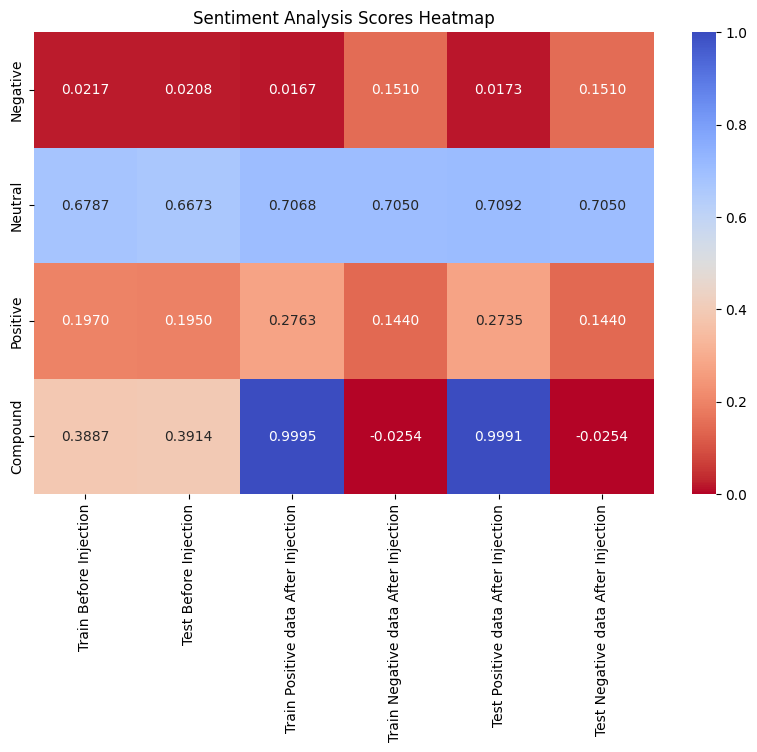

In [11]:
# Prepare the data
data = {
    'Train Before Injection': [0.0217, 0.6787, 0.1970, 0.3887],
    'Test Before Injection': [0.0208, 0.6673, 0.1950, 0.3914],
    'Train Positive data After Injection': [0.0167, 0.7068, 0.2763, 0.9995],
    'Train Negative data After Injection': [0.151, 0.705, 0.144, -0.0254],
    'Test Positive data After Injection': [0.0173, 0.7092, 0.2735, 0.9991],
    'Test Negative data After Injection': [0.151, 0.705, 0.144, -0.0254]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()